# Summarize recorded interactions

In [1]:
# Import some useful modules
import json
import sys
import networkx
import pandas
import numpy

import matplotlib.pyplot as plotter
from pathlib import Path
from IPython.display import display, HTML

Specify the RESULTS_DIR used for recording interactions

In [2]:
# USE ABSOLUTE PATHS HERE!!!
DATA_DIR = Path("/home/ashinde/PhD/CaffineBravery/results/results_l3_control/")
DATA_FILES = list(DATA_DIR.iterdir())

for _file in DATA_FILES:
    print(f"Using {_file}")

Using /home/ashinde/PhD/CaffineBravery/results/results_l3_control/1908571880_attl0_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l3_control/1889757798_attl0_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l3_control/1642679791_defl1_active_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l3_control/855700733_defl1_passive_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l3_control/1890266440_attl2_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l3_control/980364771_defl3_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l3_control/trace.0.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l3_control/trace.1.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l3_control/trace.2.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l3_control/trace.3.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l3_control/trace.4.json
Usin

In [3]:
# Common utility function for reading JSON from a file
def load_json(fname):

    data = None

    with open(fname) as f:
        data = json.load(f)

    return data

---
Take a look at the policy graphs of the agents

In [4]:
# Draw policy graphs
import graphviz


def get_edge_map(edges):
    start = 0
    edge_map = {}
    multi_edge_map = {}
    
    for src, children in edges.items():
        for obs, child in children.items():
            
            # index this observation if not already done
            if obs not in edge_map.keys():
                edge_map[obs] = start
                start += 1
                
            # Add obs to (src, dst) key
            if (src, child) not in multi_edge_map.keys():
                multi_edge_map[(src, child)] = [edge_map[obs]]
            
            else:
                _l = multi_edge_map[(src, child)]
                _l.append(edge_map[obs])
                multi_edge_map[(src, child)] = _l
                
    return edge_map, multi_edge_map


def get_graphviz_graph(json_data):
    
    # initialize empty graph
    G = graphviz.Digraph()
    
    nodes = json_data["nodes"]
    edges = json_data["edges"]
    
    edge_map, multi_edge_map = get_edge_map(edges)
    print(f"Edge map is:")
    for e, i in edge_map.items():
        print(f"{i}:{e}")

    for k, v in nodes.items():
        l = v["act"] + "_start" if "start" in v.keys() else v["act"]
        G.node(k, label=l, fontsize="12")
        
    for s, t in multi_edge_map.keys():
        G.edge(s, t, label=str(multi_edge_map[(s, t)]))
        
    return G

---
## Plot policy graphs

Displaying /home/ashinde/PhD/CaffineBravery/results/results_l3_control/1908571880_attl0_pol_graph.json
Edge map is:
0:[(HostObs, none), (ActionResult, success), (ConnObs, active)]
1:[(HostObs, none), (ActionResult, success), (ConnObs, inactive)]
2:[(HostObs, user_files), (ActionResult, failure), (ConnObs, active)]
3:[(HostObs, user_files), (ActionResult, failure), (ConnObs, inactive)]
4:[(HostObs, user_files), (ActionResult, success), (ConnObs, active)]
5:[(HostObs, user_files), (ActionResult, success), (ConnObs, inactive)]
6:[(HostObs, none), (ActionResult, failure), (ConnObs, active)]
7:[(HostObs, none), (ActionResult, failure), (ConnObs, inactive)]


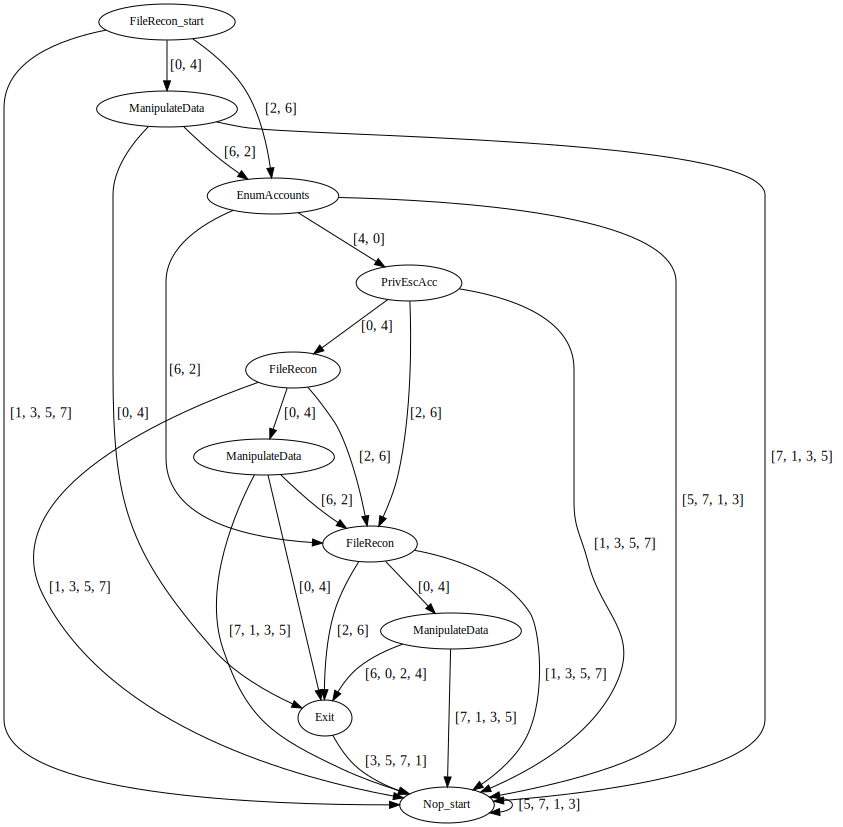

Displaying /home/ashinde/PhD/CaffineBravery/results/results_l3_control/1889757798_attl0_pol_graph.json
Edge map is:
0:[(HostObs, none), (ActionResult, success), (ConnObs, active)]
1:[(HostObs, none), (ActionResult, success), (ConnObs, inactive)]
2:[(HostObs, user_files), (ActionResult, failure), (ConnObs, active)]
3:[(HostObs, user_files), (ActionResult, failure), (ConnObs, inactive)]
4:[(HostObs, user_files), (ActionResult, success), (ConnObs, active)]
5:[(HostObs, user_files), (ActionResult, success), (ConnObs, inactive)]
6:[(HostObs, none), (ActionResult, failure), (ConnObs, active)]
7:[(HostObs, none), (ActionResult, failure), (ConnObs, inactive)]


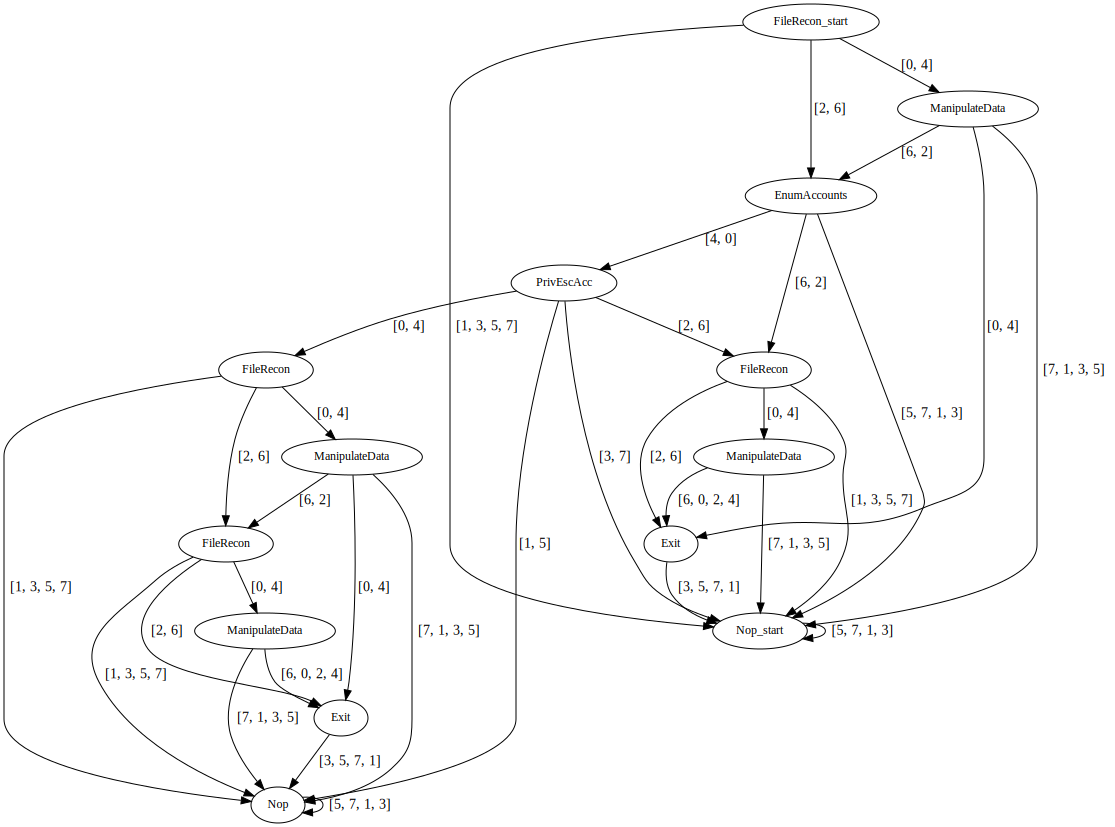

Displaying /home/ashinde/PhD/CaffineBravery/results/results_l3_control/1642679791_defl1_active_pol_graph.json
Edge map is:
0:[(EndPtAlerts, file_enum)]
1:[(EndPtAlerts, file_write)]
2:[(EndPtAlerts, none)]
3:[(EndPtAlerts, su_login)]


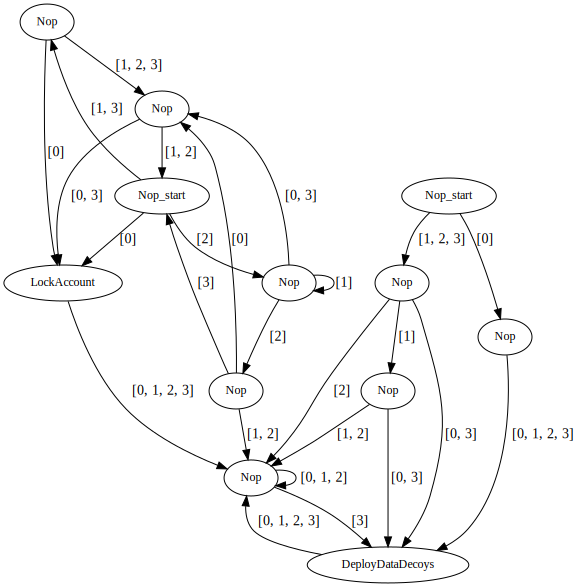

Displaying /home/ashinde/PhD/CaffineBravery/results/results_l3_control/855700733_defl1_passive_pol_graph.json
Edge map is:
0:[(EndPtAlerts, file_enum)]
1:[(EndPtAlerts, file_write)]
2:[(EndPtAlerts, none)]
3:[(EndPtAlerts, su_login)]


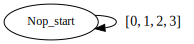

Displaying /home/ashinde/PhD/CaffineBravery/results/results_l3_control/1890266440_attl2_pol_graph.json
Edge map is:
0:[(HostObs, user_files), (ActionResult, success), (ConnObs, active)]
1:[(HostObs, user_files), (ActionResult, success), (ConnObs, inactive)]
2:[(HostObs, none), (ActionResult, failure), (ConnObs, active)]
3:[(HostObs, none), (ActionResult, failure), (ConnObs, inactive)]
4:[(HostObs, none), (ActionResult, success), (ConnObs, active)]
5:[(HostObs, none), (ActionResult, success), (ConnObs, inactive)]
6:[(HostObs, user_files), (ActionResult, failure), (ConnObs, active)]
7:[(HostObs, user_files), (ActionResult, failure), (ConnObs, inactive)]


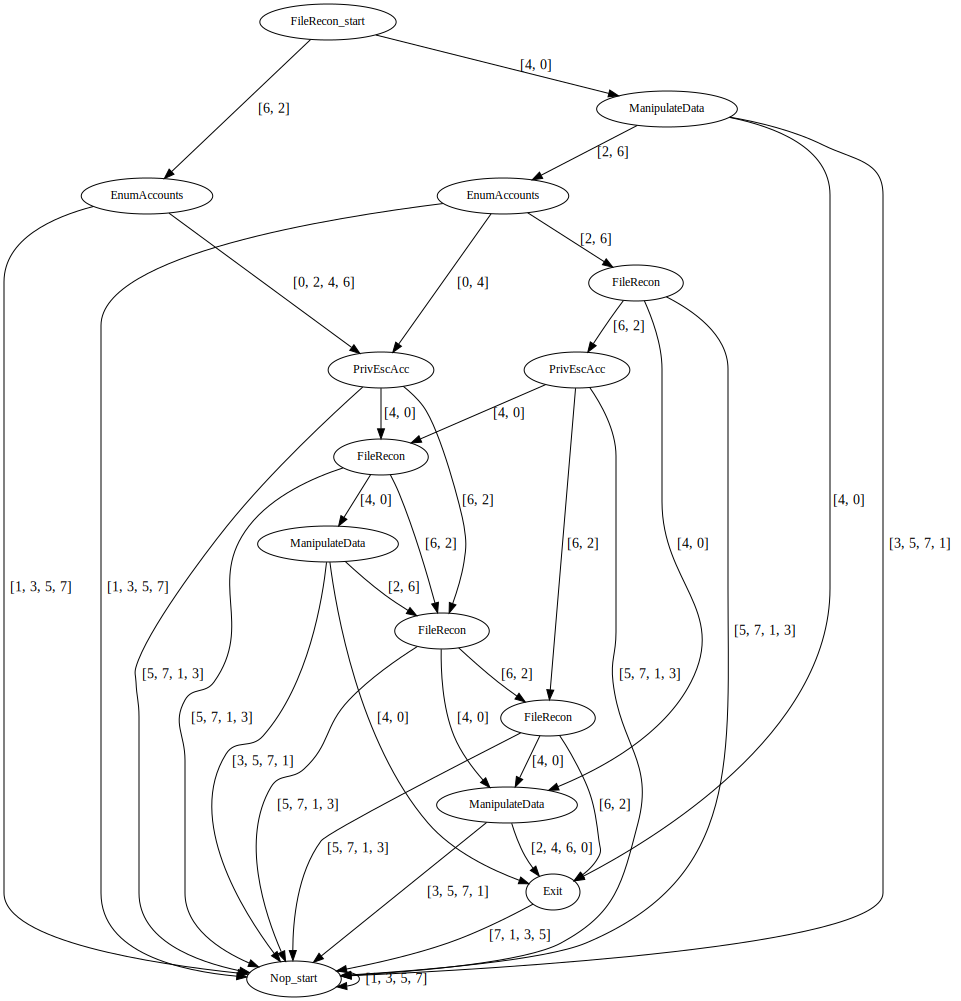

Displaying /home/ashinde/PhD/CaffineBravery/results/results_l3_control/980364771_defl3_pol_graph.json
Edge map is:
0:[(EndPtAlerts, file_enum)]
1:[(EndPtAlerts, file_write)]
2:[(EndPtAlerts, none)]
3:[(EndPtAlerts, su_login)]


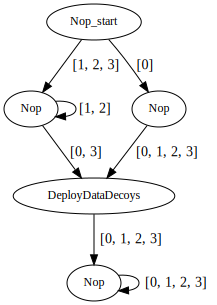

In [5]:
GRAPH_FILES = list(filter(lambda x: "pol_graph" in x.parts[-1], DATA_FILES))

for g in GRAPH_FILES:
    print(f"Displaying {g}")
    data = load_json(g)
    G = get_graphviz_graph(data)
    display(G)

---
Summarize the actual interactions

In [6]:
# Get the trace files
TRACE_FILES = list(filter(lambda x: "trace" in x.parts[-1], DATA_FILES))

for _file in TRACE_FILES:
    print(f"Using trace from {_file}")


Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l3_control/trace.0.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l3_control/trace.1.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l3_control/trace.2.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l3_control/trace.3.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l3_control/trace.4.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l3_control/trace.5.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l3_control/trace.6.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l3_control/trace.7.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l3_control/trace.8.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l3_control/trace.9.json


+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                        file_enum
2                               1.0                         su_login
3                               1.0                        file_enum
4                               1.0                       file_write
5                               1.0                             none
6                               1.0                             none
7                               1.0                             none
8                               1.0                       file_write
9                               1.0                       file_write

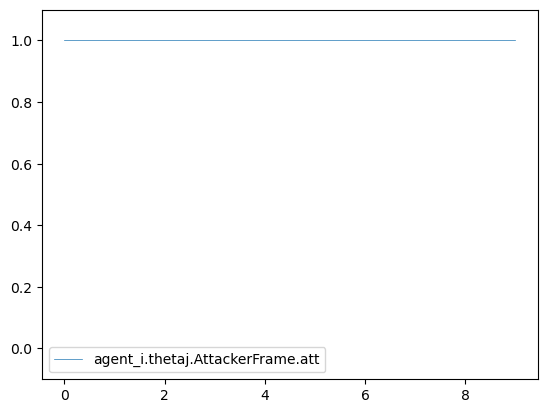

agent_j.thetaj.DefFrame.highCap  agent_j.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.500000                        0.500000   
2                         0.339934                        0.660066   
3                         0.335681                        0.664319   
4                         0.511677                        0.488323   
5                         0.557917                        0.442083   
6                         0.557917                        0.442083   
7                         0.557917                        0.442083   
8                         0.557917                        0.442083   
9                         0.557917                        0.442083   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           failure   
1                   user_files                           success   
2                   user_files                           success   
3                   user_files                           success   
4                         none                           success   
5                         none                           success   
6                   user_files                           success   
7                         none                           success   
8                   user_files                           failure   
9                         none                           failure   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                     inactive  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

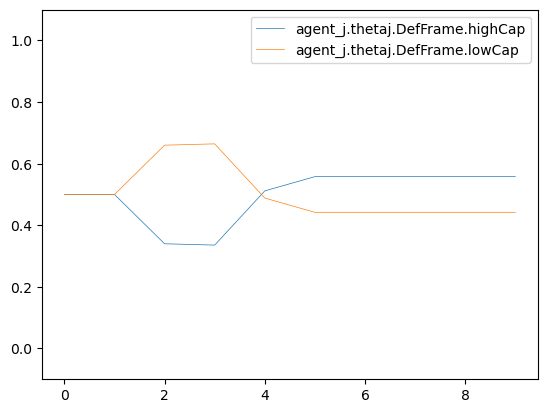

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot    agent_i.action  agent_j.action  
0                      1.0               Nop       FileRecon  
1                      1.0               Nop    EnumAccounts  
2                      1.0  DeployDataDecoys      PrivEscAcc  
3                      1.0               Nop       FileRecon  
4                      1.0               Nop  ManipulateData  
5                      1.0               Nop            Exit  
6                      1.0               Nop             Nop  
7                      1.0               Nop             Nop  
8                      1.0               Nop             Nop  
9                      1.0               Nop             Nop

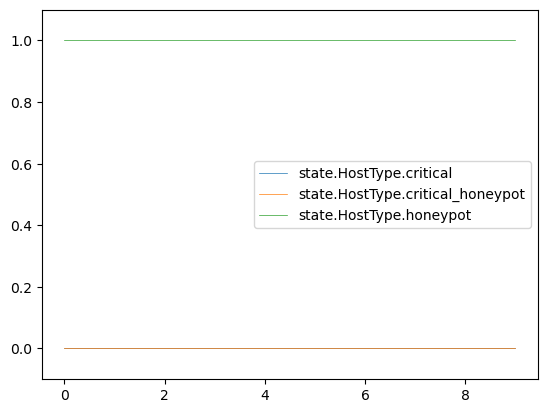

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot    agent_i.action  agent_j.action  \
0                        1.0               Nop       FileRecon   
1                        1.0               Nop    EnumAccounts   
2                        1.0  DeployDataDecoys      PrivEscAcc   
3                        1.0               Nop       FileRecon   
4                        1.0               Nop  ManipulateData   
5                        1.0               Nop            Exit   
6                        1.0               Nop             Nop   
7                        1.0               Nop             Nop   
8                        1.0               Nop             Nop   
9                        1.0               Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                         su_login  
3                        file_enum  
4                       file_write  
5                             none  
6                             none  
7                             none  
8                       file_write  
9                       file_write

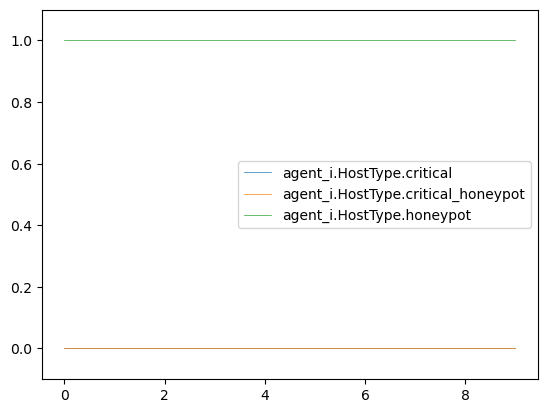

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                   0.500000                                 0.0   
1                   0.500000                                 0.0   
2                   0.339934                                 0.0   
3                   0.335681                                 0.0   
4                   0.244261                                 0.0   
5                   0.221045                                 0.0   
6                   0.221045                                 0.0   
7                   0.221045                                 0.0   
8                   0.221045                                 0.0   
9                   0.221045                                 0.0   

   agent_j.HostType.honeypot  agent_j.action    agent_i.action  \
0                   0.500000       FileRecon               Nop   
1                   0.500000    EnumAccounts               Nop   
2                   0.660066      PrivEscAcc  DeployDataDecoys   
3                   0.664319       FileRecon               Nop   
4                   0.755739  ManipulateData               Nop   
5                   0.778955            Exit               Nop   
6                   0.778955             Nop               Nop   
7                   0.778955             Nop               Nop   
8                   0.778955             Nop               Nop   
9                   0.778955             Nop               Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           failure   
1                   user_files                           success   
2                   user_files                           success   
3                   user_files                           success   
4                         none                           success   
5                         none                           success   
6                   user_files                           success   
7                         none                           success   
8                   user_files                           failure   
9                         none                           failure   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                     inactive  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

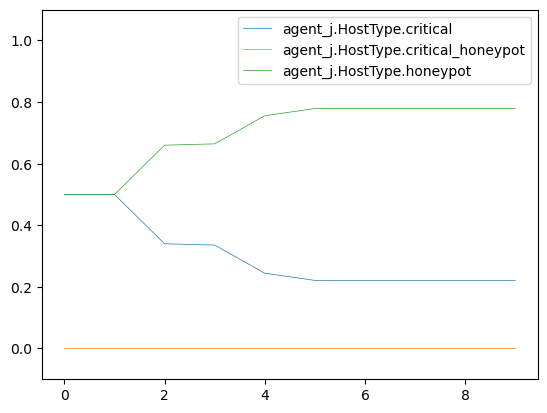

=============AccFound============


state.AccFound.no  state.AccFound.yes    agent_i.action  agent_j.action
0                1.0                 0.0               Nop       FileRecon
1                1.0                 0.0               Nop    EnumAccounts
2                0.0                 1.0  DeployDataDecoys      PrivEscAcc
3                0.0                 1.0               Nop       FileRecon
4                0.0                 1.0               Nop  ManipulateData
5                0.0                 1.0               Nop            Exit
6                0.0                 1.0               Nop             Nop
7                0.0                 1.0               Nop             Nop
8                0.0                 1.0               Nop             Nop
9                0.0                 1.0               Nop             Nop

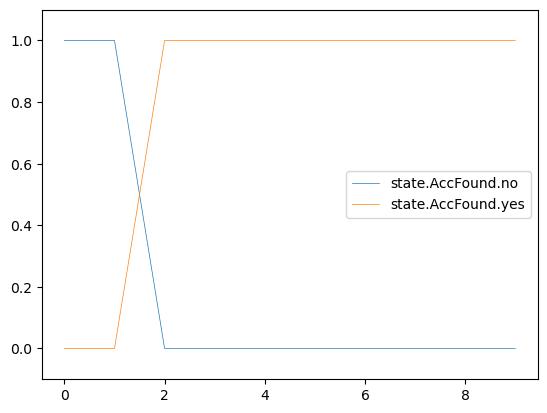

agent_i.AccFound.no  agent_i.AccFound.yes    agent_i.action  \
0             1.000000              0.000000               Nop   
1             1.000000              0.000000               Nop   
2             0.011249              0.988751  DeployDataDecoys   
3             0.010001              0.989999               Nop   
4             0.010000              0.990000               Nop   
5             0.001484              0.998516               Nop   
6             0.001517              0.998483               Nop   
7             0.001518              0.998482               Nop   
8             0.001518              0.998482               Nop   
9             0.001518              0.998482               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                       file_write  
9             Nop                       file_write

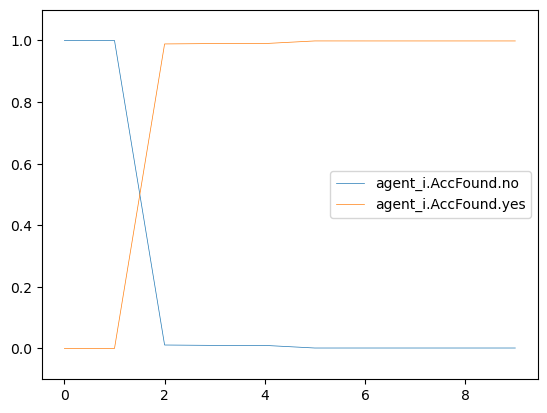

agent_j.AccFound.no  agent_j.AccFound.yes  agent_j.action  \
0             1.000000              0.000000       FileRecon   
1             1.000000              0.000000    EnumAccounts   
2             0.101815              0.898186      PrivEscAcc   
3             0.000113              0.999887       FileRecon   
4             0.000053              0.999947  ManipulateData   
5             0.000037              0.999963            Exit   
6             0.000037              0.999963             Nop   
7             0.000037              0.999963             Nop   
8             0.000037              0.999963             Nop   
9             0.000037              0.999963             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                   user_files   
1               Nop                   user_files   
2  DeployDataDecoys                   user_files   
3               Nop                   user_files   
4               Nop                         none   
5               Nop                         none   
6               Nop                   user_files   
7               Nop                         none   
8               Nop                   user_files   
9               Nop                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           success                       active  
4                           success                       active  
5                           success                     inactive  
6                           success                     inactive  
7                           success                     inactive  
8                           failure                     inactive  
9                           failure                     inactive

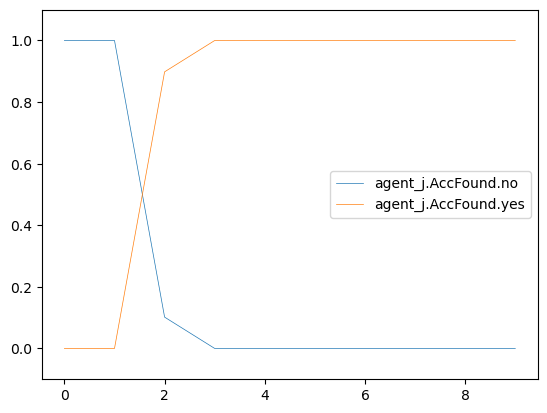

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes    agent_i.action  \
0                    1.0                     0.0               Nop   
1                    1.0                     0.0               Nop   
2                    1.0                     0.0  DeployDataDecoys   
3                    1.0                     0.0               Nop   
4                    1.0                     0.0               Nop   
5                    0.0                     1.0               Nop   
6                    0.0                     1.0               Nop   
7                    0.0                     1.0               Nop   
8                    0.0                     1.0               Nop   
9                    0.0                     1.0               Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

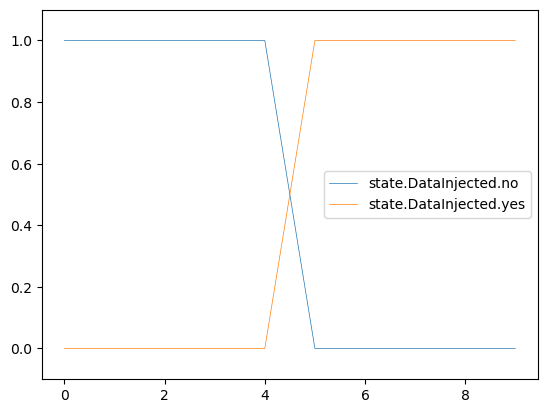

agent_i.DataInjected.no  agent_i.DataInjected.yes    agent_i.action  \
0                 1.000000                  0.000000               Nop   
1                 1.000000                  0.000000               Nop   
2                 1.000000                  0.000000  DeployDataDecoys   
3                 1.000000                  0.000000               Nop   
4                 1.000000                  0.000000               Nop   
5                 0.031978                  0.968023               Nop   
6                 0.001939                  0.998061               Nop   
7                 0.001578                  0.998422               Nop   
8                 0.001577                  0.998423               Nop   
9                 0.001577                  0.998423               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                       file_write  
9             Nop                       file_write

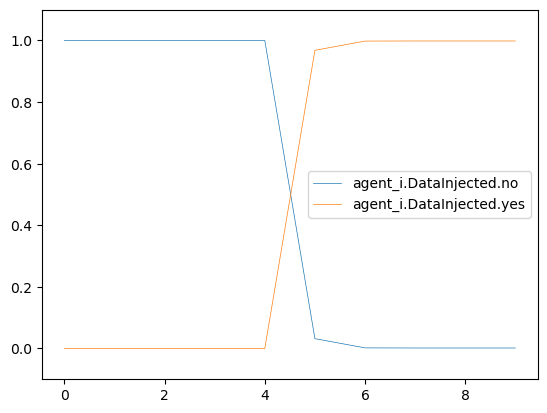

agent_j.DataInjected.no  agent_j.DataInjected.yes  agent_j.action  \
0                  1.00000                   0.00000       FileRecon   
1                  1.00000                   0.00000    EnumAccounts   
2                  1.00000                   0.00000      PrivEscAcc   
3                  1.00000                   0.00000       FileRecon   
4                  1.00000                   0.00000  ManipulateData   
5                  0.00012                   0.99988            Exit   
6                  0.00012                   0.99988             Nop   
7                  0.00012                   0.99988             Nop   
8                  0.00012                   0.99988             Nop   
9                  0.00012                   0.99988             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                   user_files   
1               Nop                   user_files   
2  DeployDataDecoys                   user_files   
3               Nop                   user_files   
4               Nop                         none   
5               Nop                         none   
6               Nop                   user_files   
7               Nop                         none   
8               Nop                   user_files   
9               Nop                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           success                       active  
4                           success                       active  
5                           success                     inactive  
6                           success                     inactive  
7                           success                     inactive  
8                           failure                     inactive  
9                           failure                     inactive

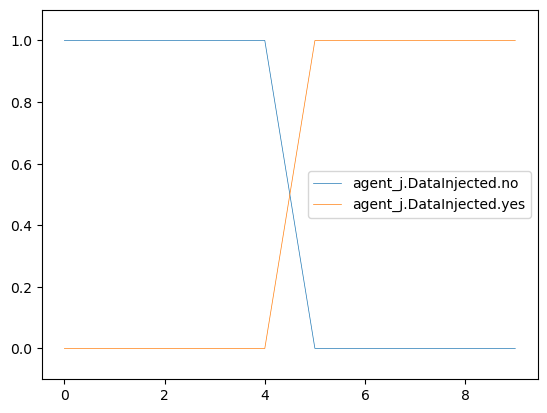

=============AttActive============


state.AttActive.no  state.AttActive.yes    agent_i.action  agent_j.action
0                 0.0                  1.0               Nop       FileRecon
1                 0.0                  1.0               Nop    EnumAccounts
2                 0.0                  1.0  DeployDataDecoys      PrivEscAcc
3                 0.0                  1.0               Nop       FileRecon
4                 0.0                  1.0               Nop  ManipulateData
5                 0.0                  1.0               Nop            Exit
6                 1.0                  0.0               Nop             Nop
7                 1.0                  0.0               Nop             Nop
8                 1.0                  0.0               Nop             Nop
9                 1.0                  0.0               Nop             Nop

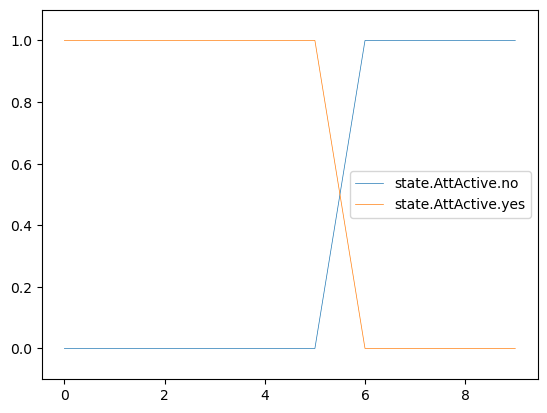

agent_i.AttActive.no  agent_i.AttActive.yes    agent_i.action  \
0          5.000000e-01           5.000000e-01               Nop   
1          1.020408e-02           9.897959e-01               Nop   
2          1.179412e-04           9.998820e-01  DeployDataDecoys   
3          1.229218e-06           9.999988e-01               Nop   
4          1.267250e-08           1.000000e+00               Nop   
5          3.548452e-09           1.000000e+00               Nop   
6          9.995843e-01           4.157135e-04               Nop   
7          9.999952e-01           4.821795e-06               Nop   
8          1.000000e+00           1.216952e-08               Nop   
9          1.000000e+00           9.316787e-15               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                       file_write  
9             Nop                       file_write

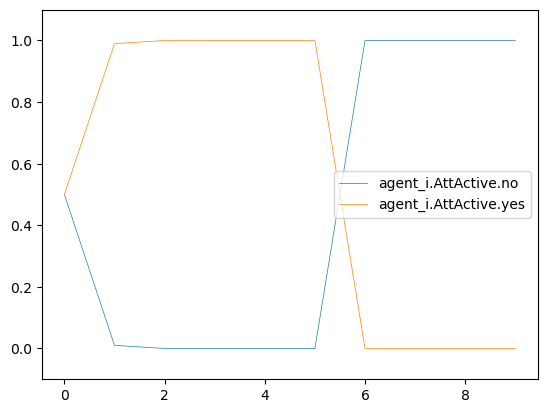

agent_j.AttActive.no  agent_j.AttActive.yes  agent_j.action  \
0                   0.0                    1.0       FileRecon   
1                   0.0                    1.0    EnumAccounts   
2                   0.0                    1.0      PrivEscAcc   
3                   0.0                    1.0       FileRecon   
4                   0.0                    1.0  ManipulateData   
5                   0.0                    1.0            Exit   
6                   1.0                    0.0             Nop   
7                   1.0                    0.0             Nop   
8                   1.0                    0.0             Nop   
9                   1.0                    0.0             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                   user_files   
1               Nop                   user_files   
2  DeployDataDecoys                   user_files   
3               Nop                   user_files   
4               Nop                         none   
5               Nop                         none   
6               Nop                   user_files   
7               Nop                         none   
8               Nop                   user_files   
9               Nop                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           success                       active  
4                           success                       active  
5                           success                     inactive  
6                           success                     inactive  
7                           success                     inactive  
8                           failure                     inactive  
9                           failure                     inactive

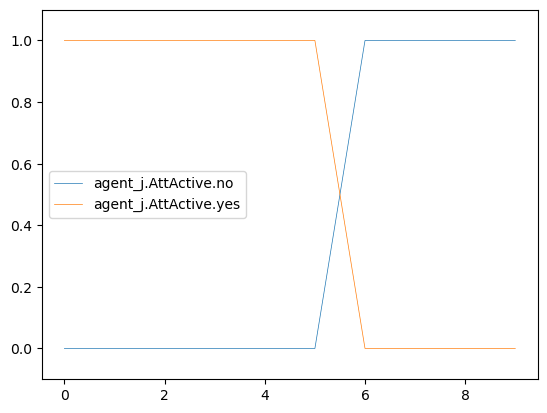

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes    agent_i.action  \
0                   0.0                    1.0               Nop   
1                   0.0                    1.0               Nop   
2                   0.0                    1.0  DeployDataDecoys   
3                   0.0                    1.0               Nop   
4                   0.0                    1.0               Nop   
5                   0.0                    1.0               Nop   
6                   0.0                    1.0               Nop   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

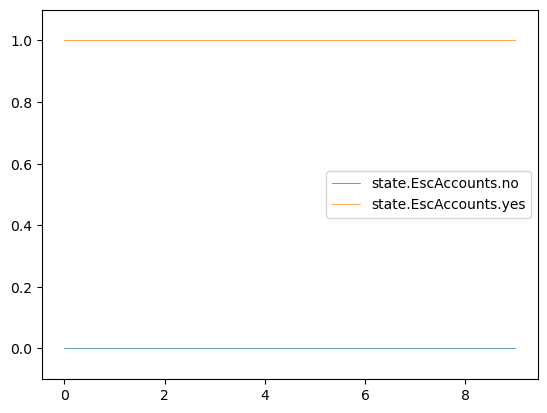

agent_i.EscAccounts.no  agent_i.EscAccounts.yes    agent_i.action  \
0                     0.0                      1.0               Nop   
1                     0.0                      1.0               Nop   
2                     0.0                      1.0  DeployDataDecoys   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                       file_write  
9             Nop                       file_write

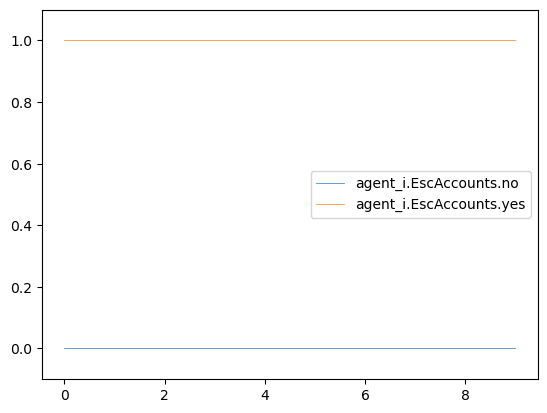

agent_j.EscAccounts.no  agent_j.EscAccounts.yes  agent_j.action  \
0                0.500000                 0.500000       FileRecon   
1                0.500000                 0.500000    EnumAccounts   
2                0.100806                 0.899194      PrivEscAcc   
3                0.000112                 0.999888       FileRecon   
4                0.000052                 0.999948  ManipulateData   
5                0.000037                 0.999963            Exit   
6                0.000037                 0.999963             Nop   
7                0.000037                 0.999963             Nop   
8                0.000037                 0.999963             Nop   
9                0.000037                 0.999963             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                   user_files   
1               Nop                   user_files   
2  DeployDataDecoys                   user_files   
3               Nop                   user_files   
4               Nop                         none   
5               Nop                         none   
6               Nop                   user_files   
7               Nop                         none   
8               Nop                   user_files   
9               Nop                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           success                       active  
4                           success                       active  
5                           success                     inactive  
6                           success                     inactive  
7                           success                     inactive  
8                           failure                     inactive  
9                           failure                     inactive

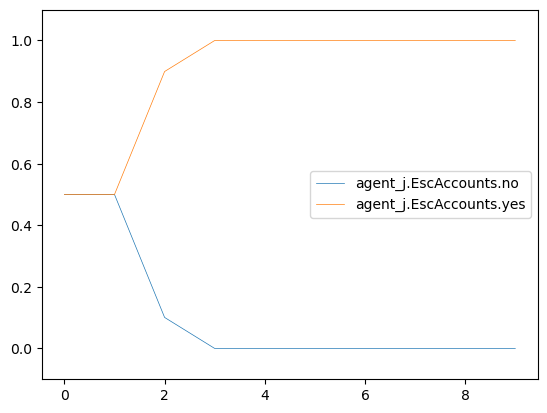

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user    agent_i.action  \
0                   1.0                   0.0               Nop   
1                   1.0                   0.0               Nop   
2                   1.0                   0.0  DeployDataDecoys   
3                   1.0                   0.0               Nop   
4                   1.0                   0.0               Nop   
5                   1.0                   0.0               Nop   
6                   1.0                   0.0               Nop   
7                   1.0                   0.0               Nop   
8                   1.0                   0.0               Nop   
9                   1.0                   0.0               Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

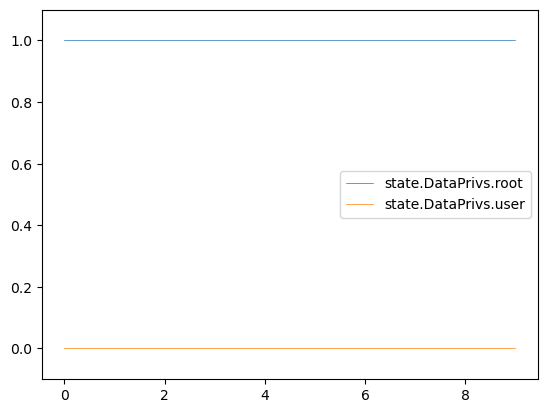

agent_i.DataPrivs.root  agent_i.DataPrivs.user    agent_i.action  \
0                     1.0                     0.0               Nop   
1                     1.0                     0.0               Nop   
2                     1.0                     0.0  DeployDataDecoys   
3                     1.0                     0.0               Nop   
4                     1.0                     0.0               Nop   
5                     1.0                     0.0               Nop   
6                     1.0                     0.0               Nop   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                       file_write  
9             Nop                       file_write

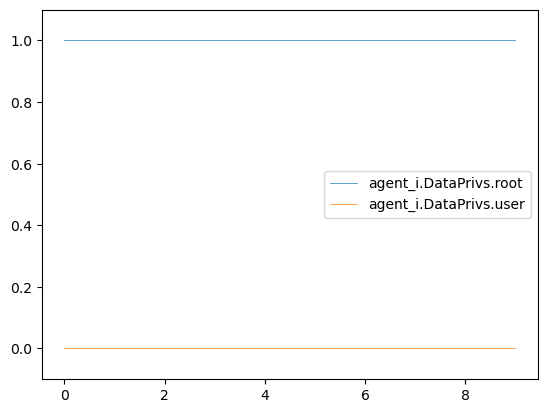

agent_j.DataPrivs.root  agent_j.DataPrivs.user  agent_j.action  \
0                0.500000                0.500000       FileRecon   
1                0.608108                0.391892    EnumAccounts   
2                0.608108                0.391892      PrivEscAcc   
3                0.608108                0.391892       FileRecon   
4                0.660546                0.339454  ManipulateData   
5                0.674153                0.325847            Exit   
6                0.674153                0.325847             Nop   
7                0.674153                0.325847             Nop   
8                0.674153                0.325847             Nop   
9                0.674153                0.325847             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                   user_files   
1               Nop                   user_files   
2  DeployDataDecoys                   user_files   
3               Nop                   user_files   
4               Nop                         none   
5               Nop                         none   
6               Nop                   user_files   
7               Nop                         none   
8               Nop                   user_files   
9               Nop                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           success                       active  
4                           success                       active  
5                           success                     inactive  
6                           success                     inactive  
7                           success                     inactive  
8                           failure                     inactive  
9                           failure                     inactive

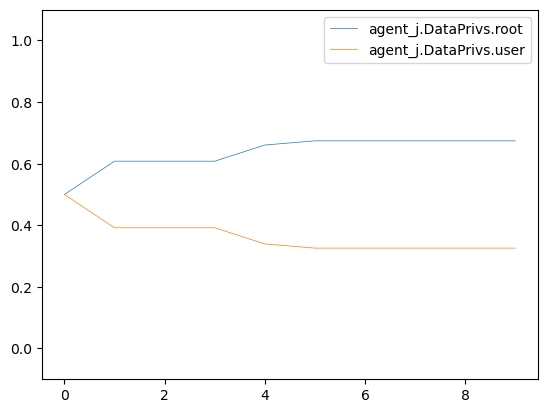

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes    agent_i.action  \
0                   1.0                    0.0               Nop   
1                   1.0                    0.0               Nop   
2                   1.0                    0.0  DeployDataDecoys   
3                   0.0                    1.0               Nop   
4                   0.0                    1.0               Nop   
5                   0.0                    1.0               Nop   
6                   0.0                    1.0               Nop   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

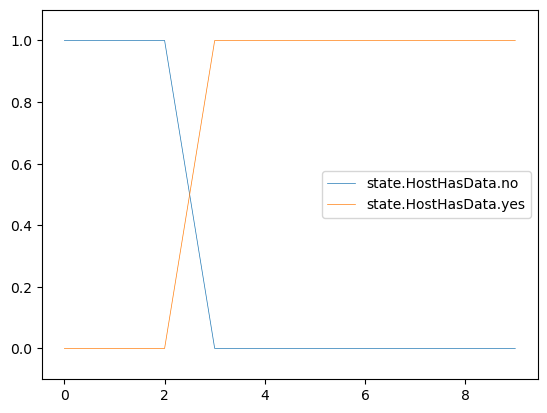

agent_i.HostHasData.no  agent_i.HostHasData.yes    agent_i.action  \
0                     1.0                      0.0               Nop   
1                     1.0                      0.0               Nop   
2                     1.0                      0.0  DeployDataDecoys   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                       file_write  
9             Nop                       file_write

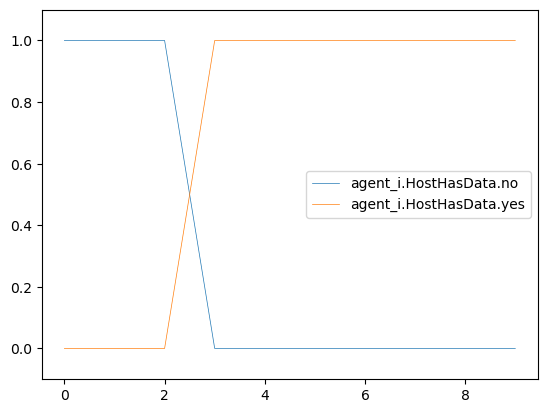

agent_j.HostHasData.no  agent_j.HostHasData.yes  agent_j.action  \
0                0.500000                 0.500000       FileRecon   
1                0.608108                 0.391892    EnumAccounts   
2                0.608108                 0.391892      PrivEscAcc   
3                0.406240                 0.593760       FileRecon   
4                0.083640                 0.916360  ManipulateData   
5                0.000094                 0.999906            Exit   
6                0.000094                 0.999906             Nop   
7                0.000094                 0.999906             Nop   
8                0.000094                 0.999906             Nop   
9                0.000094                 0.999906             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                   user_files   
1               Nop                   user_files   
2  DeployDataDecoys                   user_files   
3               Nop                   user_files   
4               Nop                         none   
5               Nop                         none   
6               Nop                   user_files   
7               Nop                         none   
8               Nop                   user_files   
9               Nop                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           success                       active  
4                           success                       active  
5                           success                     inactive  
6                           success                     inactive  
7                           success                     inactive  
8                           failure                     inactive  
9                           failure                     inactive

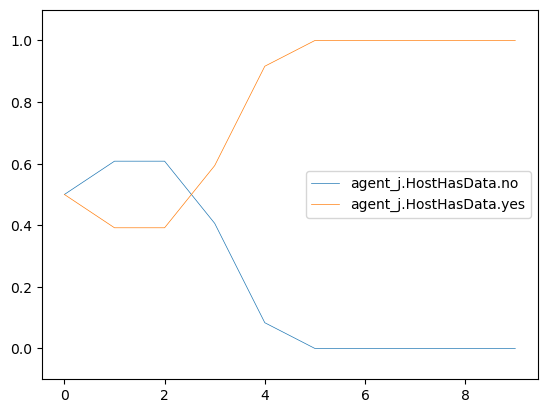

=============DataFound============


state.DataFound.no  state.DataFound.yes    agent_i.action  agent_j.action
0                 1.0                  0.0               Nop       FileRecon
1                 1.0                  0.0               Nop    EnumAccounts
2                 1.0                  0.0  DeployDataDecoys      PrivEscAcc
3                 1.0                  0.0               Nop       FileRecon
4                 0.0                  1.0               Nop  ManipulateData
5                 0.0                  1.0               Nop            Exit
6                 0.0                  1.0               Nop             Nop
7                 0.0                  1.0               Nop             Nop
8                 0.0                  1.0               Nop             Nop
9                 0.0                  1.0               Nop             Nop

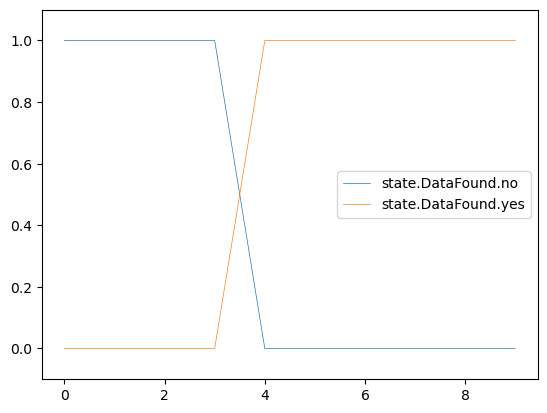

agent_i.DataFound.no  agent_i.DataFound.yes    agent_i.action  \
0              1.000000               0.000000               Nop   
1              1.000000               0.000000               Nop   
2              1.000000               0.000000  DeployDataDecoys   
3              1.000000               0.000000               Nop   
4              0.208001               0.791999               Nop   
5              0.028873               0.971127               Nop   
6              0.001646               0.998354               Nop   
7              0.001576               0.998424               Nop   
8              0.001576               0.998424               Nop   
9              0.001576               0.998424               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                       file_write  
9             Nop                       file_write

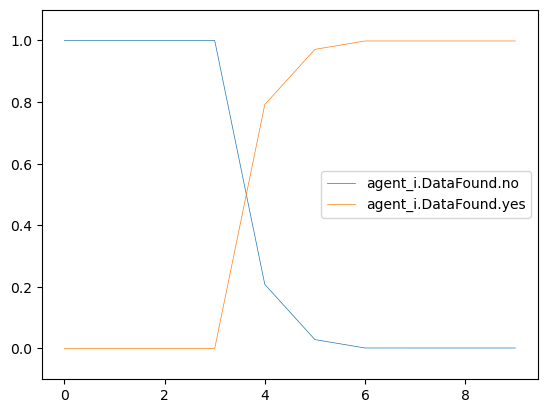

agent_j.DataFound.no  agent_j.DataFound.yes  agent_j.action  \
0              1.000000               0.000000       FileRecon   
1              0.972973               0.027027    EnumAccounts   
2              0.972973               0.027027      PrivEscAcc   
3              0.972973               0.027027       FileRecon   
4              0.107083               0.892917  ManipulateData   
5              0.000120               0.999880            Exit   
6              0.000120               0.999880             Nop   
7              0.000120               0.999880             Nop   
8              0.000120               0.999880             Nop   
9              0.000120               0.999880             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                   user_files   
1               Nop                   user_files   
2  DeployDataDecoys                   user_files   
3               Nop                   user_files   
4               Nop                         none   
5               Nop                         none   
6               Nop                   user_files   
7               Nop                         none   
8               Nop                   user_files   
9               Nop                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           success                       active  
4                           success                       active  
5                           success                     inactive  
6                           success                     inactive  
7                           success                     inactive  
8                           failure                     inactive  
9                           failure                     inactive

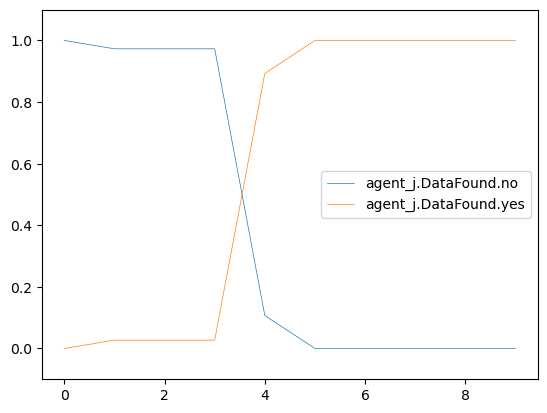

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user    agent_i.action  \
0                     0.0                     1.0               Nop   
1                     0.0                     1.0               Nop   
2                     0.0                     1.0  DeployDataDecoys   
3                     1.0                     0.0               Nop   
4                     1.0                     0.0               Nop   
5                     1.0                     0.0               Nop   
6                     1.0                     0.0               Nop   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

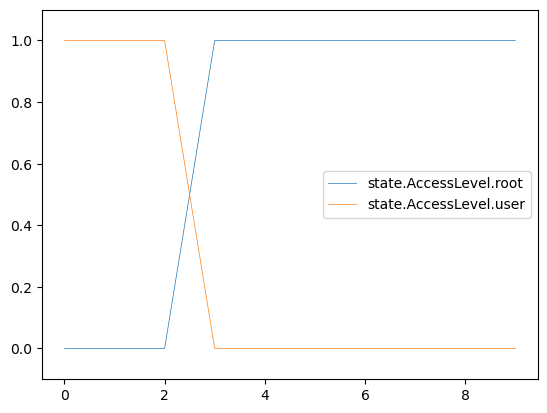

agent_i.AccessLevel.root  agent_i.AccessLevel.user    agent_i.action  \
0                  0.000000                  1.000000               Nop   
1                  0.000000                  1.000000               Nop   
2                  0.000000                  1.000000  DeployDataDecoys   
3                  0.989987                  0.010013               Nop   
4                  0.989999                  0.010001               Nop   
5                  0.998516                  0.001484               Nop   
6                  0.998483                  0.001517               Nop   
7                  0.998482                  0.001518               Nop   
8                  0.998482                  0.001518               Nop   
9                  0.998482                  0.001518               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                       file_write  
9             Nop                       file_write

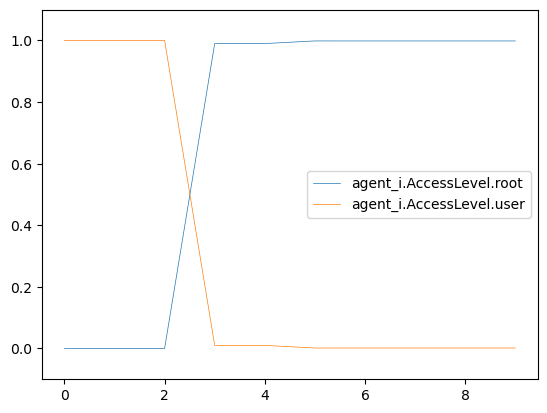

agent_j.AccessLevel.root  agent_j.AccessLevel.user  agent_j.action  \
0                  0.000000                  1.000000       FileRecon   
1                  0.000000                  1.000000    EnumAccounts   
2                  0.000000                  1.000000      PrivEscAcc   
3                  0.999887                  0.000113       FileRecon   
4                  0.999947                  0.000053  ManipulateData   
5                  0.999963                  0.000037            Exit   
6                  0.999963                  0.000037             Nop   
7                  0.999963                  0.000037             Nop   
8                  0.999963                  0.000037             Nop   
9                  0.999963                  0.000037             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                   user_files   
1               Nop                   user_files   
2  DeployDataDecoys                   user_files   
3               Nop                   user_files   
4               Nop                         none   
5               Nop                         none   
6               Nop                   user_files   
7               Nop                         none   
8               Nop                   user_files   
9               Nop                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           success                       active  
4                           success                       active  
5                           success                     inactive  
6                           success                     inactive  
7                           success                     inactive  
8                           failure                     inactive  
9                           failure                     inactive

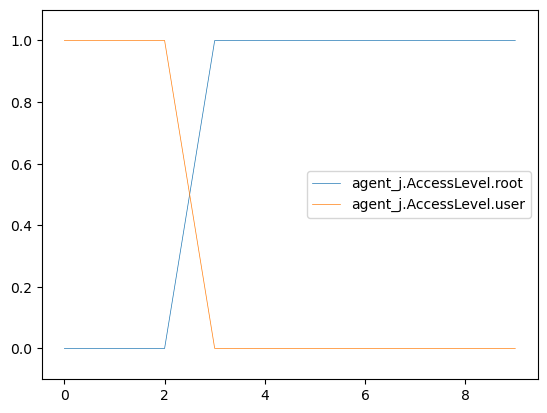

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                       file_write
2                               1.0                        file_enum
3                               1.0                             none
4                               1.0                        file_enum
5                               1.0                       file_write
6                               1.0                             none
7                               1.0                             none
8                               1.0                             none
9                               1.0                             none

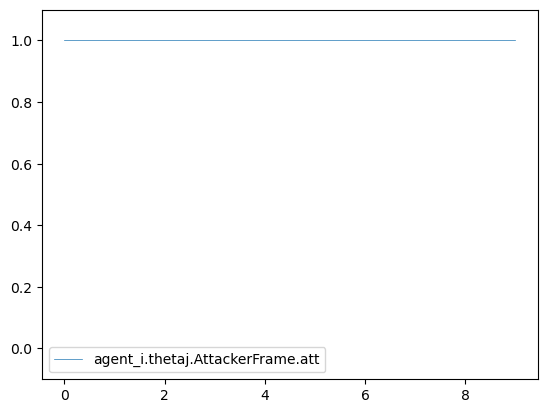

agent_j.thetaj.DefFrame.highCap  agent_j.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.500000                        0.500000   
2                         0.339934                        0.660066   
3                         0.339890                        0.660110   
4                         0.335592                        0.664408   
5                         0.520299                        0.479701   
6                         0.570103                        0.429897   
7                         0.570103                        0.429897   
8                         0.570103                        0.429897   
9                         0.570103                        0.429897   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           success   
1                         none                           failure   
2                   user_files                           success   
3                         none                           success   
4                   user_files                           success   
5                         none                           success   
6                   user_files                           success   
7                   user_files                           failure   
8                         none                           failure   
9                   user_files                           success   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                       active  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

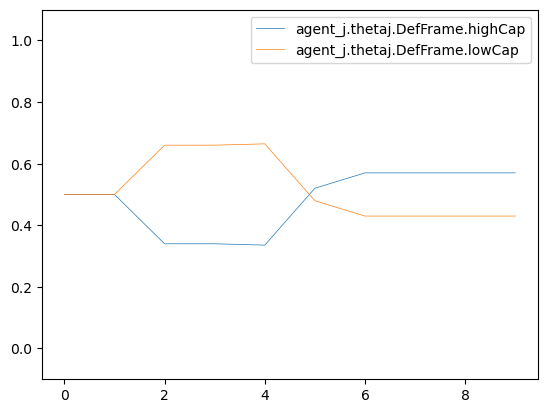

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot    agent_i.action  agent_j.action  
0                      1.0               Nop       FileRecon  
1                      1.0               Nop  ManipulateData  
2                      1.0  DeployDataDecoys    EnumAccounts  
3                      1.0               Nop      PrivEscAcc  
4                      1.0               Nop       FileRecon  
5                      1.0               Nop  ManipulateData  
6                      1.0               Nop            Exit  
7                      1.0               Nop             Nop  
8                      1.0               Nop             Nop  
9                      1.0               Nop             Nop

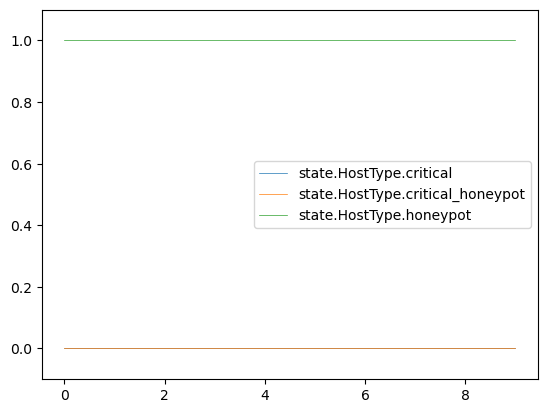

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot    agent_i.action  agent_j.action  \
0                        1.0               Nop       FileRecon   
1                        1.0               Nop  ManipulateData   
2                        1.0  DeployDataDecoys    EnumAccounts   
3                        1.0               Nop      PrivEscAcc   
4                        1.0               Nop       FileRecon   
5                        1.0               Nop  ManipulateData   
6                        1.0               Nop            Exit   
7                        1.0               Nop             Nop   
8                        1.0               Nop             Nop   
9                        1.0               Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                       file_write  
2                        file_enum  
3                             none  
4                        file_enum  
5                       file_write  
6                             none  
7                             none  
8                             none  
9                             none

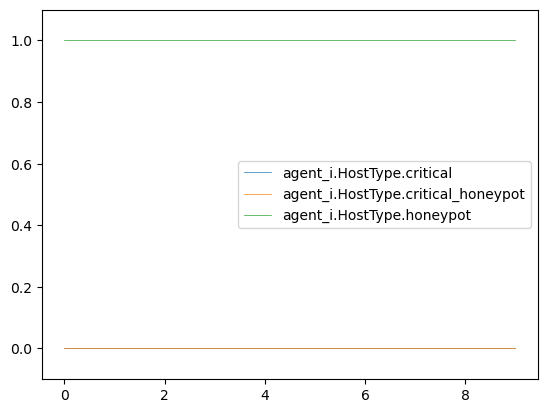

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                   0.500000                                 0.0   
1                   0.500000                                 0.0   
2                   0.339934                                 0.0   
3                   0.339890                                 0.0   
4                   0.335592                                 0.0   
5                   0.240039                                 0.0   
6                   0.214955                                 0.0   
7                   0.214955                                 0.0   
8                   0.214955                                 0.0   
9                   0.214955                                 0.0   

   agent_j.HostType.honeypot  agent_j.action    agent_i.action  \
0                   0.500000       FileRecon               Nop   
1                   0.500000  ManipulateData               Nop   
2                   0.660066    EnumAccounts  DeployDataDecoys   
3                   0.660110      PrivEscAcc               Nop   
4                   0.664408       FileRecon               Nop   
5                   0.759961  ManipulateData               Nop   
6                   0.785045            Exit               Nop   
7                   0.785045             Nop               Nop   
8                   0.785045             Nop               Nop   
9                   0.785045             Nop               Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           success   
1                         none                           failure   
2                   user_files                           success   
3                         none                           success   
4                   user_files                           success   
5                         none                           success   
6                   user_files                           success   
7                   user_files                           failure   
8                         none                           failure   
9                   user_files                           success   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                       active  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

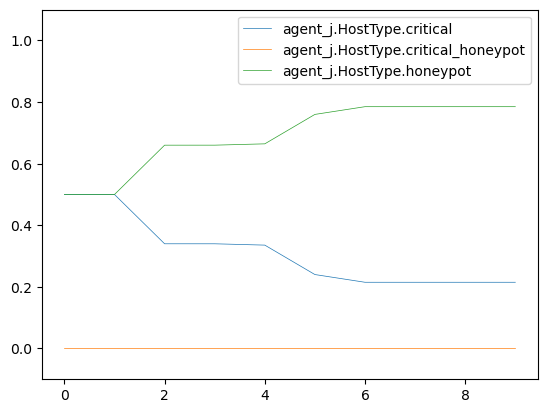

=============AccFound============


state.AccFound.no  state.AccFound.yes    agent_i.action  agent_j.action
0                1.0                 0.0               Nop       FileRecon
1                1.0                 0.0               Nop  ManipulateData
2                1.0                 0.0  DeployDataDecoys    EnumAccounts
3                0.0                 1.0               Nop      PrivEscAcc
4                0.0                 1.0               Nop       FileRecon
5                0.0                 1.0               Nop  ManipulateData
6                0.0                 1.0               Nop            Exit
7                0.0                 1.0               Nop             Nop
8                0.0                 1.0               Nop             Nop
9                0.0                 1.0               Nop             Nop

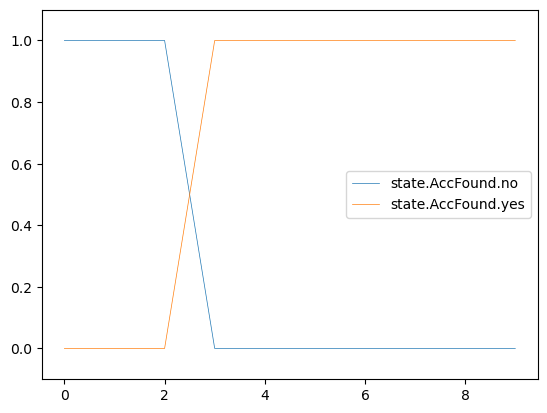

agent_i.AccFound.no  agent_i.AccFound.yes    agent_i.action  \
0             1.000000              0.000000               Nop   
1             1.000000              0.000000               Nop   
2             0.917547              0.082453  DeployDataDecoys   
3             0.010227              0.989773               Nop   
4             0.027407              0.972593               Nop   
5             0.001439              0.998561               Nop   
6             0.000230              0.999770               Nop   
7             0.000236              0.999764               Nop   
8             0.000236              0.999764               Nop   
9             0.000236              0.999764               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1  ManipulateData                       file_write  
2    EnumAccounts                        file_enum  
3      PrivEscAcc                             none  
4       FileRecon                        file_enum  
5  ManipulateData                       file_write  
6            Exit                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

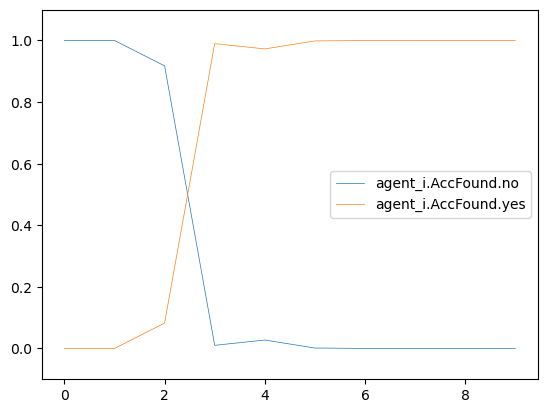

agent_j.AccFound.no  agent_j.AccFound.yes  agent_j.action  \
0             1.000000              0.000000       FileRecon   
1             1.000000              0.000000  ManipulateData   
2             1.000000              0.000000    EnumAccounts   
3             0.101815              0.898185      PrivEscAcc   
4             0.000113              0.999887       FileRecon   
5             0.000050              0.999950  ManipulateData   
6             0.000033              0.999967            Exit   
7             0.000033              0.999967             Nop   
8             0.000033              0.999967             Nop   
9             0.000033              0.999967             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1               Nop                         none   
2  DeployDataDecoys                   user_files   
3               Nop                         none   
4               Nop                   user_files   
5               Nop                         none   
6               Nop                   user_files   
7               Nop                   user_files   
8               Nop                         none   
9               Nop                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           success                       active  
1                           failure                       active  
2                           success                       active  
3                           success                       active  
4                           success                       active  
5                           success                       active  
6                           success                     inactive  
7                           failure                     inactive  
8                           failure                     inactive  
9                           success                     inactive

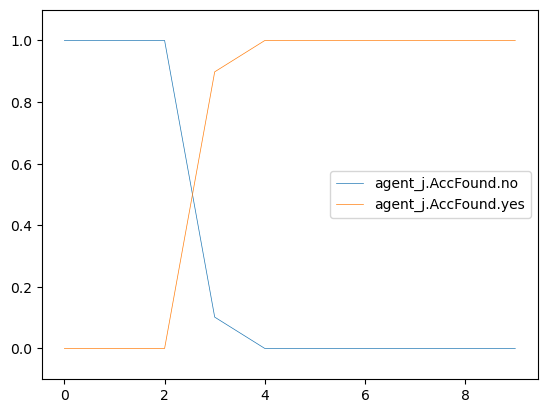

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes    agent_i.action  \
0                    1.0                     0.0               Nop   
1                    1.0                     0.0               Nop   
2                    1.0                     0.0  DeployDataDecoys   
3                    1.0                     0.0               Nop   
4                    1.0                     0.0               Nop   
5                    1.0                     0.0               Nop   
6                    0.0                     1.0               Nop   
7                    0.0                     1.0               Nop   
8                    0.0                     1.0               Nop   
9                    0.0                     1.0               Nop   

   agent_j.action  
0       FileRecon  
1  ManipulateData  
2    EnumAccounts  
3      PrivEscAcc  
4       FileRecon  
5  ManipulateData  
6            Exit  
7             Nop  
8             Nop  
9             Nop

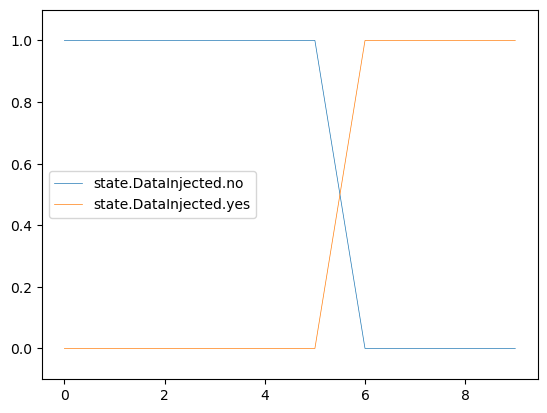

agent_i.DataInjected.no  agent_i.DataInjected.yes    agent_i.action  \
0                 1.000000                  0.000000               Nop   
1                 1.000000                  0.000000               Nop   
2                 1.000000                  0.000000  DeployDataDecoys   
3                 1.000000                  0.000000               Nop   
4                 1.000000                  0.000000               Nop   
5                 0.999992                  0.000008               Nop   
6                 0.030804                  0.969196               Nop   
7                 0.000697                  0.999303               Nop   
8                 0.000335                  0.999665               Nop   
9                 0.000334                  0.999666               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1  ManipulateData                       file_write  
2    EnumAccounts                        file_enum  
3      PrivEscAcc                             none  
4       FileRecon                        file_enum  
5  ManipulateData                       file_write  
6            Exit                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

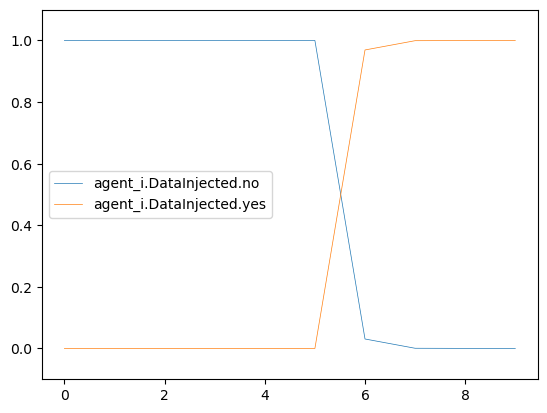

agent_j.DataInjected.no  agent_j.DataInjected.yes  agent_j.action  \
0                 1.000000                  0.000000       FileRecon   
1                 1.000000                  0.000000  ManipulateData   
2                 0.997753                  0.002247    EnumAccounts   
3                 0.997753                  0.002247      PrivEscAcc   
4                 0.997753                  0.002247       FileRecon   
5                 0.995734                  0.004266  ManipulateData   
6                 0.000127                  0.999873            Exit   
7                 0.000127                  0.999874             Nop   
8                 0.000127                  0.999873             Nop   
9                 0.000127                  0.999873             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1               Nop                         none   
2  DeployDataDecoys                   user_files   
3               Nop                         none   
4               Nop                   user_files   
5               Nop                         none   
6               Nop                   user_files   
7               Nop                   user_files   
8               Nop                         none   
9               Nop                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           success                       active  
1                           failure                       active  
2                           success                       active  
3                           success                       active  
4                           success                       active  
5                           success                       active  
6                           success                     inactive  
7                           failure                     inactive  
8                           failure                     inactive  
9                           success                     inactive

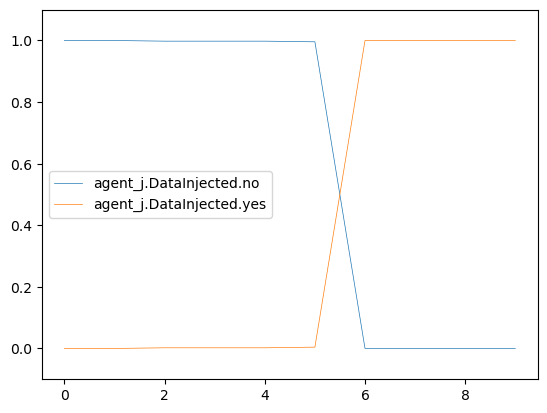

=============AttActive============


state.AttActive.no  state.AttActive.yes    agent_i.action  agent_j.action
0                 0.0                  1.0               Nop       FileRecon
1                 0.0                  1.0               Nop  ManipulateData
2                 0.0                  1.0  DeployDataDecoys    EnumAccounts
3                 0.0                  1.0               Nop      PrivEscAcc
4                 0.0                  1.0               Nop       FileRecon
5                 0.0                  1.0               Nop  ManipulateData
6                 0.0                  1.0               Nop            Exit
7                 1.0                  0.0               Nop             Nop
8                 1.0                  0.0               Nop             Nop
9                 1.0                  0.0               Nop             Nop

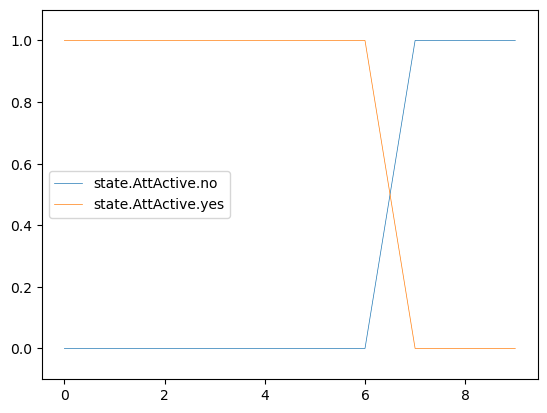

agent_i.AttActive.no  agent_i.AttActive.yes    agent_i.action  \
0              0.500000           5.000000e-01               Nop   
1              0.010204           9.897959e-01               Nop   
2              0.019080           9.809197e-01  DeployDataDecoys   
3              0.000229           9.997705e-01               Nop   
4              0.017583           9.824172e-01               Nop   
5              0.000207           9.997933e-01               Nop   
6              0.000097           9.999032e-01               Nop   
7              0.999584           4.161396e-04               Nop   
8              0.999995           4.826821e-06               Nop   
9              1.000000           1.218278e-08               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1  ManipulateData                       file_write  
2    EnumAccounts                        file_enum  
3      PrivEscAcc                             none  
4       FileRecon                        file_enum  
5  ManipulateData                       file_write  
6            Exit                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

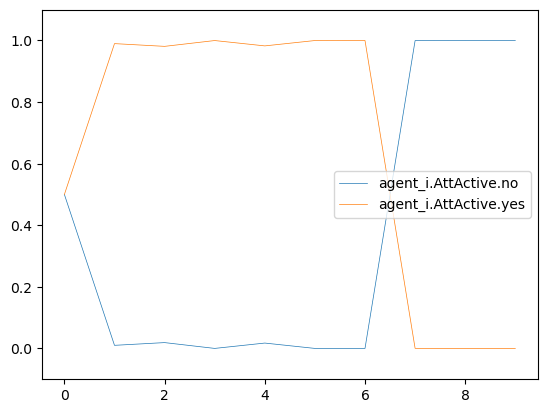

agent_j.AttActive.no  agent_j.AttActive.yes  agent_j.action  \
0                   0.0                    1.0       FileRecon   
1                   0.0                    1.0  ManipulateData   
2                   0.0                    1.0    EnumAccounts   
3                   0.0                    1.0      PrivEscAcc   
4                   0.0                    1.0       FileRecon   
5                   0.0                    1.0  ManipulateData   
6                   0.0                    1.0            Exit   
7                   1.0                    0.0             Nop   
8                   1.0                    0.0             Nop   
9                   1.0                    0.0             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1               Nop                         none   
2  DeployDataDecoys                   user_files   
3               Nop                         none   
4               Nop                   user_files   
5               Nop                         none   
6               Nop                   user_files   
7               Nop                   user_files   
8               Nop                         none   
9               Nop                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           success                       active  
1                           failure                       active  
2                           success                       active  
3                           success                       active  
4                           success                       active  
5                           success                       active  
6                           success                     inactive  
7                           failure                     inactive  
8                           failure                     inactive  
9                           success                     inactive

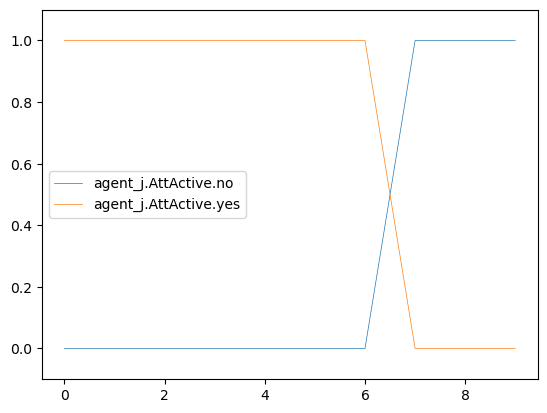

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes    agent_i.action  \
0                   0.0                    1.0               Nop   
1                   0.0                    1.0               Nop   
2                   0.0                    1.0  DeployDataDecoys   
3                   0.0                    1.0               Nop   
4                   0.0                    1.0               Nop   
5                   0.0                    1.0               Nop   
6                   0.0                    1.0               Nop   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

   agent_j.action  
0       FileRecon  
1  ManipulateData  
2    EnumAccounts  
3      PrivEscAcc  
4       FileRecon  
5  ManipulateData  
6            Exit  
7             Nop  
8             Nop  
9             Nop

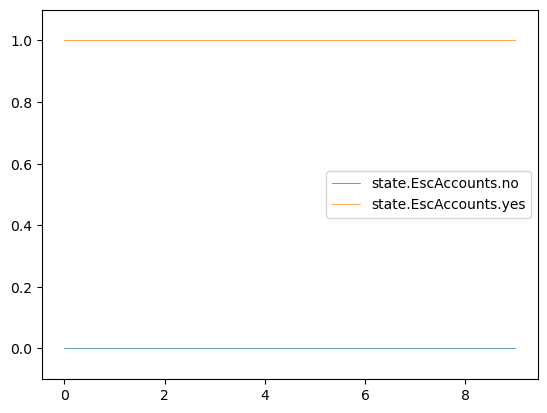

agent_i.EscAccounts.no  agent_i.EscAccounts.yes    agent_i.action  \
0                     0.0                      1.0               Nop   
1                     0.0                      1.0               Nop   
2                     0.0                      1.0  DeployDataDecoys   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1  ManipulateData                       file_write  
2    EnumAccounts                        file_enum  
3      PrivEscAcc                             none  
4       FileRecon                        file_enum  
5  ManipulateData                       file_write  
6            Exit                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

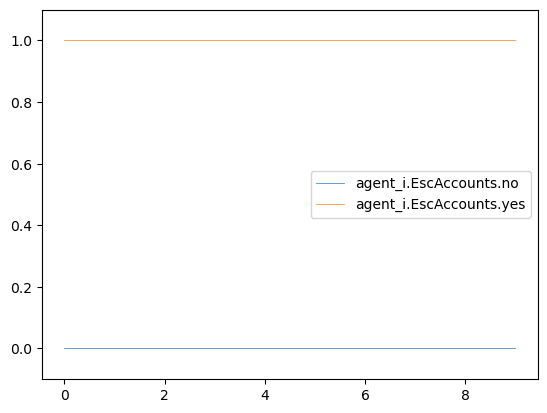

agent_j.EscAccounts.no  agent_j.EscAccounts.yes  agent_j.action  \
0                0.500000                 0.500000       FileRecon   
1                0.500000                 0.500000  ManipulateData   
2                0.500000                 0.500000    EnumAccounts   
3                0.100806                 0.899194      PrivEscAcc   
4                0.000112                 0.999888       FileRecon   
5                0.000049                 0.999951  ManipulateData   
6                0.000032                 0.999968            Exit   
7                0.000032                 0.999968             Nop   
8                0.000032                 0.999967             Nop   
9                0.000032                 0.999968             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1               Nop                         none   
2  DeployDataDecoys                   user_files   
3               Nop                         none   
4               Nop                   user_files   
5               Nop                         none   
6               Nop                   user_files   
7               Nop                   user_files   
8               Nop                         none   
9               Nop                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           success                       active  
1                           failure                       active  
2                           success                       active  
3                           success                       active  
4                           success                       active  
5                           success                       active  
6                           success                     inactive  
7                           failure                     inactive  
8                           failure                     inactive  
9                           success                     inactive

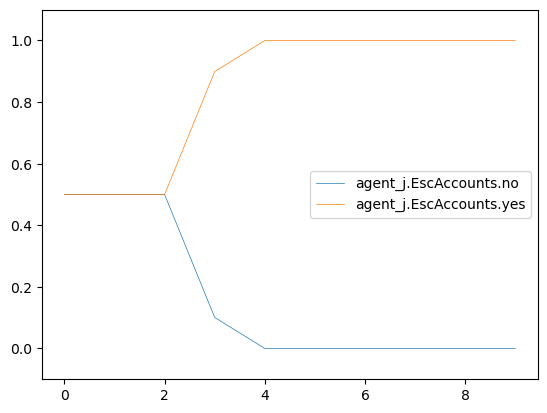

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user    agent_i.action  \
0                   1.0                   0.0               Nop   
1                   1.0                   0.0               Nop   
2                   1.0                   0.0  DeployDataDecoys   
3                   1.0                   0.0               Nop   
4                   1.0                   0.0               Nop   
5                   1.0                   0.0               Nop   
6                   1.0                   0.0               Nop   
7                   1.0                   0.0               Nop   
8                   1.0                   0.0               Nop   
9                   1.0                   0.0               Nop   

   agent_j.action  
0       FileRecon  
1  ManipulateData  
2    EnumAccounts  
3      PrivEscAcc  
4       FileRecon  
5  ManipulateData  
6            Exit  
7             Nop  
8             Nop  
9             Nop

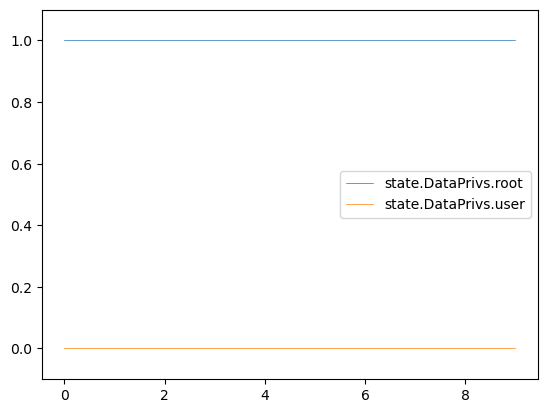

agent_i.DataPrivs.root  agent_i.DataPrivs.user    agent_i.action  \
0                     1.0                     0.0               Nop   
1                     1.0                     0.0               Nop   
2                     1.0                     0.0  DeployDataDecoys   
3                     1.0                     0.0               Nop   
4                     1.0                     0.0               Nop   
5                     1.0                     0.0               Nop   
6                     1.0                     0.0               Nop   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1  ManipulateData                       file_write  
2    EnumAccounts                        file_enum  
3      PrivEscAcc                             none  
4       FileRecon                        file_enum  
5  ManipulateData                       file_write  
6            Exit                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

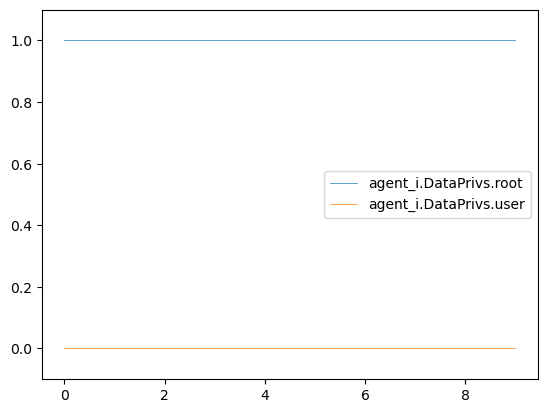

agent_j.DataPrivs.root  agent_j.DataPrivs.user  agent_j.action  \
0                0.500000                0.500000       FileRecon   
1                0.192308                0.807692  ManipulateData   
2                0.623596                0.376405    EnumAccounts   
3                0.623596                0.376405      PrivEscAcc   
4                0.623596                0.376405       FileRecon   
5                0.692499                0.307501  ManipulateData   
6                0.710878                0.289122            Exit   
7                0.710878                0.289123             Nop   
8                0.710878                0.289122             Nop   
9                0.710878                0.289123             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1               Nop                         none   
2  DeployDataDecoys                   user_files   
3               Nop                         none   
4               Nop                   user_files   
5               Nop                         none   
6               Nop                   user_files   
7               Nop                   user_files   
8               Nop                         none   
9               Nop                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           success                       active  
1                           failure                       active  
2                           success                       active  
3                           success                       active  
4                           success                       active  
5                           success                       active  
6                           success                     inactive  
7                           failure                     inactive  
8                           failure                     inactive  
9                           success                     inactive

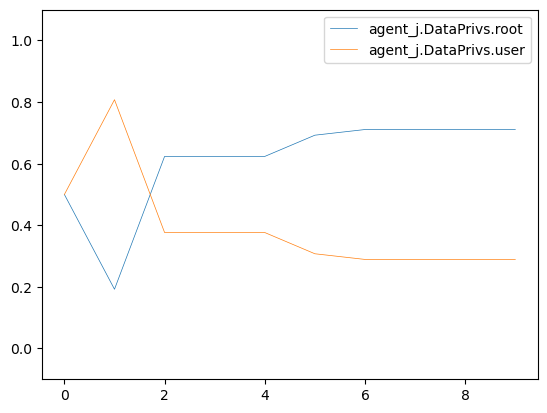

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes    agent_i.action  \
0                   1.0                    0.0               Nop   
1                   1.0                    0.0               Nop   
2                   1.0                    0.0  DeployDataDecoys   
3                   0.0                    1.0               Nop   
4                   0.0                    1.0               Nop   
5                   0.0                    1.0               Nop   
6                   0.0                    1.0               Nop   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

   agent_j.action  
0       FileRecon  
1  ManipulateData  
2    EnumAccounts  
3      PrivEscAcc  
4       FileRecon  
5  ManipulateData  
6            Exit  
7             Nop  
8             Nop  
9             Nop

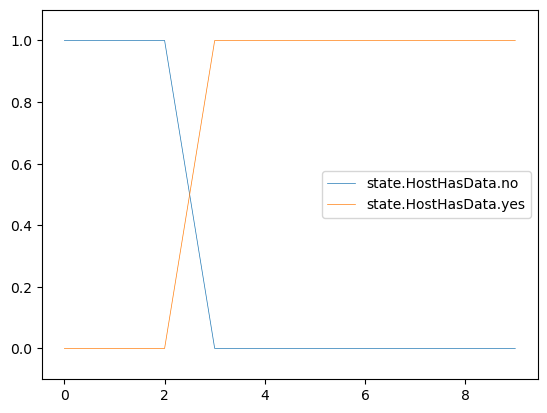

agent_i.HostHasData.no  agent_i.HostHasData.yes    agent_i.action  \
0                     1.0                      0.0               Nop   
1                     1.0                      0.0               Nop   
2                     1.0                      0.0  DeployDataDecoys   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1  ManipulateData                       file_write  
2    EnumAccounts                        file_enum  
3      PrivEscAcc                             none  
4       FileRecon                        file_enum  
5  ManipulateData                       file_write  
6            Exit                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

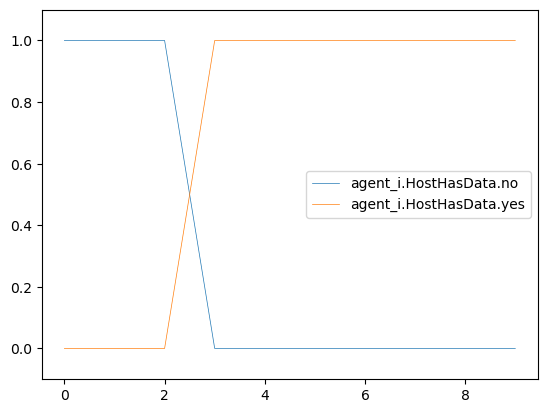

agent_j.HostHasData.no  agent_j.HostHasData.yes  agent_j.action  \
0                0.500000                 0.500000       FileRecon   
1                0.192308                 0.807692  ManipulateData   
2                0.623596                 0.376405    EnumAccounts   
3                0.423826                 0.576174      PrivEscAcc   
4                0.416617                 0.583383       FileRecon   
5                0.087699                 0.912301  ManipulateData   
6                0.000099                 0.999901            Exit   
7                0.000099                 0.999901             Nop   
8                0.000099                 0.999901             Nop   
9                0.000099                 0.999901             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1               Nop                         none   
2  DeployDataDecoys                   user_files   
3               Nop                         none   
4               Nop                   user_files   
5               Nop                         none   
6               Nop                   user_files   
7               Nop                   user_files   
8               Nop                         none   
9               Nop                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           success                       active  
1                           failure                       active  
2                           success                       active  
3                           success                       active  
4                           success                       active  
5                           success                       active  
6                           success                     inactive  
7                           failure                     inactive  
8                           failure                     inactive  
9                           success                     inactive

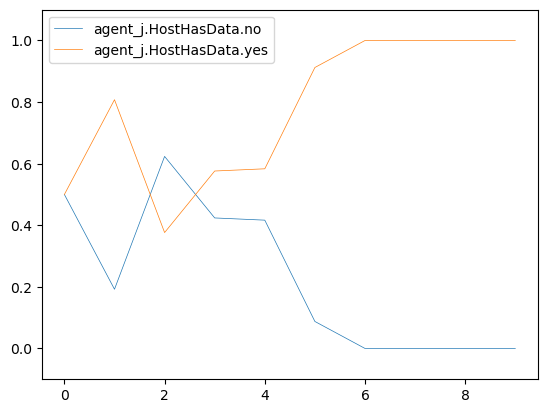

=============DataFound============


state.DataFound.no  state.DataFound.yes    agent_i.action  agent_j.action
0                 1.0                  0.0               Nop       FileRecon
1                 1.0                  0.0               Nop  ManipulateData
2                 1.0                  0.0  DeployDataDecoys    EnumAccounts
3                 1.0                  0.0               Nop      PrivEscAcc
4                 1.0                  0.0               Nop       FileRecon
5                 0.0                  1.0               Nop  ManipulateData
6                 0.0                  1.0               Nop            Exit
7                 0.0                  1.0               Nop             Nop
8                 0.0                  1.0               Nop             Nop
9                 0.0                  1.0               Nop             Nop

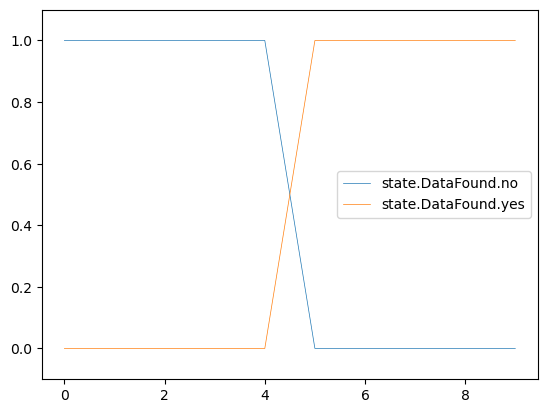

agent_i.DataFound.no  agent_i.DataFound.yes    agent_i.action  \
0              1.000000               0.000000               Nop   
1              1.000000               0.000000               Nop   
2              1.000000               0.000000  DeployDataDecoys   
3              1.000000               0.000000               Nop   
4              0.999256               0.000744               Nop   
5              0.202047               0.797953               Nop   
6              0.027684               0.972316               Nop   
7              0.000403               0.999597               Nop   
8              0.000332               0.999668               Nop   
9              0.000332               0.999668               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1  ManipulateData                       file_write  
2    EnumAccounts                        file_enum  
3      PrivEscAcc                             none  
4       FileRecon                        file_enum  
5  ManipulateData                       file_write  
6            Exit                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

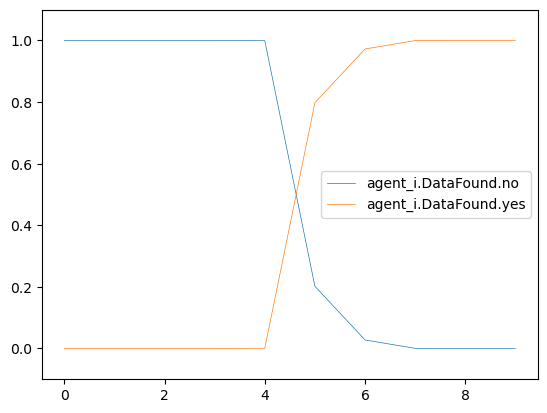

agent_j.DataFound.no  agent_j.DataFound.yes  agent_j.action  \
0              1.000000               0.000000       FileRecon   
1              0.307692               0.692308  ManipulateData   
2              0.997753               0.002247    EnumAccounts   
3              0.997753               0.002247      PrivEscAcc   
4              0.997753               0.002247       FileRecon   
5              0.112287               0.887713  ManipulateData   
6              0.000127               0.999873            Exit   
7              0.000127               0.999874             Nop   
8              0.000127               0.999873             Nop   
9              0.000127               0.999873             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1               Nop                         none   
2  DeployDataDecoys                   user_files   
3               Nop                         none   
4               Nop                   user_files   
5               Nop                         none   
6               Nop                   user_files   
7               Nop                   user_files   
8               Nop                         none   
9               Nop                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           success                       active  
1                           failure                       active  
2                           success                       active  
3                           success                       active  
4                           success                       active  
5                           success                       active  
6                           success                     inactive  
7                           failure                     inactive  
8                           failure                     inactive  
9                           success                     inactive

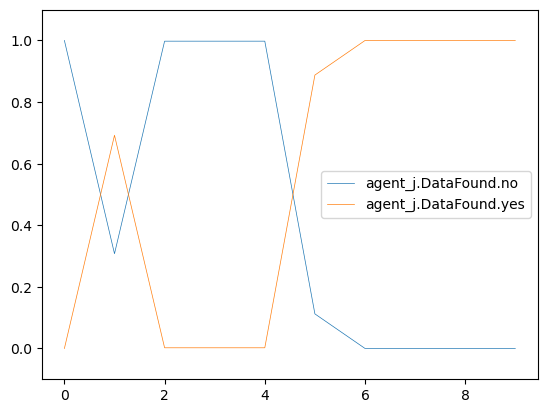

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user    agent_i.action  \
0                     0.0                     1.0               Nop   
1                     0.0                     1.0               Nop   
2                     0.0                     1.0  DeployDataDecoys   
3                     0.0                     1.0               Nop   
4                     1.0                     0.0               Nop   
5                     1.0                     0.0               Nop   
6                     1.0                     0.0               Nop   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

   agent_j.action  
0       FileRecon  
1  ManipulateData  
2    EnumAccounts  
3      PrivEscAcc  
4       FileRecon  
5  ManipulateData  
6            Exit  
7             Nop  
8             Nop  
9             Nop

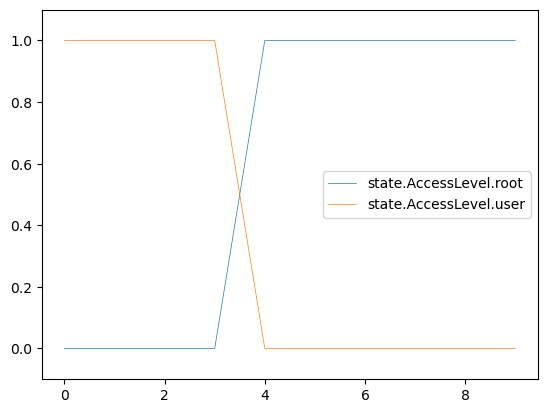

agent_i.AccessLevel.root  agent_i.AccessLevel.user    agent_i.action  \
0                  0.000000                  1.000000               Nop   
1                  0.000000                  1.000000               Nop   
2                  0.000000                  1.000000  DeployDataDecoys   
3                  0.000947                  0.999053               Nop   
4                  0.875427                  0.124573               Nop   
5                  0.998446                  0.001554               Nop   
6                  0.999738                  0.000262               Nop   
7                  0.999731                  0.000269               Nop   
8                  0.999731                  0.000269               Nop   
9                  0.999731                  0.000269               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1  ManipulateData                       file_write  
2    EnumAccounts                        file_enum  
3      PrivEscAcc                             none  
4       FileRecon                        file_enum  
5  ManipulateData                       file_write  
6            Exit                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

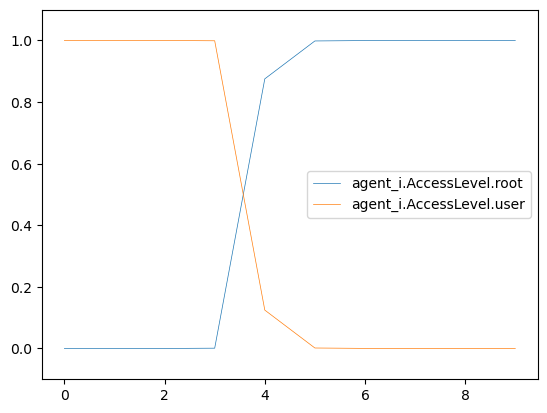

agent_j.AccessLevel.root  agent_j.AccessLevel.user  agent_j.action  \
0                  0.000000                  1.000000       FileRecon   
1                  0.000000                  1.000000  ManipulateData   
2                  0.000000                  1.000000    EnumAccounts   
3                  0.000000                  1.000000      PrivEscAcc   
4                  0.999887                  0.000113       FileRecon   
5                  0.999950                  0.000050  ManipulateData   
6                  0.999967                  0.000033            Exit   
7                  0.999967                  0.000033             Nop   
8                  0.999967                  0.000033             Nop   
9                  0.999967                  0.000033             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1               Nop                         none   
2  DeployDataDecoys                   user_files   
3               Nop                         none   
4               Nop                   user_files   
5               Nop                         none   
6               Nop                   user_files   
7               Nop                   user_files   
8               Nop                         none   
9               Nop                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           success                       active  
1                           failure                       active  
2                           success                       active  
3                           success                       active  
4                           success                       active  
5                           success                       active  
6                           success                     inactive  
7                           failure                     inactive  
8                           failure                     inactive  
9                           success                     inactive

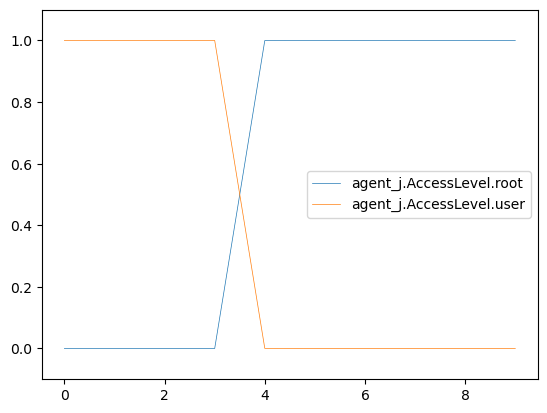

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                        file_enum
2                               1.0                         su_login
3                               1.0                        file_enum
4                               1.0                        file_enum
5                               1.0                        file_enum
6                               1.0                       file_write
7                               1.0                             none
8                               1.0                             none
9                               1.0                             none

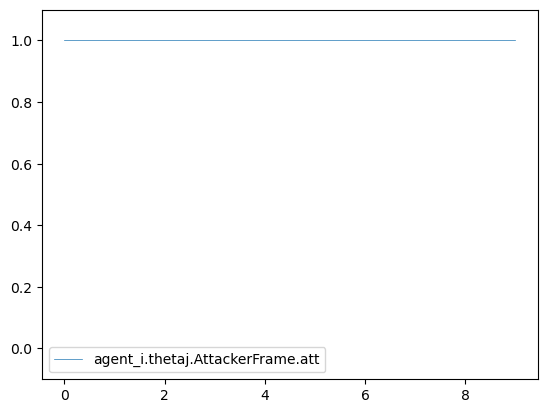

agent_j.thetaj.DefFrame.highCap  agent_j.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.500000                        0.500000   
2                         0.339934                        0.660066   
3                         0.335681                        0.664319   
4                         0.165730                        0.834270   
5                         0.049766                        0.950234   
6                         0.247863                        0.752137   
7                         0.568642                        0.431358   
8                         0.568642                        0.431358   
9                         0.568642                        0.431358   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           failure   
1                         none                           success   
2                   user_files                           success   
3                         none                           failure   
4                         none                           failure   
5                         none                           success   
6                         none                           success   
7                   user_files                           failure   
8                   user_files                           success   
9                   user_files                           success   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                       active  
6                       active  
7                     inactive  
8                     inactive  
9                     inactive

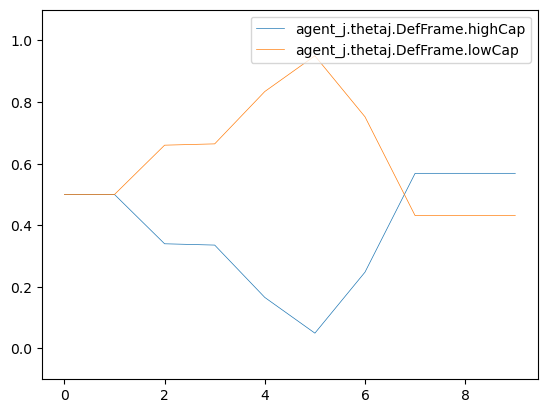

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot    agent_i.action  agent_j.action  
0                      1.0               Nop       FileRecon  
1                      1.0               Nop    EnumAccounts  
2                      1.0  DeployDataDecoys      PrivEscAcc  
3                      1.0               Nop       FileRecon  
4                      1.0               Nop       FileRecon  
5                      1.0               Nop       FileRecon  
6                      1.0               Nop  ManipulateData  
7                      1.0               Nop            Exit  
8                      1.0               Nop             Nop  
9                      1.0               Nop             Nop

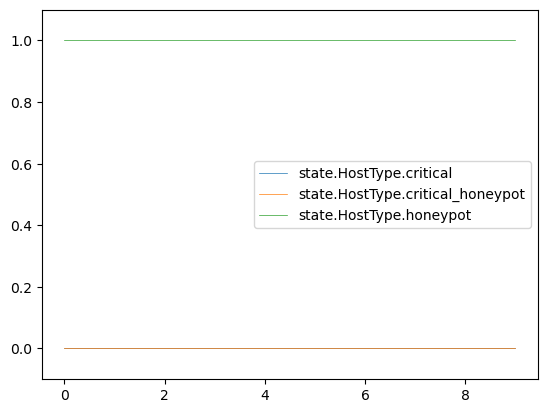

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot    agent_i.action  agent_j.action  \
0                        1.0               Nop       FileRecon   
1                        1.0               Nop    EnumAccounts   
2                        1.0  DeployDataDecoys      PrivEscAcc   
3                        1.0               Nop       FileRecon   
4                        1.0               Nop       FileRecon   
5                        1.0               Nop       FileRecon   
6                        1.0               Nop  ManipulateData   
7                        1.0               Nop            Exit   
8                        1.0               Nop             Nop   
9                        1.0               Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                         su_login  
3                        file_enum  
4                        file_enum  
5                        file_enum  
6                       file_write  
7                             none  
8                             none  
9                             none

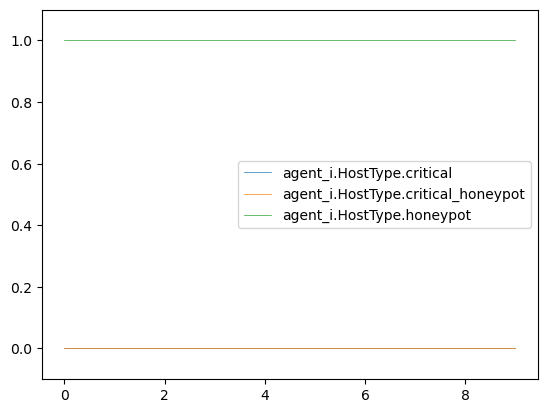

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                   0.500000                                 0.0   
1                   0.500000                                 0.0   
2                   0.339934                                 0.0   
3                   0.335681                                 0.0   
4                   0.417305                                 0.0   
5                   0.475124                                 0.0   
6                   0.376070                                 0.0   
7                   0.215679                                 0.0   
8                   0.215679                                 0.0   
9                   0.215679                                 0.0   

   agent_j.HostType.honeypot  agent_j.action    agent_i.action  \
0                   0.500000       FileRecon               Nop   
1                   0.500000    EnumAccounts               Nop   
2                   0.660066      PrivEscAcc  DeployDataDecoys   
3                   0.664319       FileRecon               Nop   
4                   0.582695       FileRecon               Nop   
5                   0.524876       FileRecon               Nop   
6                   0.623930  ManipulateData               Nop   
7                   0.784320            Exit               Nop   
8                   0.784321             Nop               Nop   
9                   0.784321             Nop               Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           failure   
1                         none                           success   
2                   user_files                           success   
3                         none                           failure   
4                         none                           failure   
5                         none                           success   
6                         none                           success   
7                   user_files                           failure   
8                   user_files                           success   
9                   user_files                           success   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                       active  
6                       active  
7                     inactive  
8                     inactive  
9                     inactive

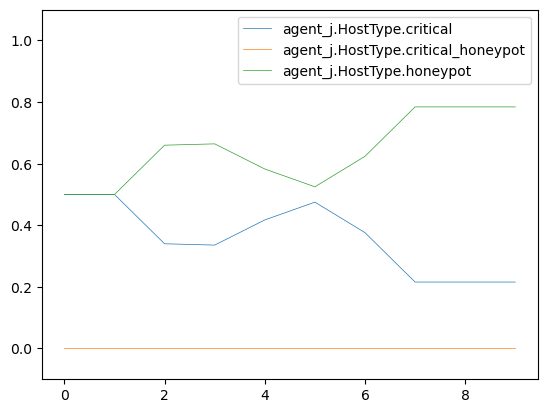

=============AccFound============


state.AccFound.no  state.AccFound.yes    agent_i.action  agent_j.action
0                1.0                 0.0               Nop       FileRecon
1                1.0                 0.0               Nop    EnumAccounts
2                0.0                 1.0  DeployDataDecoys      PrivEscAcc
3                0.0                 1.0               Nop       FileRecon
4                0.0                 1.0               Nop       FileRecon
5                0.0                 1.0               Nop       FileRecon
6                0.0                 1.0               Nop  ManipulateData
7                0.0                 1.0               Nop            Exit
8                0.0                 1.0               Nop             Nop
9                0.0                 1.0               Nop             Nop

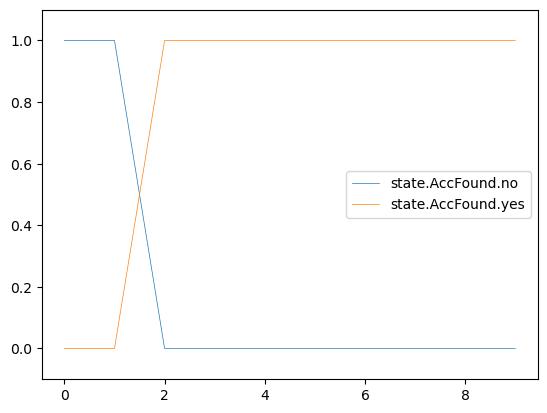

agent_i.AccFound.no  agent_i.AccFound.yes    agent_i.action  \
0             1.000000              0.000000               Nop   
1             1.000000              0.000000               Nop   
2             0.011249              0.988751  DeployDataDecoys   
3             0.010001              0.989999               Nop   
4             0.010000              0.990000               Nop   
5             0.032889              0.967111               Nop   
6             0.001780              0.998220               Nop   
7             0.000462              0.999538               Nop   
8             0.000462              0.999538               Nop   
9             0.000462              0.999538               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4       FileRecon                        file_enum  
5       FileRecon                        file_enum  
6  ManipulateData                       file_write  
7            Exit                             none  
8             Nop                             none  
9             Nop                             none

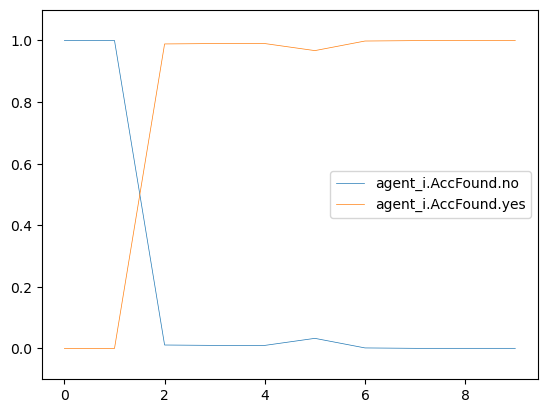

agent_j.AccFound.no  agent_j.AccFound.yes  agent_j.action  \
0             1.000000              0.000000       FileRecon   
1             1.000000              0.000000    EnumAccounts   
2             0.101815              0.898186      PrivEscAcc   
3             0.000113              0.999887       FileRecon   
4             0.000171              0.999829       FileRecon   
5             0.000210              0.999790       FileRecon   
6             0.000143              0.999857  ManipulateData   
7             0.000033              0.999966            Exit   
8             0.000033              0.999966             Nop   
9             0.000033              0.999966             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1               Nop                         none   
2  DeployDataDecoys                   user_files   
3               Nop                         none   
4               Nop                         none   
5               Nop                         none   
6               Nop                         none   
7               Nop                   user_files   
8               Nop                   user_files   
9               Nop                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           failure                       active  
4                           failure                       active  
5                           success                       active  
6                           success                       active  
7                           failure                     inactive  
8                           success                     inactive  
9                           success                     inactive

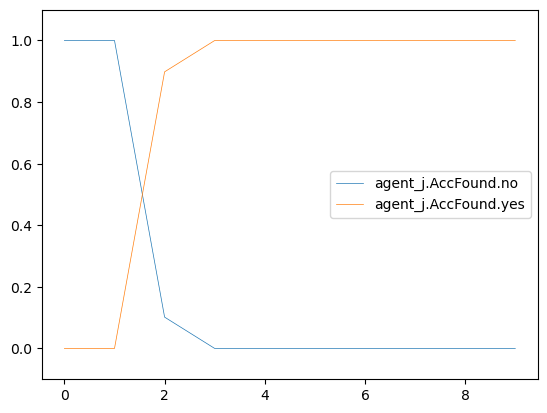

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes    agent_i.action  \
0                    1.0                     0.0               Nop   
1                    1.0                     0.0               Nop   
2                    1.0                     0.0  DeployDataDecoys   
3                    1.0                     0.0               Nop   
4                    1.0                     0.0               Nop   
5                    1.0                     0.0               Nop   
6                    1.0                     0.0               Nop   
7                    0.0                     1.0               Nop   
8                    0.0                     1.0               Nop   
9                    0.0                     1.0               Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4       FileRecon  
5       FileRecon  
6  ManipulateData  
7            Exit  
8             Nop  
9             Nop

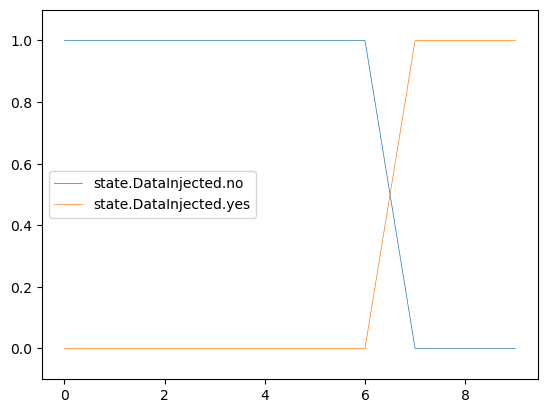

agent_i.DataInjected.no  agent_i.DataInjected.yes    agent_i.action  \
0                 1.000000                  0.000000               Nop   
1                 1.000000                  0.000000               Nop   
2                 1.000000                  0.000000  DeployDataDecoys   
3                 1.000000                  0.000000               Nop   
4                 1.000000                  0.000000               Nop   
5                 0.973177                  0.026823               Nop   
6                 0.962234                  0.037766               Nop   
7                 0.061337                  0.938663               Nop   
8                 0.061328                  0.938672               Nop   
9                 0.061328                  0.938672               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4       FileRecon                        file_enum  
5       FileRecon                        file_enum  
6  ManipulateData                       file_write  
7            Exit                             none  
8             Nop                             none  
9             Nop                             none

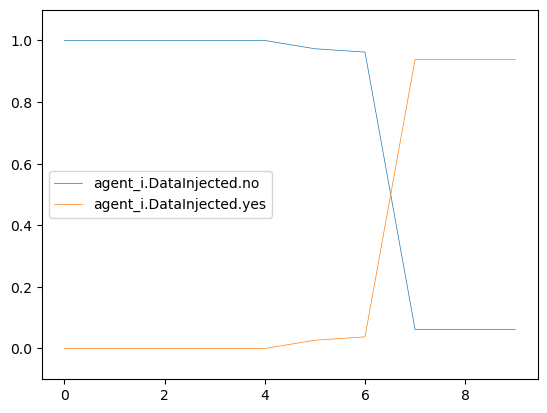

agent_j.DataInjected.no  agent_j.DataInjected.yes  agent_j.action  \
0                 1.000000                  0.000000       FileRecon   
1                 1.000000                  0.000000    EnumAccounts   
2                 1.000000                  0.000000      PrivEscAcc   
3                 1.000000                  0.000000       FileRecon   
4                 1.000000                  0.000000       FileRecon   
5                 1.000000                  0.000000       FileRecon   
6                 1.000000                  0.000000  ManipulateData   
7                 0.001331                  0.998669            Exit   
8                 0.001331                  0.998669             Nop   
9                 0.001331                  0.998669             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1               Nop                         none   
2  DeployDataDecoys                   user_files   
3               Nop                         none   
4               Nop                         none   
5               Nop                         none   
6               Nop                         none   
7               Nop                   user_files   
8               Nop                   user_files   
9               Nop                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           failure                       active  
4                           failure                       active  
5                           success                       active  
6                           success                       active  
7                           failure                     inactive  
8                           success                     inactive  
9                           success                     inactive

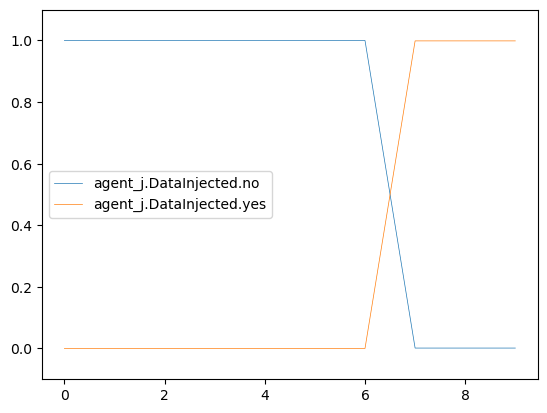

=============AttActive============


state.AttActive.no  state.AttActive.yes    agent_i.action  agent_j.action
0                 0.0                  1.0               Nop       FileRecon
1                 0.0                  1.0               Nop    EnumAccounts
2                 0.0                  1.0  DeployDataDecoys      PrivEscAcc
3                 0.0                  1.0               Nop       FileRecon
4                 0.0                  1.0               Nop       FileRecon
5                 0.0                  1.0               Nop       FileRecon
6                 0.0                  1.0               Nop  ManipulateData
7                 0.0                  1.0               Nop            Exit
8                 1.0                  0.0               Nop             Nop
9                 1.0                  0.0               Nop             Nop

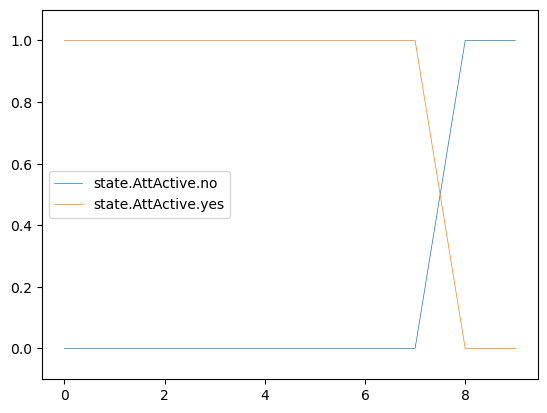

agent_i.AttActive.no  agent_i.AttActive.yes    agent_i.action  \
0          5.000000e-01           5.000000e-01               Nop   
1          1.020408e-02           9.897959e-01               Nop   
2          1.179412e-04           9.998820e-01  DeployDataDecoys   
3          1.229218e-06           9.999988e-01               Nop   
4          1.267250e-08           1.000000e+00               Nop   
5          4.768690e-10           1.000000e+00               Nop   
6          2.818842e-03           9.971811e-01               Nop   
7          5.689200e-02           9.431080e-01               Nop   
8          9.999998e-01           1.209068e-07               Nop   
9          9.999999e-01           8.108661e-13               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4       FileRecon                        file_enum  
5       FileRecon                        file_enum  
6  ManipulateData                       file_write  
7            Exit                             none  
8             Nop                             none  
9             Nop                             none

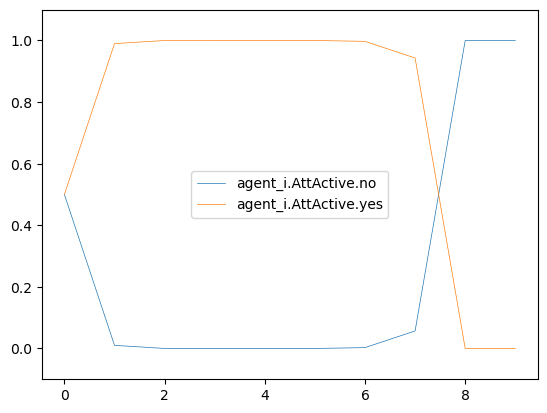

agent_j.AttActive.no  agent_j.AttActive.yes  agent_j.action  \
0                   0.0                    1.0       FileRecon   
1                   0.0                    1.0    EnumAccounts   
2                   0.0                    1.0      PrivEscAcc   
3                   0.0                    1.0       FileRecon   
4                   0.0                    1.0       FileRecon   
5                   0.0                    1.0       FileRecon   
6                   0.0                    1.0  ManipulateData   
7                   0.0                    1.0            Exit   
8                   1.0                    0.0             Nop   
9                   1.0                    0.0             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1               Nop                         none   
2  DeployDataDecoys                   user_files   
3               Nop                         none   
4               Nop                         none   
5               Nop                         none   
6               Nop                         none   
7               Nop                   user_files   
8               Nop                   user_files   
9               Nop                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           failure                       active  
4                           failure                       active  
5                           success                       active  
6                           success                       active  
7                           failure                     inactive  
8                           success                     inactive  
9                           success                     inactive

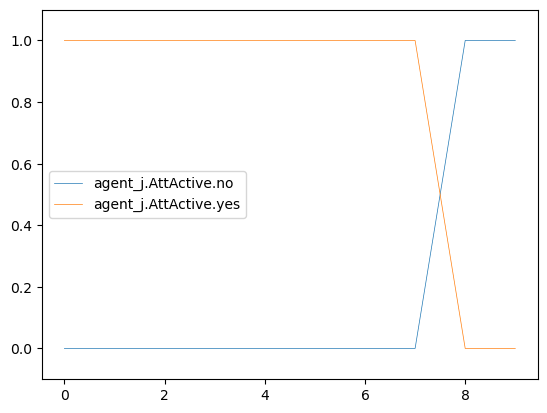

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes    agent_i.action  \
0                   0.0                    1.0               Nop   
1                   0.0                    1.0               Nop   
2                   0.0                    1.0  DeployDataDecoys   
3                   0.0                    1.0               Nop   
4                   0.0                    1.0               Nop   
5                   0.0                    1.0               Nop   
6                   0.0                    1.0               Nop   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4       FileRecon  
5       FileRecon  
6  ManipulateData  
7            Exit  
8             Nop  
9             Nop

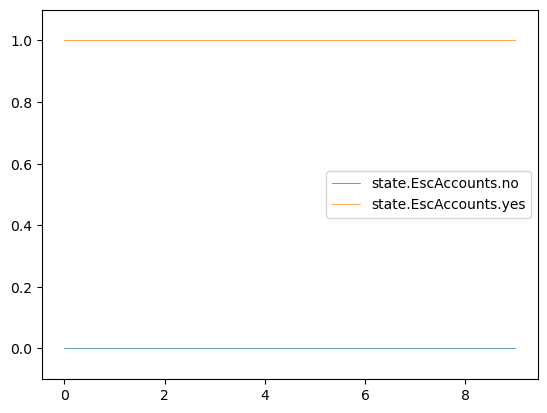

agent_i.EscAccounts.no  agent_i.EscAccounts.yes    agent_i.action  \
0                     0.0                      1.0               Nop   
1                     0.0                      1.0               Nop   
2                     0.0                      1.0  DeployDataDecoys   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4       FileRecon                        file_enum  
5       FileRecon                        file_enum  
6  ManipulateData                       file_write  
7            Exit                             none  
8             Nop                             none  
9             Nop                             none

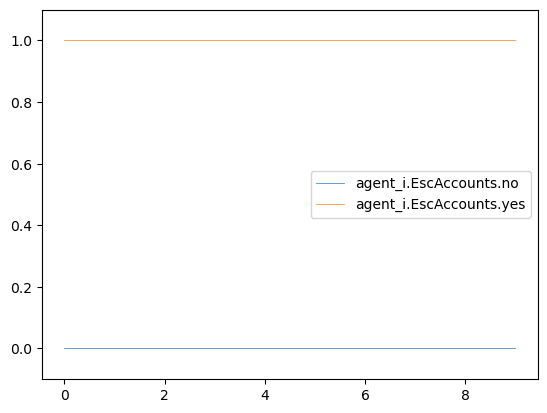

agent_j.EscAccounts.no  agent_j.EscAccounts.yes  agent_j.action  \
0                0.500000                 0.500000       FileRecon   
1                0.500000                 0.500000    EnumAccounts   
2                0.100806                 0.899194      PrivEscAcc   
3                0.000112                 0.999888       FileRecon   
4                0.000169                 0.999831       FileRecon   
5                0.000208                 0.999792       FileRecon   
6                0.000141                 0.999859  ManipulateData   
7                0.000033                 0.999967            Exit   
8                0.000033                 0.999967             Nop   
9                0.000033                 0.999967             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1               Nop                         none   
2  DeployDataDecoys                   user_files   
3               Nop                         none   
4               Nop                         none   
5               Nop                         none   
6               Nop                         none   
7               Nop                   user_files   
8               Nop                   user_files   
9               Nop                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           failure                       active  
4                           failure                       active  
5                           success                       active  
6                           success                       active  
7                           failure                     inactive  
8                           success                     inactive  
9                           success                     inactive

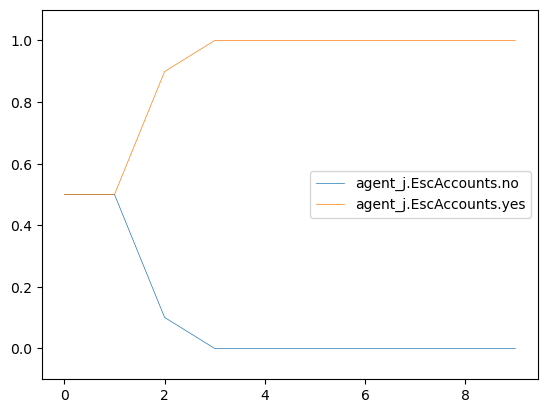

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user    agent_i.action  \
0                   1.0                   0.0               Nop   
1                   1.0                   0.0               Nop   
2                   1.0                   0.0  DeployDataDecoys   
3                   1.0                   0.0               Nop   
4                   1.0                   0.0               Nop   
5                   1.0                   0.0               Nop   
6                   1.0                   0.0               Nop   
7                   1.0                   0.0               Nop   
8                   1.0                   0.0               Nop   
9                   1.0                   0.0               Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4       FileRecon  
5       FileRecon  
6  ManipulateData  
7            Exit  
8             Nop  
9             Nop

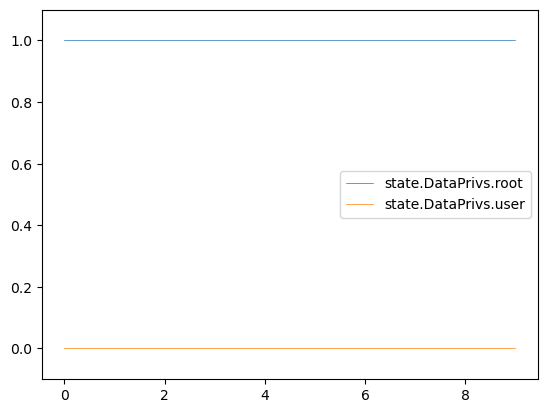

agent_i.DataPrivs.root  agent_i.DataPrivs.user    agent_i.action  \
0                     1.0                     0.0               Nop   
1                     1.0                     0.0               Nop   
2                     1.0                     0.0  DeployDataDecoys   
3                     1.0                     0.0               Nop   
4                     1.0                     0.0               Nop   
5                     1.0                     0.0               Nop   
6                     1.0                     0.0               Nop   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4       FileRecon                        file_enum  
5       FileRecon                        file_enum  
6  ManipulateData                       file_write  
7            Exit                             none  
8             Nop                             none  
9             Nop                             none

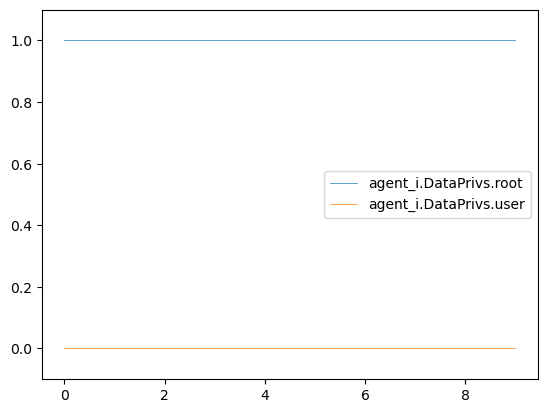

agent_j.DataPrivs.root  agent_j.DataPrivs.user  agent_j.action  \
0                0.500000                0.500000       FileRecon   
1                0.608108                0.391892    EnumAccounts   
2                0.608108                0.391892      PrivEscAcc   
3                0.608108                0.391892       FileRecon   
4                0.558776                0.441224       FileRecon   
5                0.518196                0.481804       FileRecon   
6                0.590235                0.409765  ManipulateData   
7                0.706884                0.293116            Exit   
8                0.706884                0.293116             Nop   
9                0.706884                0.293116             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1               Nop                         none   
2  DeployDataDecoys                   user_files   
3               Nop                         none   
4               Nop                         none   
5               Nop                         none   
6               Nop                         none   
7               Nop                   user_files   
8               Nop                   user_files   
9               Nop                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           failure                       active  
4                           failure                       active  
5                           success                       active  
6                           success                       active  
7                           failure                     inactive  
8                           success                     inactive  
9                           success                     inactive

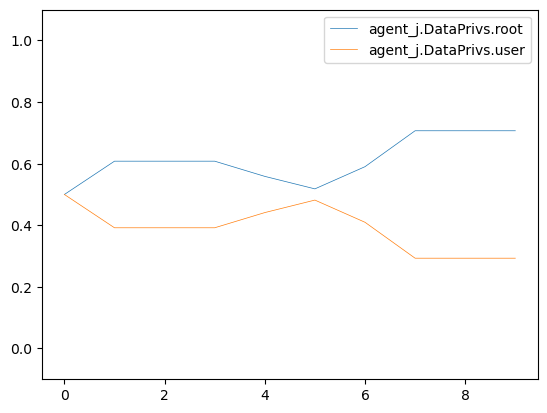

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes    agent_i.action  \
0                   1.0                    0.0               Nop   
1                   1.0                    0.0               Nop   
2                   1.0                    0.0  DeployDataDecoys   
3                   0.0                    1.0               Nop   
4                   0.0                    1.0               Nop   
5                   0.0                    1.0               Nop   
6                   0.0                    1.0               Nop   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4       FileRecon  
5       FileRecon  
6  ManipulateData  
7            Exit  
8             Nop  
9             Nop

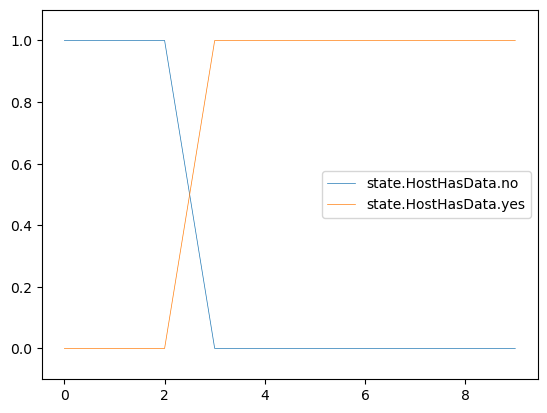

agent_i.HostHasData.no  agent_i.HostHasData.yes    agent_i.action  \
0                     1.0                      0.0               Nop   
1                     1.0                      0.0               Nop   
2                     1.0                      0.0  DeployDataDecoys   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4       FileRecon                        file_enum  
5       FileRecon                        file_enum  
6  ManipulateData                       file_write  
7            Exit                             none  
8             Nop                             none  
9             Nop                             none

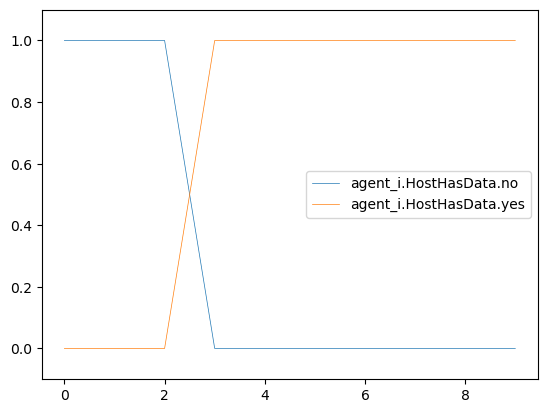

agent_j.HostHasData.no  agent_j.HostHasData.yes  agent_j.action  \
0                0.500000                 0.500000       FileRecon   
1                0.608108                 0.391892    EnumAccounts   
2                0.608108                 0.391892      PrivEscAcc   
3                0.406240                 0.593760       FileRecon   
4                0.708171                 0.291829       FileRecon   
5                0.912652                 0.087348       FileRecon   
6                0.564716                 0.435284  ManipulateData   
7                0.001316                 0.998684            Exit   
8                0.001316                 0.998684             Nop   
9                0.001316                 0.998684             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1               Nop                         none   
2  DeployDataDecoys                   user_files   
3               Nop                         none   
4               Nop                         none   
5               Nop                         none   
6               Nop                         none   
7               Nop                   user_files   
8               Nop                   user_files   
9               Nop                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           failure                       active  
4                           failure                       active  
5                           success                       active  
6                           success                       active  
7                           failure                     inactive  
8                           success                     inactive  
9                           success                     inactive

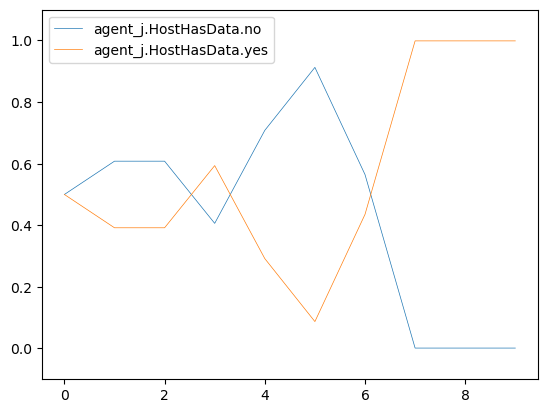

=============DataFound============


state.DataFound.no  state.DataFound.yes    agent_i.action  agent_j.action
0                 1.0                  0.0               Nop       FileRecon
1                 1.0                  0.0               Nop    EnumAccounts
2                 1.0                  0.0  DeployDataDecoys      PrivEscAcc
3                 1.0                  0.0               Nop       FileRecon
4                 1.0                  0.0               Nop       FileRecon
5                 0.0                  1.0               Nop       FileRecon
6                 0.0                  1.0               Nop  ManipulateData
7                 0.0                  1.0               Nop            Exit
8                 0.0                  1.0               Nop             Nop
9                 0.0                  1.0               Nop             Nop

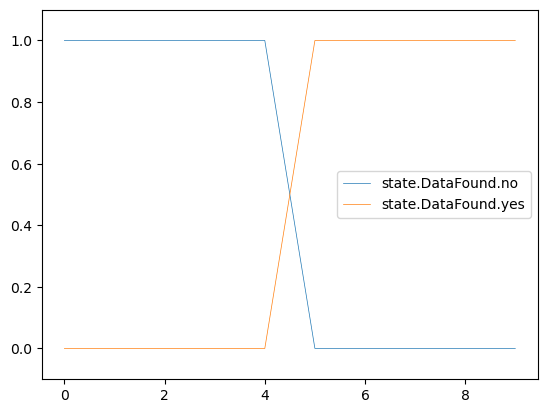

agent_i.DataFound.no  agent_i.DataFound.yes    agent_i.action  \
0              1.000000               0.000000               Nop   
1              1.000000               0.000000               Nop   
2              1.000000               0.000000  DeployDataDecoys   
3              1.000000               0.000000               Nop   
4              0.208001               0.791999               Nop   
5              0.163725               0.836275               Nop   
6              0.116223               0.883777               Nop   
7              0.040114               0.959886               Nop   
8              0.040114               0.959886               Nop   
9              0.040114               0.959886               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4       FileRecon                        file_enum  
5       FileRecon                        file_enum  
6  ManipulateData                       file_write  
7            Exit                             none  
8             Nop                             none  
9             Nop                             none

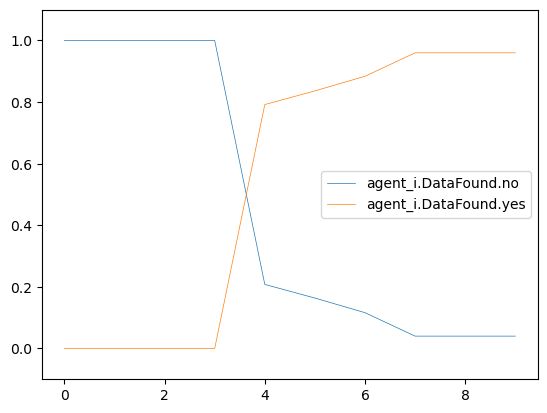

agent_j.DataFound.no  agent_j.DataFound.yes  agent_j.action  \
0              1.000000               0.000000       FileRecon   
1              0.972973               0.027027    EnumAccounts   
2              0.972973               0.027027      PrivEscAcc   
3              0.972973               0.027027       FileRecon   
4              0.906664               0.093336       FileRecon   
5              0.963902               0.036098       FileRecon   
6              0.571110               0.428890  ManipulateData   
7              0.001331               0.998669            Exit   
8              0.001331               0.998669             Nop   
9              0.001331               0.998669             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1               Nop                         none   
2  DeployDataDecoys                   user_files   
3               Nop                         none   
4               Nop                         none   
5               Nop                         none   
6               Nop                         none   
7               Nop                   user_files   
8               Nop                   user_files   
9               Nop                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           failure                       active  
4                           failure                       active  
5                           success                       active  
6                           success                       active  
7                           failure                     inactive  
8                           success                     inactive  
9                           success                     inactive

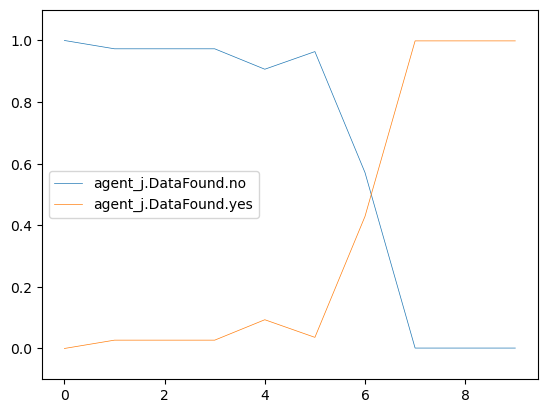

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user    agent_i.action  \
0                     0.0                     1.0               Nop   
1                     0.0                     1.0               Nop   
2                     0.0                     1.0  DeployDataDecoys   
3                     1.0                     0.0               Nop   
4                     1.0                     0.0               Nop   
5                     1.0                     0.0               Nop   
6                     1.0                     0.0               Nop   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4       FileRecon  
5       FileRecon  
6  ManipulateData  
7            Exit  
8             Nop  
9             Nop

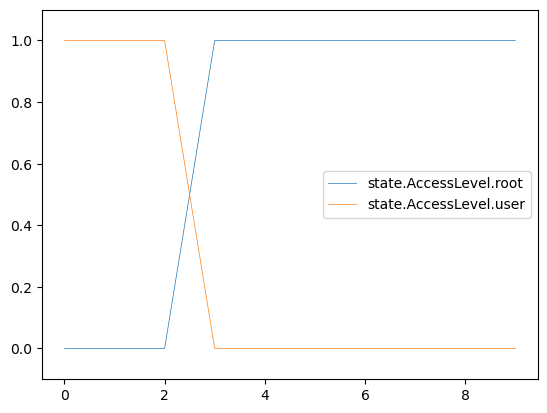

agent_i.AccessLevel.root  agent_i.AccessLevel.user    agent_i.action  \
0                  0.000000                  1.000000               Nop   
1                  0.000000                  1.000000               Nop   
2                  0.000000                  1.000000  DeployDataDecoys   
3                  0.989987                  0.010013               Nop   
4                  0.989999                  0.010001               Nop   
5                  0.967111                  0.032889               Nop   
6                  0.998220                  0.001780               Nop   
7                  0.999538                  0.000462               Nop   
8                  0.999538                  0.000462               Nop   
9                  0.999538                  0.000462               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4       FileRecon                        file_enum  
5       FileRecon                        file_enum  
6  ManipulateData                       file_write  
7            Exit                             none  
8             Nop                             none  
9             Nop                             none

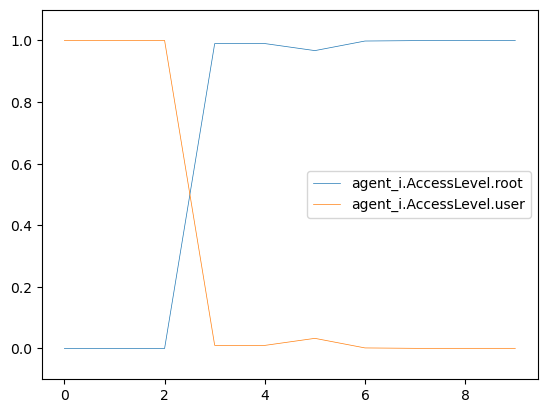

agent_j.AccessLevel.root  agent_j.AccessLevel.user  agent_j.action  \
0                  0.000000                  1.000000       FileRecon   
1                  0.000000                  1.000000    EnumAccounts   
2                  0.000000                  1.000000      PrivEscAcc   
3                  0.999887                  0.000113       FileRecon   
4                  0.999829                  0.000171       FileRecon   
5                  0.999790                  0.000210       FileRecon   
6                  0.999857                  0.000143  ManipulateData   
7                  0.999966                  0.000033            Exit   
8                  0.999966                  0.000033             Nop   
9                  0.999966                  0.000033             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1               Nop                         none   
2  DeployDataDecoys                   user_files   
3               Nop                         none   
4               Nop                         none   
5               Nop                         none   
6               Nop                         none   
7               Nop                   user_files   
8               Nop                   user_files   
9               Nop                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           failure                       active  
4                           failure                       active  
5                           success                       active  
6                           success                       active  
7                           failure                     inactive  
8                           success                     inactive  
9                           success                     inactive

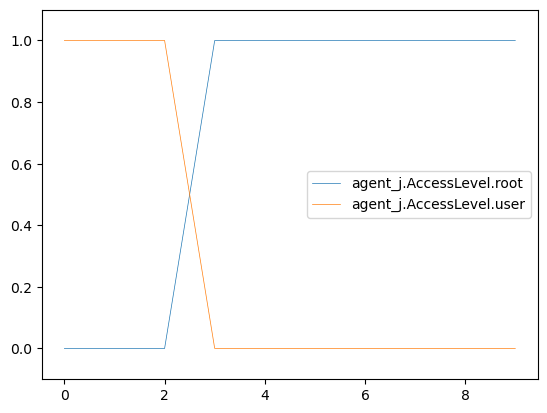

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                        file_enum
2                               1.0                         su_login
3                               1.0                        file_enum
4                               1.0                       file_write
5                               1.0                             none
6                               1.0                             none
7                               1.0                             none
8                               1.0                             none
9                               1.0                             none

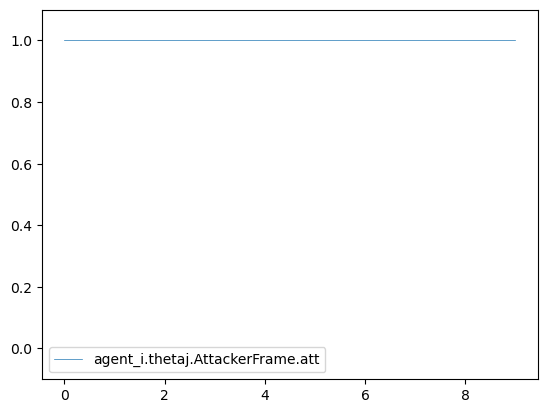

agent_j.thetaj.DefFrame.highCap  agent_j.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.500000                        0.500000   
2                         0.339934                        0.660066   
3                         0.335681                        0.664319   
4                         0.511677                        0.488323   
5                         0.557917                        0.442083   
6                         0.557917                        0.442083   
7                         0.557917                        0.442083   
8                         0.557917                        0.442083   
9                         0.557917                        0.442083   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           failure   
1                   user_files                           success   
2                   user_files                           success   
3                         none                           success   
4                         none                           success   
5                   user_files                           failure   
6                   user_files                           failure   
7                   user_files                           success   
8                         none                           success   
9                   user_files                           success   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                     inactive  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

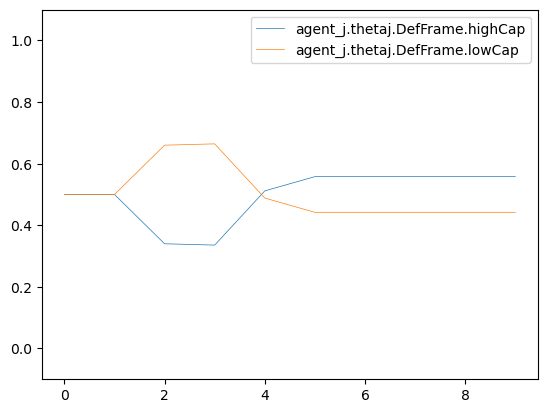

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot    agent_i.action  agent_j.action  
0                      1.0               Nop       FileRecon  
1                      1.0               Nop    EnumAccounts  
2                      1.0  DeployDataDecoys      PrivEscAcc  
3                      1.0               Nop       FileRecon  
4                      1.0               Nop  ManipulateData  
5                      1.0               Nop            Exit  
6                      1.0               Nop             Nop  
7                      1.0               Nop             Nop  
8                      1.0               Nop             Nop  
9                      1.0               Nop             Nop

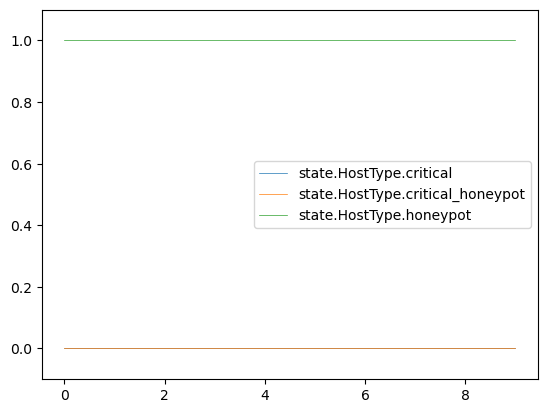

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot    agent_i.action  agent_j.action  \
0                        1.0               Nop       FileRecon   
1                        1.0               Nop    EnumAccounts   
2                        1.0  DeployDataDecoys      PrivEscAcc   
3                        1.0               Nop       FileRecon   
4                        1.0               Nop  ManipulateData   
5                        1.0               Nop            Exit   
6                        1.0               Nop             Nop   
7                        1.0               Nop             Nop   
8                        1.0               Nop             Nop   
9                        1.0               Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                         su_login  
3                        file_enum  
4                       file_write  
5                             none  
6                             none  
7                             none  
8                             none  
9                             none

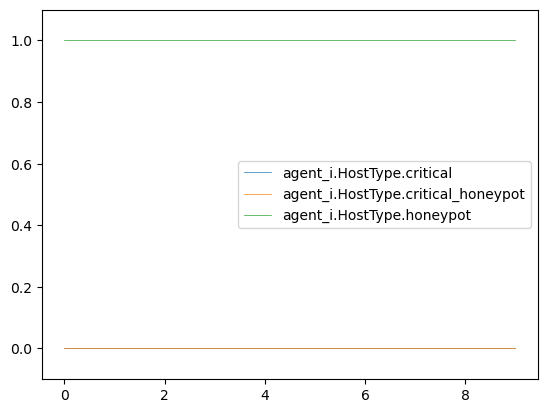

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                   0.500000                                 0.0   
1                   0.500000                                 0.0   
2                   0.339934                                 0.0   
3                   0.335681                                 0.0   
4                   0.244261                                 0.0   
5                   0.221045                                 0.0   
6                   0.221045                                 0.0   
7                   0.221045                                 0.0   
8                   0.221045                                 0.0   
9                   0.221045                                 0.0   

   agent_j.HostType.honeypot  agent_j.action    agent_i.action  \
0                   0.500000       FileRecon               Nop   
1                   0.500000    EnumAccounts               Nop   
2                   0.660066      PrivEscAcc  DeployDataDecoys   
3                   0.664319       FileRecon               Nop   
4                   0.755739  ManipulateData               Nop   
5                   0.778955            Exit               Nop   
6                   0.778955             Nop               Nop   
7                   0.778955             Nop               Nop   
8                   0.778955             Nop               Nop   
9                   0.778955             Nop               Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           failure   
1                   user_files                           success   
2                   user_files                           success   
3                         none                           success   
4                         none                           success   
5                   user_files                           failure   
6                   user_files                           failure   
7                   user_files                           success   
8                         none                           success   
9                   user_files                           success   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                     inactive  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

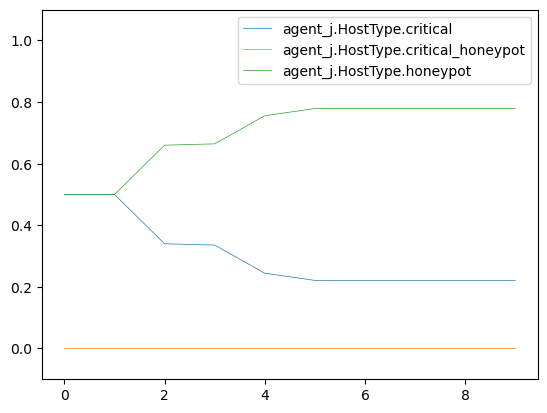

=============AccFound============


state.AccFound.no  state.AccFound.yes    agent_i.action  agent_j.action
0                1.0                 0.0               Nop       FileRecon
1                1.0                 0.0               Nop    EnumAccounts
2                0.0                 1.0  DeployDataDecoys      PrivEscAcc
3                0.0                 1.0               Nop       FileRecon
4                0.0                 1.0               Nop  ManipulateData
5                0.0                 1.0               Nop            Exit
6                0.0                 1.0               Nop             Nop
7                0.0                 1.0               Nop             Nop
8                0.0                 1.0               Nop             Nop
9                0.0                 1.0               Nop             Nop

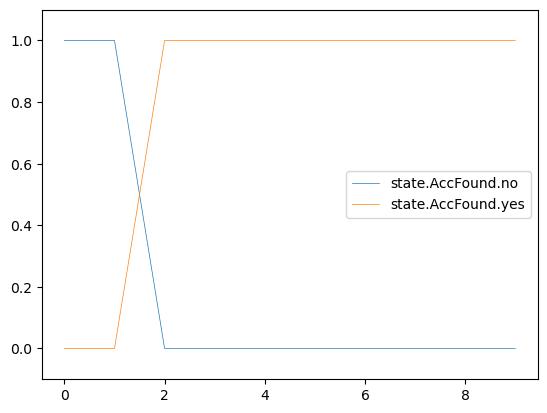

agent_i.AccFound.no  agent_i.AccFound.yes    agent_i.action  \
0             1.000000              0.000000               Nop   
1             1.000000              0.000000               Nop   
2             0.011249              0.988751  DeployDataDecoys   
3             0.010001              0.989999               Nop   
4             0.010000              0.990000               Nop   
5             0.001484              0.998516               Nop   
6             0.001517              0.998483               Nop   
7             0.001518              0.998482               Nop   
8             0.001518              0.998482               Nop   
9             0.001518              0.998482               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

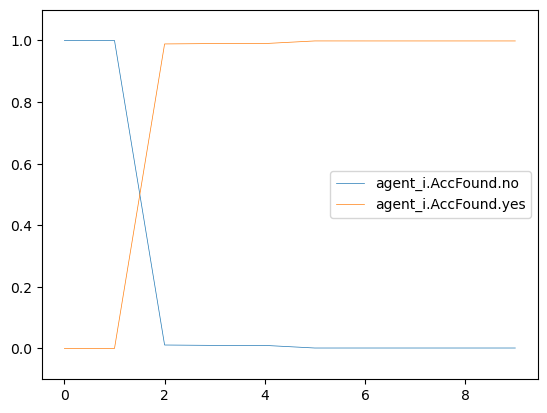

agent_j.AccFound.no  agent_j.AccFound.yes  agent_j.action  \
0             1.000000              0.000000       FileRecon   
1             1.000000              0.000000    EnumAccounts   
2             0.101815              0.898186      PrivEscAcc   
3             0.000113              0.999887       FileRecon   
4             0.000053              0.999947  ManipulateData   
5             0.000037              0.999963            Exit   
6             0.000037              0.999963             Nop   
7             0.000037              0.999963             Nop   
8             0.000037              0.999963             Nop   
9             0.000037              0.999963             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1               Nop                   user_files   
2  DeployDataDecoys                   user_files   
3               Nop                         none   
4               Nop                         none   
5               Nop                   user_files   
6               Nop                   user_files   
7               Nop                   user_files   
8               Nop                         none   
9               Nop                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           success                       active  
4                           success                       active  
5                           failure                     inactive  
6                           failure                     inactive  
7                           success                     inactive  
8                           success                     inactive  
9                           success                     inactive

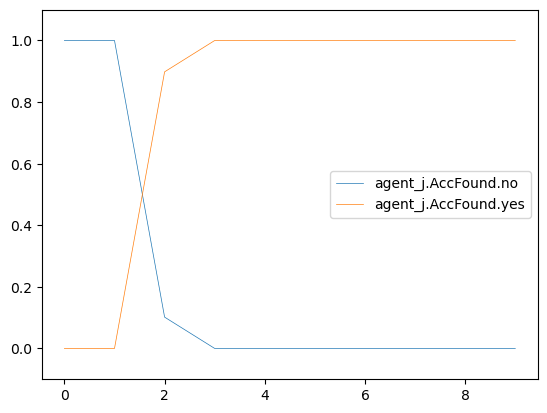

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes    agent_i.action  \
0                    1.0                     0.0               Nop   
1                    1.0                     0.0               Nop   
2                    1.0                     0.0  DeployDataDecoys   
3                    1.0                     0.0               Nop   
4                    1.0                     0.0               Nop   
5                    0.0                     1.0               Nop   
6                    0.0                     1.0               Nop   
7                    0.0                     1.0               Nop   
8                    0.0                     1.0               Nop   
9                    0.0                     1.0               Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

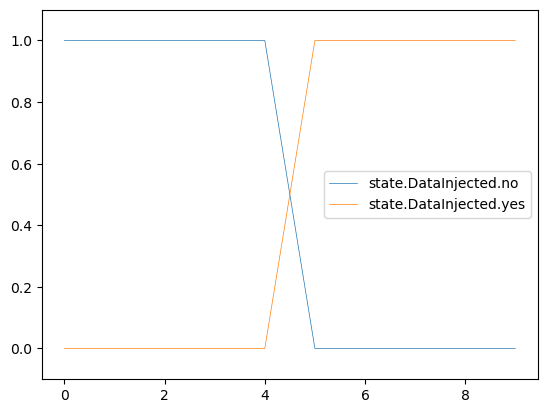

agent_i.DataInjected.no  agent_i.DataInjected.yes    agent_i.action  \
0                 1.000000                  0.000000               Nop   
1                 1.000000                  0.000000               Nop   
2                 1.000000                  0.000000  DeployDataDecoys   
3                 1.000000                  0.000000               Nop   
4                 1.000000                  0.000000               Nop   
5                 0.031978                  0.968023               Nop   
6                 0.001939                  0.998061               Nop   
7                 0.001578                  0.998422               Nop   
8                 0.001577                  0.998423               Nop   
9                 0.001577                  0.998423               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

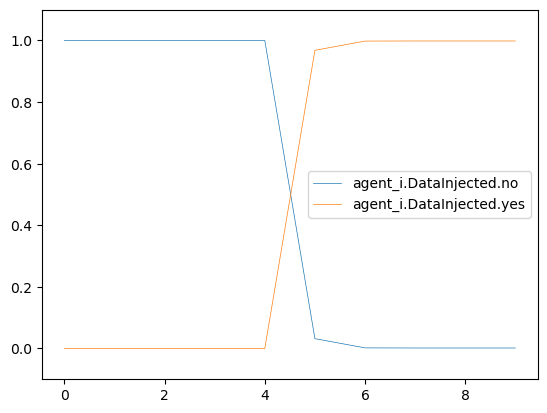

agent_j.DataInjected.no  agent_j.DataInjected.yes  agent_j.action  \
0                  1.00000                   0.00000       FileRecon   
1                  1.00000                   0.00000    EnumAccounts   
2                  1.00000                   0.00000      PrivEscAcc   
3                  1.00000                   0.00000       FileRecon   
4                  1.00000                   0.00000  ManipulateData   
5                  0.00012                   0.99988            Exit   
6                  0.00012                   0.99988             Nop   
7                  0.00012                   0.99988             Nop   
8                  0.00012                   0.99988             Nop   
9                  0.00012                   0.99988             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1               Nop                   user_files   
2  DeployDataDecoys                   user_files   
3               Nop                         none   
4               Nop                         none   
5               Nop                   user_files   
6               Nop                   user_files   
7               Nop                   user_files   
8               Nop                         none   
9               Nop                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           success                       active  
4                           success                       active  
5                           failure                     inactive  
6                           failure                     inactive  
7                           success                     inactive  
8                           success                     inactive  
9                           success                     inactive

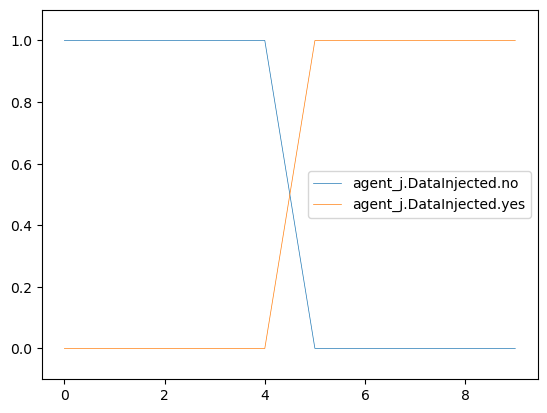

=============AttActive============


state.AttActive.no  state.AttActive.yes    agent_i.action  agent_j.action
0                 0.0                  1.0               Nop       FileRecon
1                 0.0                  1.0               Nop    EnumAccounts
2                 0.0                  1.0  DeployDataDecoys      PrivEscAcc
3                 0.0                  1.0               Nop       FileRecon
4                 0.0                  1.0               Nop  ManipulateData
5                 0.0                  1.0               Nop            Exit
6                 1.0                  0.0               Nop             Nop
7                 1.0                  0.0               Nop             Nop
8                 1.0                  0.0               Nop             Nop
9                 1.0                  0.0               Nop             Nop

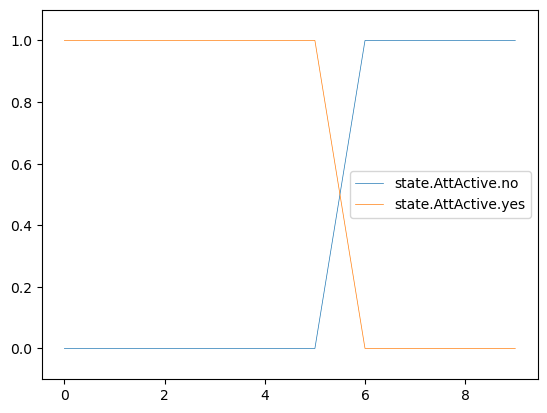

agent_i.AttActive.no  agent_i.AttActive.yes    agent_i.action  \
0          5.000000e-01           5.000000e-01               Nop   
1          1.020408e-02           9.897959e-01               Nop   
2          1.179412e-04           9.998820e-01  DeployDataDecoys   
3          1.229218e-06           9.999988e-01               Nop   
4          1.267250e-08           1.000000e+00               Nop   
5          3.548452e-09           1.000000e+00               Nop   
6          9.995843e-01           4.157135e-04               Nop   
7          9.999952e-01           4.821795e-06               Nop   
8          1.000000e+00           1.216952e-08               Nop   
9          9.999999e-01           2.676874e-17               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

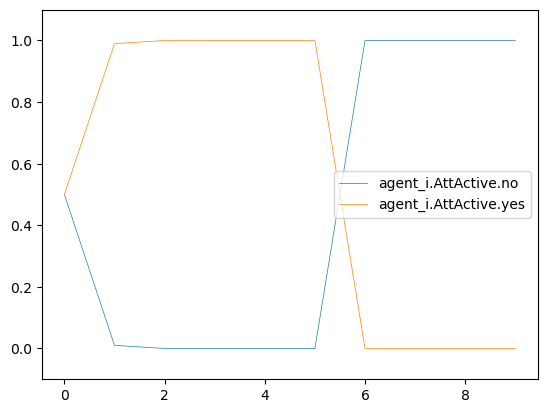

agent_j.AttActive.no  agent_j.AttActive.yes  agent_j.action  \
0                   0.0                    1.0       FileRecon   
1                   0.0                    1.0    EnumAccounts   
2                   0.0                    1.0      PrivEscAcc   
3                   0.0                    1.0       FileRecon   
4                   0.0                    1.0  ManipulateData   
5                   0.0                    1.0            Exit   
6                   1.0                    0.0             Nop   
7                   1.0                    0.0             Nop   
8                   1.0                    0.0             Nop   
9                   1.0                    0.0             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1               Nop                   user_files   
2  DeployDataDecoys                   user_files   
3               Nop                         none   
4               Nop                         none   
5               Nop                   user_files   
6               Nop                   user_files   
7               Nop                   user_files   
8               Nop                         none   
9               Nop                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           success                       active  
4                           success                       active  
5                           failure                     inactive  
6                           failure                     inactive  
7                           success                     inactive  
8                           success                     inactive  
9                           success                     inactive

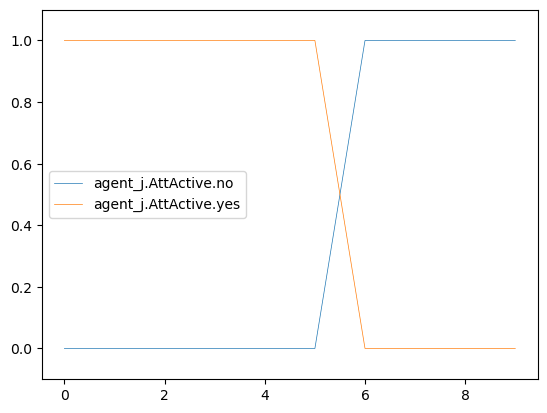

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes    agent_i.action  \
0                   0.0                    1.0               Nop   
1                   0.0                    1.0               Nop   
2                   0.0                    1.0  DeployDataDecoys   
3                   0.0                    1.0               Nop   
4                   0.0                    1.0               Nop   
5                   0.0                    1.0               Nop   
6                   0.0                    1.0               Nop   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

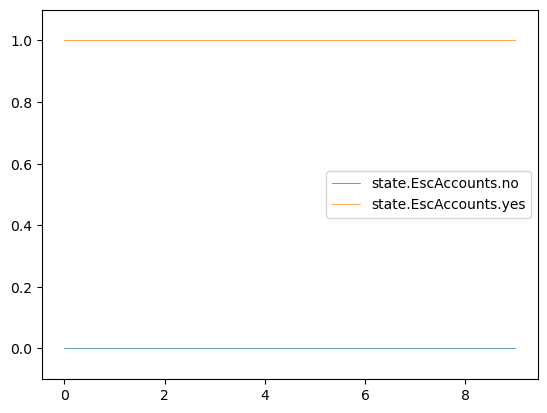

agent_i.EscAccounts.no  agent_i.EscAccounts.yes    agent_i.action  \
0                     0.0                      1.0               Nop   
1                     0.0                      1.0               Nop   
2                     0.0                      1.0  DeployDataDecoys   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

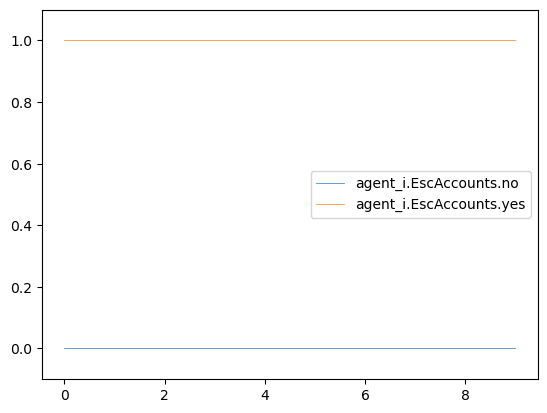

agent_j.EscAccounts.no  agent_j.EscAccounts.yes  agent_j.action  \
0                0.500000                 0.500000       FileRecon   
1                0.500000                 0.500000    EnumAccounts   
2                0.100806                 0.899194      PrivEscAcc   
3                0.000112                 0.999888       FileRecon   
4                0.000052                 0.999948  ManipulateData   
5                0.000037                 0.999963            Exit   
6                0.000037                 0.999963             Nop   
7                0.000037                 0.999963             Nop   
8                0.000037                 0.999963             Nop   
9                0.000037                 0.999963             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1               Nop                   user_files   
2  DeployDataDecoys                   user_files   
3               Nop                         none   
4               Nop                         none   
5               Nop                   user_files   
6               Nop                   user_files   
7               Nop                   user_files   
8               Nop                         none   
9               Nop                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           success                       active  
4                           success                       active  
5                           failure                     inactive  
6                           failure                     inactive  
7                           success                     inactive  
8                           success                     inactive  
9                           success                     inactive

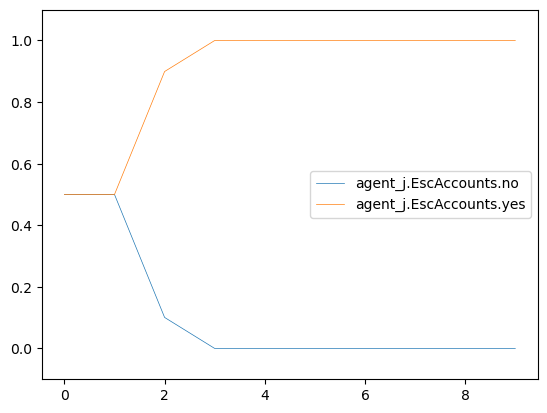

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user    agent_i.action  \
0                   1.0                   0.0               Nop   
1                   1.0                   0.0               Nop   
2                   1.0                   0.0  DeployDataDecoys   
3                   1.0                   0.0               Nop   
4                   1.0                   0.0               Nop   
5                   1.0                   0.0               Nop   
6                   1.0                   0.0               Nop   
7                   1.0                   0.0               Nop   
8                   1.0                   0.0               Nop   
9                   1.0                   0.0               Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

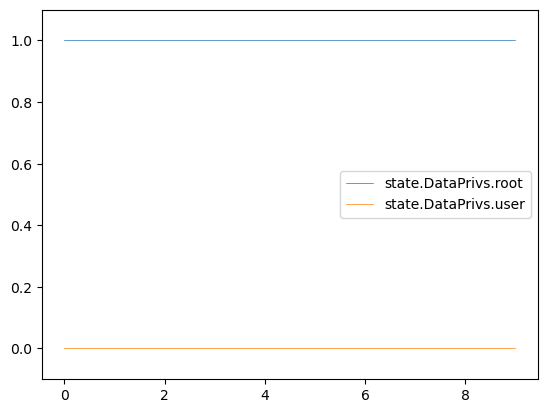

agent_i.DataPrivs.root  agent_i.DataPrivs.user    agent_i.action  \
0                     1.0                     0.0               Nop   
1                     1.0                     0.0               Nop   
2                     1.0                     0.0  DeployDataDecoys   
3                     1.0                     0.0               Nop   
4                     1.0                     0.0               Nop   
5                     1.0                     0.0               Nop   
6                     1.0                     0.0               Nop   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

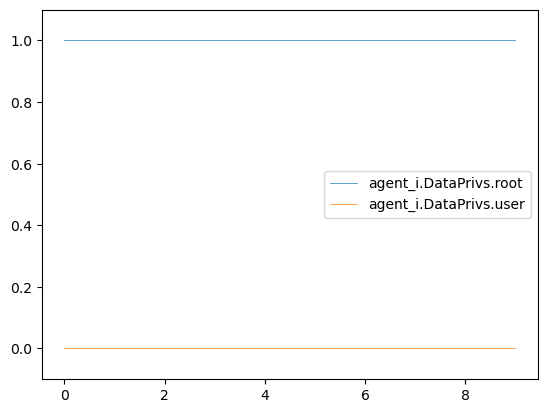

agent_j.DataPrivs.root  agent_j.DataPrivs.user  agent_j.action  \
0                0.500000                0.500000       FileRecon   
1                0.608108                0.391892    EnumAccounts   
2                0.608108                0.391892      PrivEscAcc   
3                0.608108                0.391892       FileRecon   
4                0.660546                0.339454  ManipulateData   
5                0.674153                0.325847            Exit   
6                0.674153                0.325847             Nop   
7                0.674153                0.325847             Nop   
8                0.674153                0.325847             Nop   
9                0.674153                0.325847             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1               Nop                   user_files   
2  DeployDataDecoys                   user_files   
3               Nop                         none   
4               Nop                         none   
5               Nop                   user_files   
6               Nop                   user_files   
7               Nop                   user_files   
8               Nop                         none   
9               Nop                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           success                       active  
4                           success                       active  
5                           failure                     inactive  
6                           failure                     inactive  
7                           success                     inactive  
8                           success                     inactive  
9                           success                     inactive

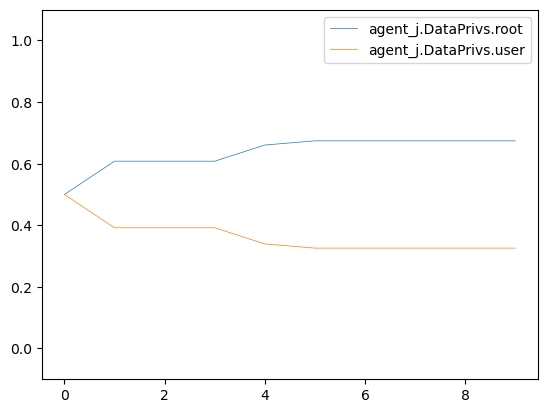

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes    agent_i.action  \
0                   1.0                    0.0               Nop   
1                   1.0                    0.0               Nop   
2                   1.0                    0.0  DeployDataDecoys   
3                   0.0                    1.0               Nop   
4                   0.0                    1.0               Nop   
5                   0.0                    1.0               Nop   
6                   0.0                    1.0               Nop   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

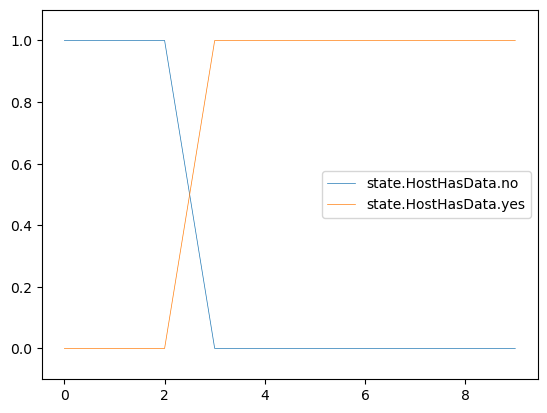

agent_i.HostHasData.no  agent_i.HostHasData.yes    agent_i.action  \
0                     1.0                      0.0               Nop   
1                     1.0                      0.0               Nop   
2                     1.0                      0.0  DeployDataDecoys   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

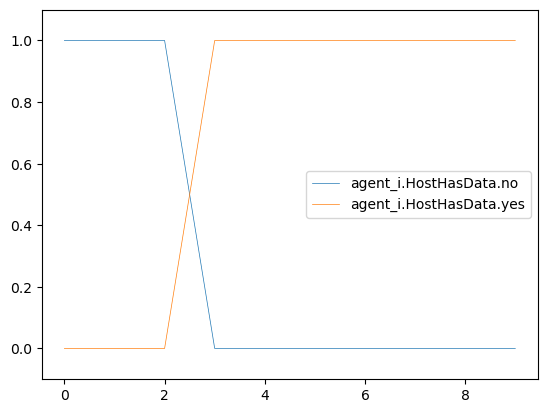

agent_j.HostHasData.no  agent_j.HostHasData.yes  agent_j.action  \
0                0.500000                 0.500000       FileRecon   
1                0.608108                 0.391892    EnumAccounts   
2                0.608108                 0.391892      PrivEscAcc   
3                0.406240                 0.593760       FileRecon   
4                0.083640                 0.916360  ManipulateData   
5                0.000094                 0.999906            Exit   
6                0.000094                 0.999906             Nop   
7                0.000094                 0.999906             Nop   
8                0.000094                 0.999906             Nop   
9                0.000094                 0.999906             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1               Nop                   user_files   
2  DeployDataDecoys                   user_files   
3               Nop                         none   
4               Nop                         none   
5               Nop                   user_files   
6               Nop                   user_files   
7               Nop                   user_files   
8               Nop                         none   
9               Nop                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           success                       active  
4                           success                       active  
5                           failure                     inactive  
6                           failure                     inactive  
7                           success                     inactive  
8                           success                     inactive  
9                           success                     inactive

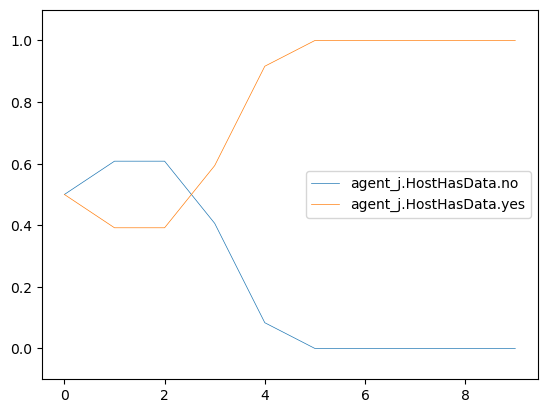

=============DataFound============


state.DataFound.no  state.DataFound.yes    agent_i.action  agent_j.action
0                 1.0                  0.0               Nop       FileRecon
1                 1.0                  0.0               Nop    EnumAccounts
2                 1.0                  0.0  DeployDataDecoys      PrivEscAcc
3                 1.0                  0.0               Nop       FileRecon
4                 0.0                  1.0               Nop  ManipulateData
5                 0.0                  1.0               Nop            Exit
6                 0.0                  1.0               Nop             Nop
7                 0.0                  1.0               Nop             Nop
8                 0.0                  1.0               Nop             Nop
9                 0.0                  1.0               Nop             Nop

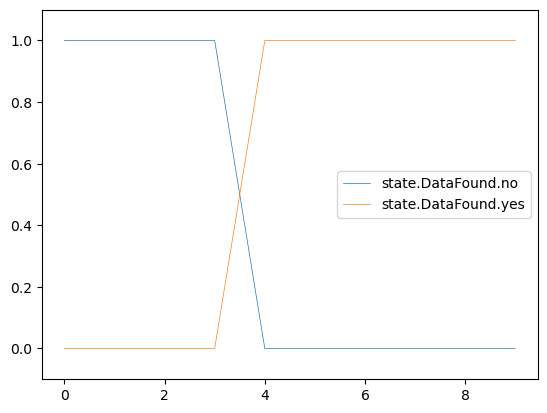

agent_i.DataFound.no  agent_i.DataFound.yes    agent_i.action  \
0              1.000000               0.000000               Nop   
1              1.000000               0.000000               Nop   
2              1.000000               0.000000  DeployDataDecoys   
3              1.000000               0.000000               Nop   
4              0.208001               0.791999               Nop   
5              0.028873               0.971127               Nop   
6              0.001646               0.998354               Nop   
7              0.001576               0.998424               Nop   
8              0.001576               0.998424               Nop   
9              0.001576               0.998424               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

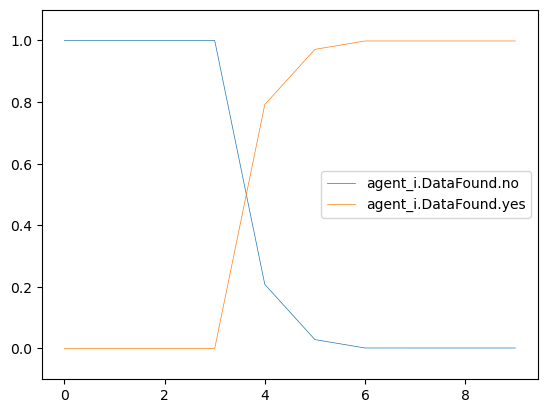

agent_j.DataFound.no  agent_j.DataFound.yes  agent_j.action  \
0              1.000000               0.000000       FileRecon   
1              0.972973               0.027027    EnumAccounts   
2              0.972973               0.027027      PrivEscAcc   
3              0.972973               0.027027       FileRecon   
4              0.107083               0.892917  ManipulateData   
5              0.000120               0.999880            Exit   
6              0.000120               0.999880             Nop   
7              0.000120               0.999880             Nop   
8              0.000120               0.999880             Nop   
9              0.000120               0.999880             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1               Nop                   user_files   
2  DeployDataDecoys                   user_files   
3               Nop                         none   
4               Nop                         none   
5               Nop                   user_files   
6               Nop                   user_files   
7               Nop                   user_files   
8               Nop                         none   
9               Nop                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           success                       active  
4                           success                       active  
5                           failure                     inactive  
6                           failure                     inactive  
7                           success                     inactive  
8                           success                     inactive  
9                           success                     inactive

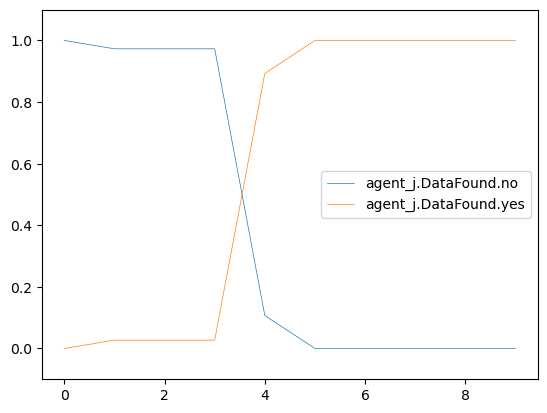

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user    agent_i.action  \
0                     0.0                     1.0               Nop   
1                     0.0                     1.0               Nop   
2                     0.0                     1.0  DeployDataDecoys   
3                     1.0                     0.0               Nop   
4                     1.0                     0.0               Nop   
5                     1.0                     0.0               Nop   
6                     1.0                     0.0               Nop   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

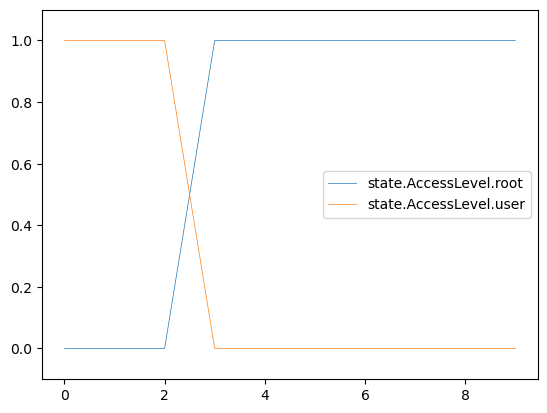

agent_i.AccessLevel.root  agent_i.AccessLevel.user    agent_i.action  \
0                  0.000000                  1.000000               Nop   
1                  0.000000                  1.000000               Nop   
2                  0.000000                  1.000000  DeployDataDecoys   
3                  0.989987                  0.010013               Nop   
4                  0.989999                  0.010001               Nop   
5                  0.998516                  0.001484               Nop   
6                  0.998483                  0.001517               Nop   
7                  0.998482                  0.001518               Nop   
8                  0.998482                  0.001518               Nop   
9                  0.998482                  0.001518               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

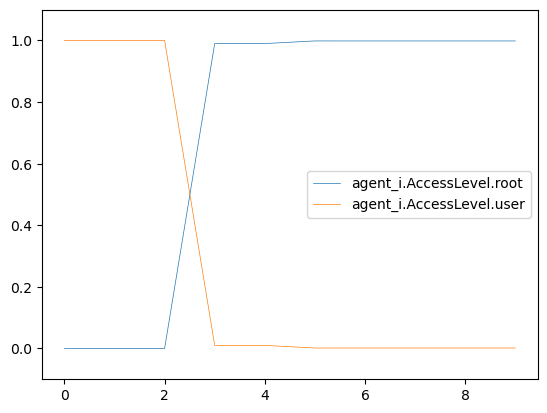

agent_j.AccessLevel.root  agent_j.AccessLevel.user  agent_j.action  \
0                  0.000000                  1.000000       FileRecon   
1                  0.000000                  1.000000    EnumAccounts   
2                  0.000000                  1.000000      PrivEscAcc   
3                  0.999887                  0.000113       FileRecon   
4                  0.999947                  0.000053  ManipulateData   
5                  0.999963                  0.000037            Exit   
6                  0.999963                  0.000037             Nop   
7                  0.999963                  0.000037             Nop   
8                  0.999963                  0.000037             Nop   
9                  0.999963                  0.000037             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1               Nop                   user_files   
2  DeployDataDecoys                   user_files   
3               Nop                         none   
4               Nop                         none   
5               Nop                   user_files   
6               Nop                   user_files   
7               Nop                   user_files   
8               Nop                         none   
9               Nop                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           success                       active  
4                           success                       active  
5                           failure                     inactive  
6                           failure                     inactive  
7                           success                     inactive  
8                           success                     inactive  
9                           success                     inactive

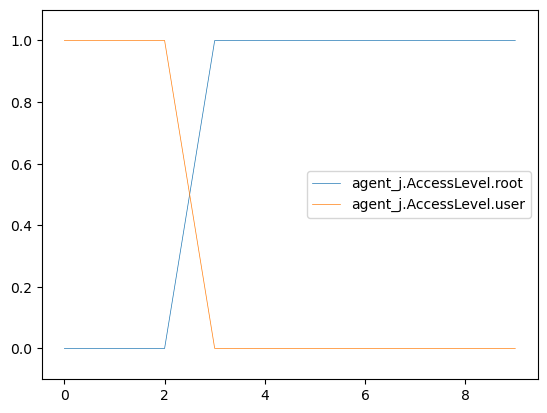

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                        file_enum
2                               1.0                         su_login
3                               1.0                        file_enum
4                               1.0                       file_write
5                               1.0                             none
6                               1.0                             none
7                               1.0                             none
8                               1.0                         su_login
9                               1.0                             none

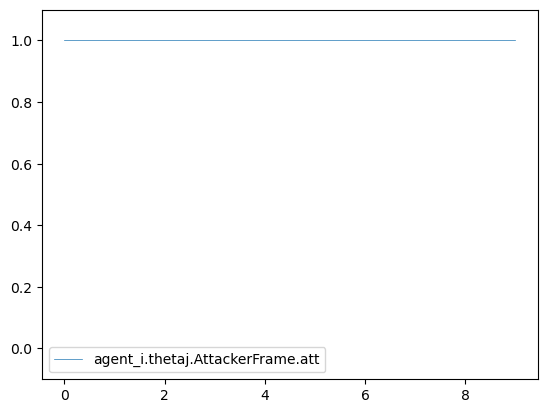

agent_j.thetaj.DefFrame.highCap  agent_j.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.500000                        0.500000   
2                         0.339934                        0.660066   
3                         0.335681                        0.664319   
4                         0.511677                        0.488323   
5                         0.557917                        0.442083   
6                         0.557917                        0.442083   
7                         0.557917                        0.442083   
8                         0.557917                        0.442083   
9                         0.557917                        0.442083   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           failure   
1                         none                           success   
2                   user_files                           success   
3                         none                           success   
4                         none                           success   
5                         none                           success   
6                   user_files                           success   
7                   user_files                           failure   
8                   user_files                           success   
9                         none                           failure   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                     inactive  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

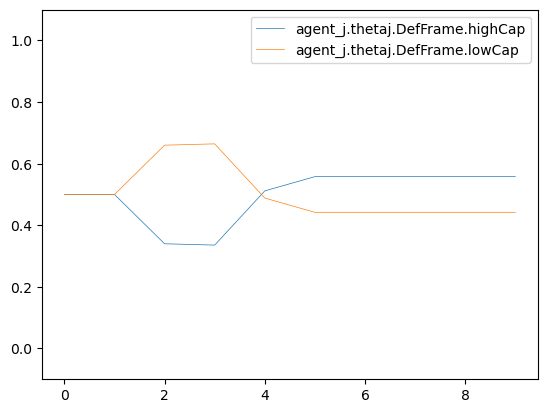

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot    agent_i.action  agent_j.action  
0                      1.0               Nop       FileRecon  
1                      1.0               Nop    EnumAccounts  
2                      1.0  DeployDataDecoys      PrivEscAcc  
3                      1.0               Nop       FileRecon  
4                      1.0               Nop  ManipulateData  
5                      1.0               Nop            Exit  
6                      1.0               Nop             Nop  
7                      1.0               Nop             Nop  
8                      1.0               Nop             Nop  
9                      1.0               Nop             Nop

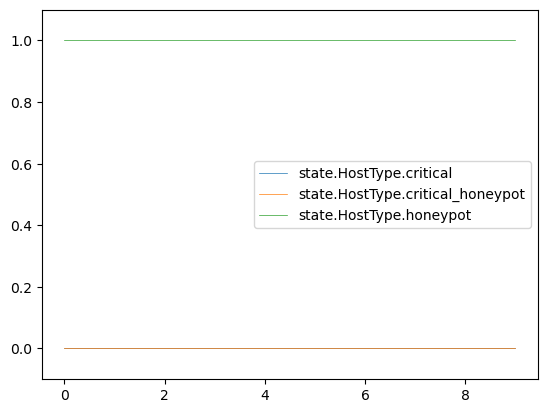

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot    agent_i.action  agent_j.action  \
0                        1.0               Nop       FileRecon   
1                        1.0               Nop    EnumAccounts   
2                        1.0  DeployDataDecoys      PrivEscAcc   
3                        1.0               Nop       FileRecon   
4                        1.0               Nop  ManipulateData   
5                        1.0               Nop            Exit   
6                        1.0               Nop             Nop   
7                        1.0               Nop             Nop   
8                        1.0               Nop             Nop   
9                        1.0               Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                         su_login  
3                        file_enum  
4                       file_write  
5                             none  
6                             none  
7                             none  
8                         su_login  
9                             none

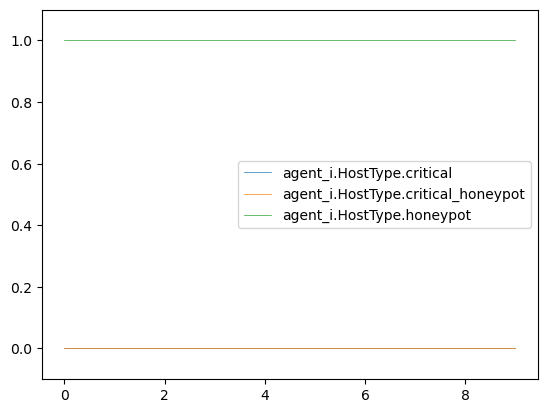

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                   0.500000                                 0.0   
1                   0.500000                                 0.0   
2                   0.339934                                 0.0   
3                   0.335681                                 0.0   
4                   0.244261                                 0.0   
5                   0.221045                                 0.0   
6                   0.221045                                 0.0   
7                   0.221045                                 0.0   
8                   0.221045                                 0.0   
9                   0.221045                                 0.0   

   agent_j.HostType.honeypot  agent_j.action    agent_i.action  \
0                   0.500000       FileRecon               Nop   
1                   0.500000    EnumAccounts               Nop   
2                   0.660066      PrivEscAcc  DeployDataDecoys   
3                   0.664319       FileRecon               Nop   
4                   0.755739  ManipulateData               Nop   
5                   0.778955            Exit               Nop   
6                   0.778955             Nop               Nop   
7                   0.778955             Nop               Nop   
8                   0.778955             Nop               Nop   
9                   0.778955             Nop               Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           failure   
1                         none                           success   
2                   user_files                           success   
3                         none                           success   
4                         none                           success   
5                         none                           success   
6                   user_files                           success   
7                   user_files                           failure   
8                   user_files                           success   
9                         none                           failure   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                     inactive  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

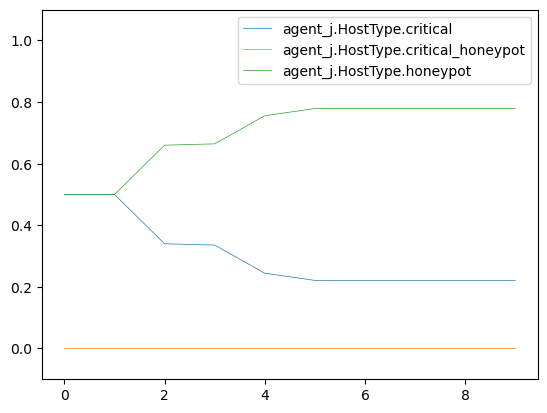

=============AccFound============


state.AccFound.no  state.AccFound.yes    agent_i.action  agent_j.action
0                1.0                 0.0               Nop       FileRecon
1                1.0                 0.0               Nop    EnumAccounts
2                0.0                 1.0  DeployDataDecoys      PrivEscAcc
3                0.0                 1.0               Nop       FileRecon
4                0.0                 1.0               Nop  ManipulateData
5                0.0                 1.0               Nop            Exit
6                0.0                 1.0               Nop             Nop
7                0.0                 1.0               Nop             Nop
8                0.0                 1.0               Nop             Nop
9                0.0                 1.0               Nop             Nop

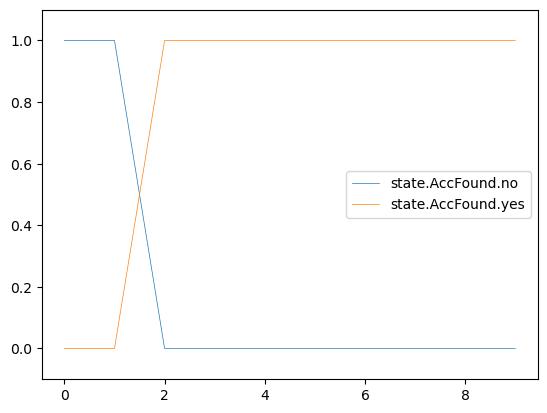

agent_i.AccFound.no  agent_i.AccFound.yes    agent_i.action  \
0             1.000000              0.000000               Nop   
1             1.000000              0.000000               Nop   
2             0.011249              0.988751  DeployDataDecoys   
3             0.010001              0.989999               Nop   
4             0.010000              0.990000               Nop   
5             0.001484              0.998516               Nop   
6             0.001517              0.998483               Nop   
7             0.001518              0.998482               Nop   
8             0.001518              0.998482               Nop   
9             0.001518              0.998482               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                         su_login  
9             Nop                             none

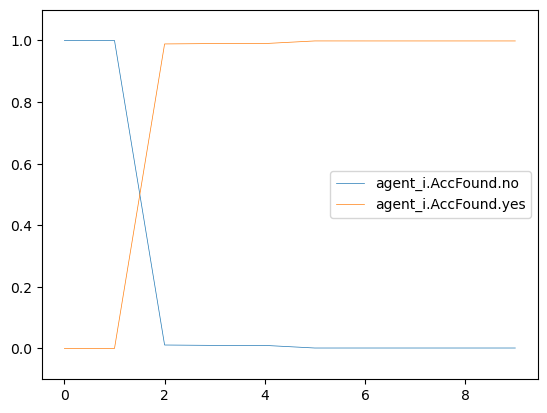

agent_j.AccFound.no  agent_j.AccFound.yes  agent_j.action  \
0             1.000000              0.000000       FileRecon   
1             1.000000              0.000000    EnumAccounts   
2             0.101815              0.898186      PrivEscAcc   
3             0.000113              0.999887       FileRecon   
4             0.000053              0.999947  ManipulateData   
5             0.000037              0.999963            Exit   
6             0.000037              0.999963             Nop   
7             0.000037              0.999963             Nop   
8             0.000037              0.999963             Nop   
9             0.000037              0.999963             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                   user_files   
1               Nop                         none   
2  DeployDataDecoys                   user_files   
3               Nop                         none   
4               Nop                         none   
5               Nop                         none   
6               Nop                   user_files   
7               Nop                   user_files   
8               Nop                   user_files   
9               Nop                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           success                       active  
4                           success                       active  
5                           success                     inactive  
6                           success                     inactive  
7                           failure                     inactive  
8                           success                     inactive  
9                           failure                     inactive

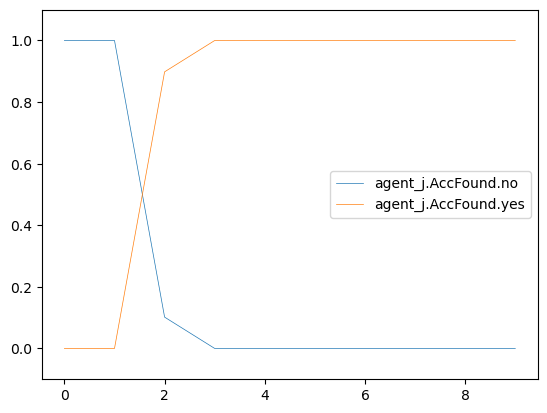

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes    agent_i.action  \
0                    1.0                     0.0               Nop   
1                    1.0                     0.0               Nop   
2                    1.0                     0.0  DeployDataDecoys   
3                    1.0                     0.0               Nop   
4                    1.0                     0.0               Nop   
5                    0.0                     1.0               Nop   
6                    0.0                     1.0               Nop   
7                    0.0                     1.0               Nop   
8                    0.0                     1.0               Nop   
9                    0.0                     1.0               Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

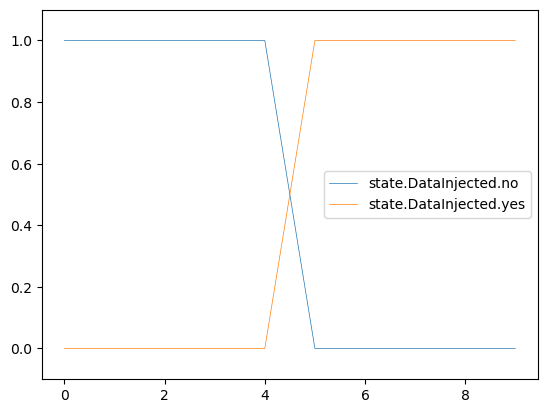

agent_i.DataInjected.no  agent_i.DataInjected.yes    agent_i.action  \
0                 1.000000                  0.000000               Nop   
1                 1.000000                  0.000000               Nop   
2                 1.000000                  0.000000  DeployDataDecoys   
3                 1.000000                  0.000000               Nop   
4                 1.000000                  0.000000               Nop   
5                 0.031978                  0.968023               Nop   
6                 0.001939                  0.998061               Nop   
7                 0.001578                  0.998422               Nop   
8                 0.001577                  0.998423               Nop   
9                 0.001577                  0.998423               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                         su_login  
9             Nop                             none

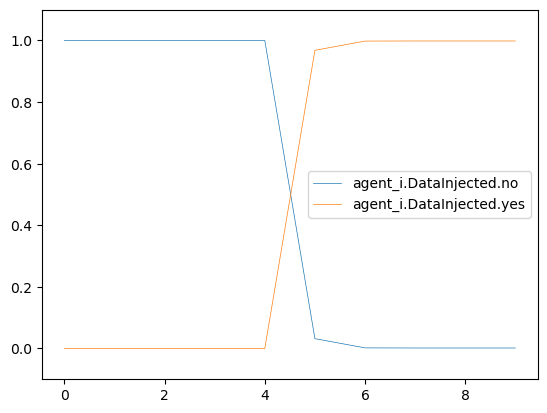

agent_j.DataInjected.no  agent_j.DataInjected.yes  agent_j.action  \
0                  1.00000                   0.00000       FileRecon   
1                  1.00000                   0.00000    EnumAccounts   
2                  1.00000                   0.00000      PrivEscAcc   
3                  1.00000                   0.00000       FileRecon   
4                  1.00000                   0.00000  ManipulateData   
5                  0.00012                   0.99988            Exit   
6                  0.00012                   0.99988             Nop   
7                  0.00012                   0.99988             Nop   
8                  0.00012                   0.99988             Nop   
9                  0.00012                   0.99988             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                   user_files   
1               Nop                         none   
2  DeployDataDecoys                   user_files   
3               Nop                         none   
4               Nop                         none   
5               Nop                         none   
6               Nop                   user_files   
7               Nop                   user_files   
8               Nop                   user_files   
9               Nop                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           success                       active  
4                           success                       active  
5                           success                     inactive  
6                           success                     inactive  
7                           failure                     inactive  
8                           success                     inactive  
9                           failure                     inactive

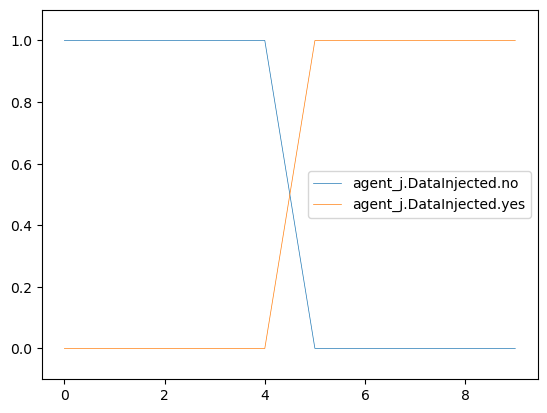

=============AttActive============


state.AttActive.no  state.AttActive.yes    agent_i.action  agent_j.action
0                 0.0                  1.0               Nop       FileRecon
1                 0.0                  1.0               Nop    EnumAccounts
2                 0.0                  1.0  DeployDataDecoys      PrivEscAcc
3                 0.0                  1.0               Nop       FileRecon
4                 0.0                  1.0               Nop  ManipulateData
5                 0.0                  1.0               Nop            Exit
6                 1.0                  0.0               Nop             Nop
7                 1.0                  0.0               Nop             Nop
8                 1.0                  0.0               Nop             Nop
9                 1.0                  0.0               Nop             Nop

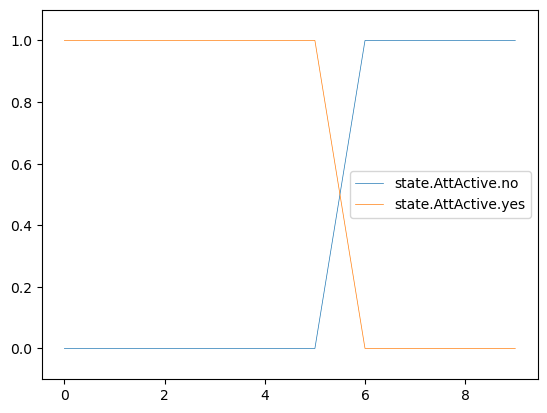

agent_i.AttActive.no  agent_i.AttActive.yes    agent_i.action  \
0          5.000000e-01           5.000000e-01               Nop   
1          1.020408e-02           9.897959e-01               Nop   
2          1.179412e-04           9.998820e-01  DeployDataDecoys   
3          1.229218e-06           9.999988e-01               Nop   
4          1.267250e-08           1.000000e+00               Nop   
5          3.548452e-09           1.000000e+00               Nop   
6          9.995843e-01           4.157135e-04               Nop   
7          9.999952e-01           4.821795e-06               Nop   
8          1.000000e+00           1.216952e-08               Nop   
9          1.000000e+00           2.087961e-15               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                         su_login  
9             Nop                             none

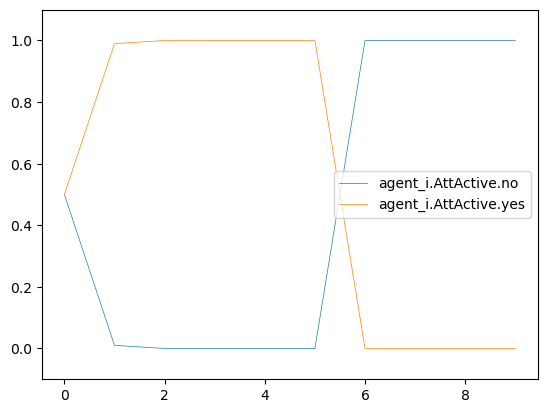

agent_j.AttActive.no  agent_j.AttActive.yes  agent_j.action  \
0                   0.0                    1.0       FileRecon   
1                   0.0                    1.0    EnumAccounts   
2                   0.0                    1.0      PrivEscAcc   
3                   0.0                    1.0       FileRecon   
4                   0.0                    1.0  ManipulateData   
5                   0.0                    1.0            Exit   
6                   1.0                    0.0             Nop   
7                   1.0                    0.0             Nop   
8                   1.0                    0.0             Nop   
9                   1.0                    0.0             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                   user_files   
1               Nop                         none   
2  DeployDataDecoys                   user_files   
3               Nop                         none   
4               Nop                         none   
5               Nop                         none   
6               Nop                   user_files   
7               Nop                   user_files   
8               Nop                   user_files   
9               Nop                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           success                       active  
4                           success                       active  
5                           success                     inactive  
6                           success                     inactive  
7                           failure                     inactive  
8                           success                     inactive  
9                           failure                     inactive

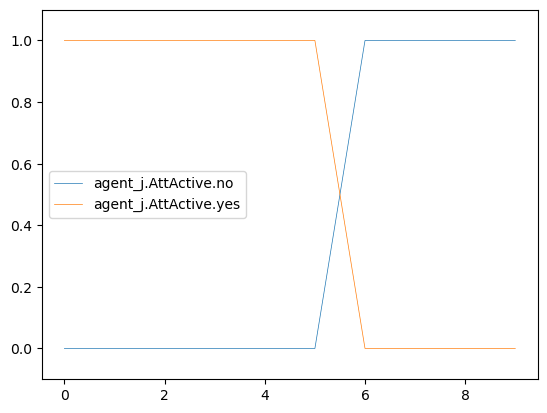

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes    agent_i.action  \
0                   0.0                    1.0               Nop   
1                   0.0                    1.0               Nop   
2                   0.0                    1.0  DeployDataDecoys   
3                   0.0                    1.0               Nop   
4                   0.0                    1.0               Nop   
5                   0.0                    1.0               Nop   
6                   0.0                    1.0               Nop   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

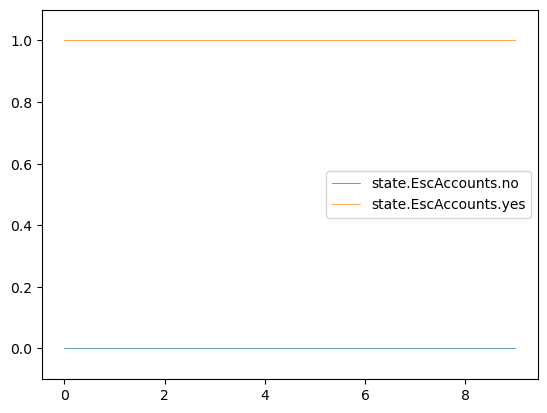

agent_i.EscAccounts.no  agent_i.EscAccounts.yes    agent_i.action  \
0                     0.0                      1.0               Nop   
1                     0.0                      1.0               Nop   
2                     0.0                      1.0  DeployDataDecoys   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                         su_login  
9             Nop                             none

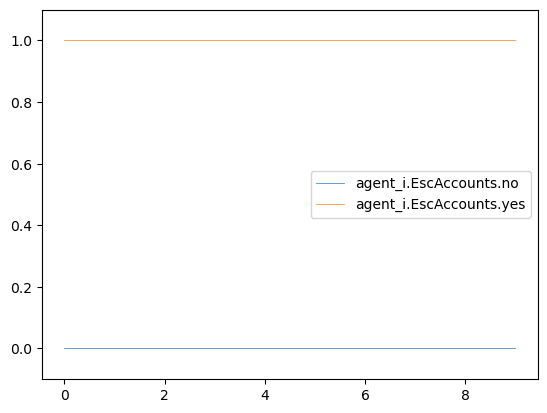

agent_j.EscAccounts.no  agent_j.EscAccounts.yes  agent_j.action  \
0                0.500000                 0.500000       FileRecon   
1                0.500000                 0.500000    EnumAccounts   
2                0.100806                 0.899194      PrivEscAcc   
3                0.000112                 0.999888       FileRecon   
4                0.000052                 0.999948  ManipulateData   
5                0.000037                 0.999963            Exit   
6                0.000037                 0.999963             Nop   
7                0.000037                 0.999963             Nop   
8                0.000037                 0.999963             Nop   
9                0.000037                 0.999963             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                   user_files   
1               Nop                         none   
2  DeployDataDecoys                   user_files   
3               Nop                         none   
4               Nop                         none   
5               Nop                         none   
6               Nop                   user_files   
7               Nop                   user_files   
8               Nop                   user_files   
9               Nop                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           success                       active  
4                           success                       active  
5                           success                     inactive  
6                           success                     inactive  
7                           failure                     inactive  
8                           success                     inactive  
9                           failure                     inactive

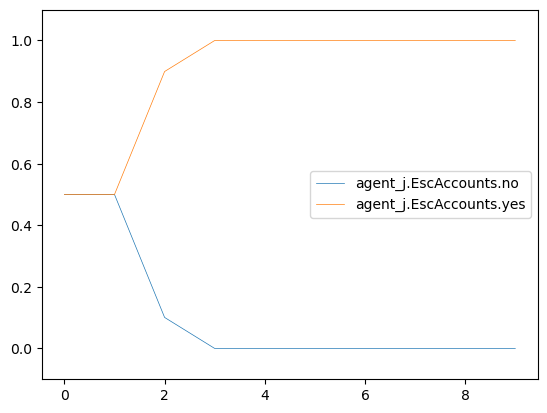

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user    agent_i.action  \
0                   1.0                   0.0               Nop   
1                   1.0                   0.0               Nop   
2                   1.0                   0.0  DeployDataDecoys   
3                   1.0                   0.0               Nop   
4                   1.0                   0.0               Nop   
5                   1.0                   0.0               Nop   
6                   1.0                   0.0               Nop   
7                   1.0                   0.0               Nop   
8                   1.0                   0.0               Nop   
9                   1.0                   0.0               Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

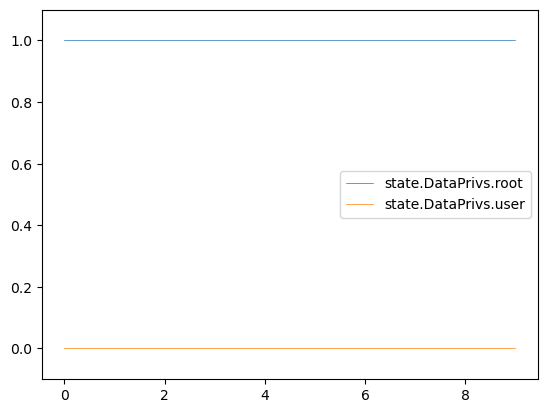

agent_i.DataPrivs.root  agent_i.DataPrivs.user    agent_i.action  \
0                     1.0                     0.0               Nop   
1                     1.0                     0.0               Nop   
2                     1.0                     0.0  DeployDataDecoys   
3                     1.0                     0.0               Nop   
4                     1.0                     0.0               Nop   
5                     1.0                     0.0               Nop   
6                     1.0                     0.0               Nop   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                         su_login  
9             Nop                             none

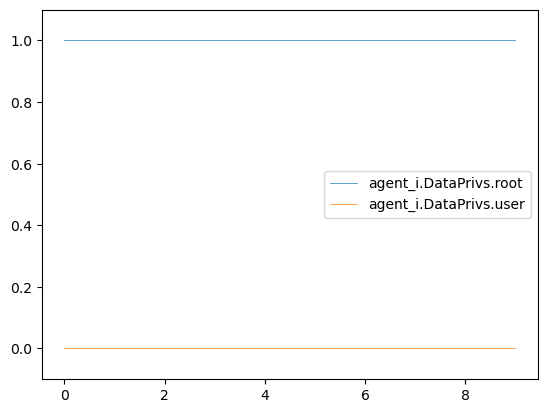

agent_j.DataPrivs.root  agent_j.DataPrivs.user  agent_j.action  \
0                0.500000                0.500000       FileRecon   
1                0.608108                0.391892    EnumAccounts   
2                0.608108                0.391892      PrivEscAcc   
3                0.608108                0.391892       FileRecon   
4                0.660546                0.339454  ManipulateData   
5                0.674153                0.325847            Exit   
6                0.674153                0.325847             Nop   
7                0.674153                0.325847             Nop   
8                0.674153                0.325847             Nop   
9                0.674153                0.325847             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                   user_files   
1               Nop                         none   
2  DeployDataDecoys                   user_files   
3               Nop                         none   
4               Nop                         none   
5               Nop                         none   
6               Nop                   user_files   
7               Nop                   user_files   
8               Nop                   user_files   
9               Nop                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           success                       active  
4                           success                       active  
5                           success                     inactive  
6                           success                     inactive  
7                           failure                     inactive  
8                           success                     inactive  
9                           failure                     inactive

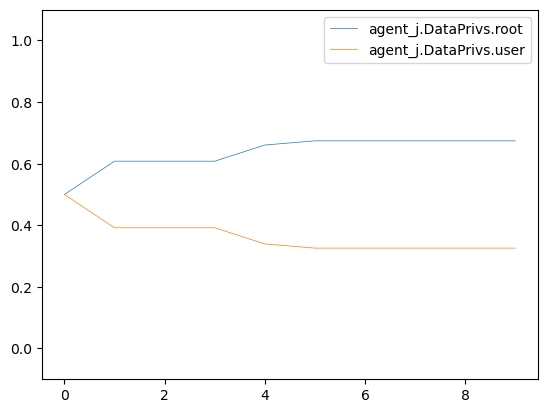

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes    agent_i.action  \
0                   1.0                    0.0               Nop   
1                   1.0                    0.0               Nop   
2                   1.0                    0.0  DeployDataDecoys   
3                   0.0                    1.0               Nop   
4                   0.0                    1.0               Nop   
5                   0.0                    1.0               Nop   
6                   0.0                    1.0               Nop   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

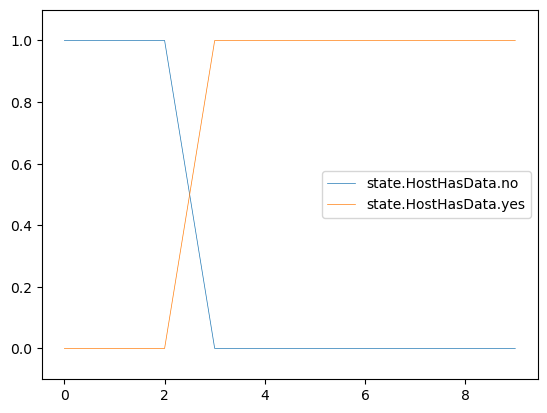

agent_i.HostHasData.no  agent_i.HostHasData.yes    agent_i.action  \
0                     1.0                      0.0               Nop   
1                     1.0                      0.0               Nop   
2                     1.0                      0.0  DeployDataDecoys   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                         su_login  
9             Nop                             none

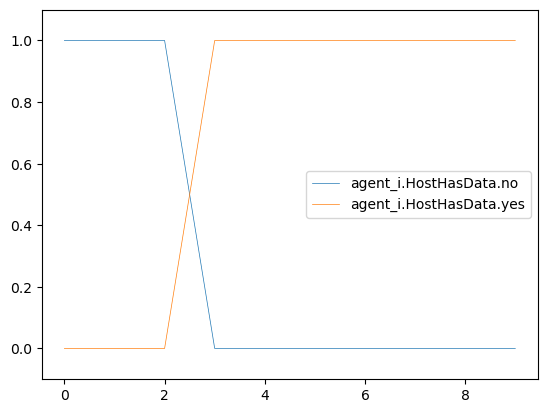

agent_j.HostHasData.no  agent_j.HostHasData.yes  agent_j.action  \
0                0.500000                 0.500000       FileRecon   
1                0.608108                 0.391892    EnumAccounts   
2                0.608108                 0.391892      PrivEscAcc   
3                0.406240                 0.593760       FileRecon   
4                0.083640                 0.916360  ManipulateData   
5                0.000094                 0.999906            Exit   
6                0.000094                 0.999906             Nop   
7                0.000094                 0.999906             Nop   
8                0.000094                 0.999906             Nop   
9                0.000094                 0.999906             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                   user_files   
1               Nop                         none   
2  DeployDataDecoys                   user_files   
3               Nop                         none   
4               Nop                         none   
5               Nop                         none   
6               Nop                   user_files   
7               Nop                   user_files   
8               Nop                   user_files   
9               Nop                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           success                       active  
4                           success                       active  
5                           success                     inactive  
6                           success                     inactive  
7                           failure                     inactive  
8                           success                     inactive  
9                           failure                     inactive

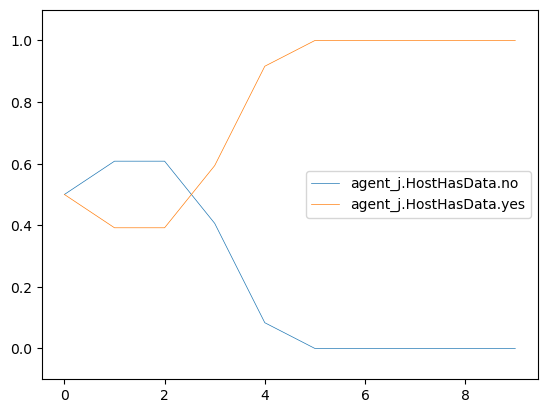

=============DataFound============


state.DataFound.no  state.DataFound.yes    agent_i.action  agent_j.action
0                 1.0                  0.0               Nop       FileRecon
1                 1.0                  0.0               Nop    EnumAccounts
2                 1.0                  0.0  DeployDataDecoys      PrivEscAcc
3                 1.0                  0.0               Nop       FileRecon
4                 0.0                  1.0               Nop  ManipulateData
5                 0.0                  1.0               Nop            Exit
6                 0.0                  1.0               Nop             Nop
7                 0.0                  1.0               Nop             Nop
8                 0.0                  1.0               Nop             Nop
9                 0.0                  1.0               Nop             Nop

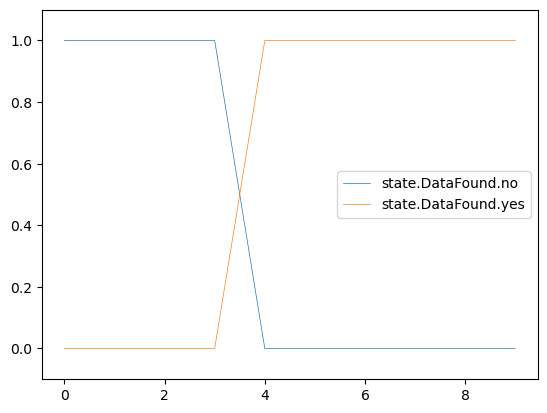

agent_i.DataFound.no  agent_i.DataFound.yes    agent_i.action  \
0              1.000000               0.000000               Nop   
1              1.000000               0.000000               Nop   
2              1.000000               0.000000  DeployDataDecoys   
3              1.000000               0.000000               Nop   
4              0.208001               0.791999               Nop   
5              0.028873               0.971127               Nop   
6              0.001646               0.998354               Nop   
7              0.001576               0.998424               Nop   
8              0.001576               0.998424               Nop   
9              0.001576               0.998424               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                         su_login  
9             Nop                             none

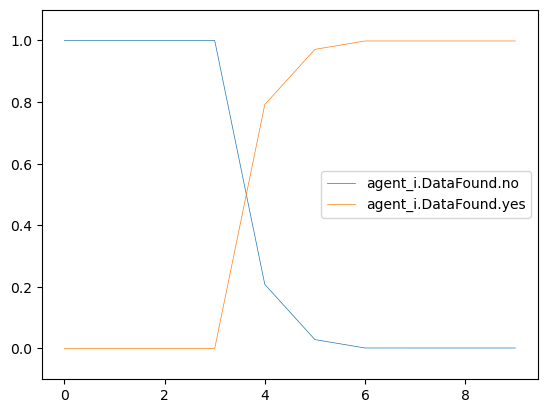

agent_j.DataFound.no  agent_j.DataFound.yes  agent_j.action  \
0              1.000000               0.000000       FileRecon   
1              0.972973               0.027027    EnumAccounts   
2              0.972973               0.027027      PrivEscAcc   
3              0.972973               0.027027       FileRecon   
4              0.107083               0.892917  ManipulateData   
5              0.000120               0.999880            Exit   
6              0.000120               0.999880             Nop   
7              0.000120               0.999880             Nop   
8              0.000120               0.999880             Nop   
9              0.000120               0.999880             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                   user_files   
1               Nop                         none   
2  DeployDataDecoys                   user_files   
3               Nop                         none   
4               Nop                         none   
5               Nop                         none   
6               Nop                   user_files   
7               Nop                   user_files   
8               Nop                   user_files   
9               Nop                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           success                       active  
4                           success                       active  
5                           success                     inactive  
6                           success                     inactive  
7                           failure                     inactive  
8                           success                     inactive  
9                           failure                     inactive

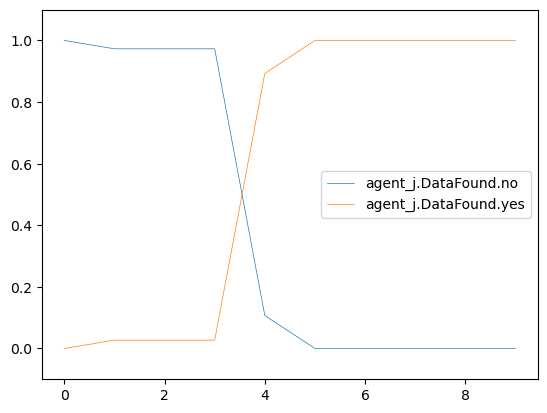

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user    agent_i.action  \
0                     0.0                     1.0               Nop   
1                     0.0                     1.0               Nop   
2                     0.0                     1.0  DeployDataDecoys   
3                     1.0                     0.0               Nop   
4                     1.0                     0.0               Nop   
5                     1.0                     0.0               Nop   
6                     1.0                     0.0               Nop   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

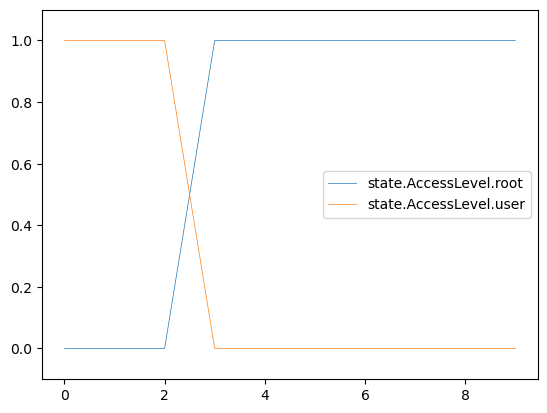

agent_i.AccessLevel.root  agent_i.AccessLevel.user    agent_i.action  \
0                  0.000000                  1.000000               Nop   
1                  0.000000                  1.000000               Nop   
2                  0.000000                  1.000000  DeployDataDecoys   
3                  0.989987                  0.010013               Nop   
4                  0.989999                  0.010001               Nop   
5                  0.998516                  0.001484               Nop   
6                  0.998483                  0.001517               Nop   
7                  0.998482                  0.001518               Nop   
8                  0.998482                  0.001518               Nop   
9                  0.998482                  0.001518               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                         su_login  
9             Nop                             none

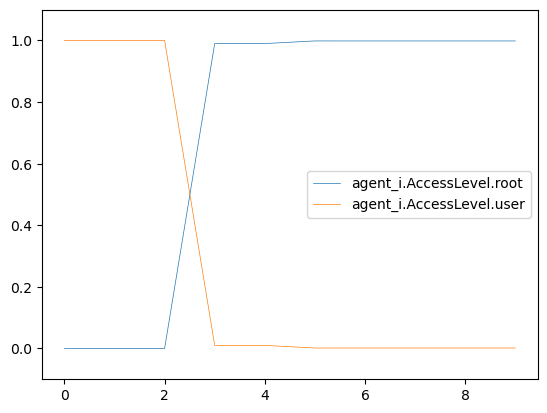

agent_j.AccessLevel.root  agent_j.AccessLevel.user  agent_j.action  \
0                  0.000000                  1.000000       FileRecon   
1                  0.000000                  1.000000    EnumAccounts   
2                  0.000000                  1.000000      PrivEscAcc   
3                  0.999887                  0.000113       FileRecon   
4                  0.999947                  0.000053  ManipulateData   
5                  0.999963                  0.000037            Exit   
6                  0.999963                  0.000037             Nop   
7                  0.999963                  0.000037             Nop   
8                  0.999963                  0.000037             Nop   
9                  0.999963                  0.000037             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                   user_files   
1               Nop                         none   
2  DeployDataDecoys                   user_files   
3               Nop                         none   
4               Nop                         none   
5               Nop                         none   
6               Nop                   user_files   
7               Nop                   user_files   
8               Nop                   user_files   
9               Nop                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           success                       active  
4                           success                       active  
5                           success                     inactive  
6                           success                     inactive  
7                           failure                     inactive  
8                           success                     inactive  
9                           failure                     inactive

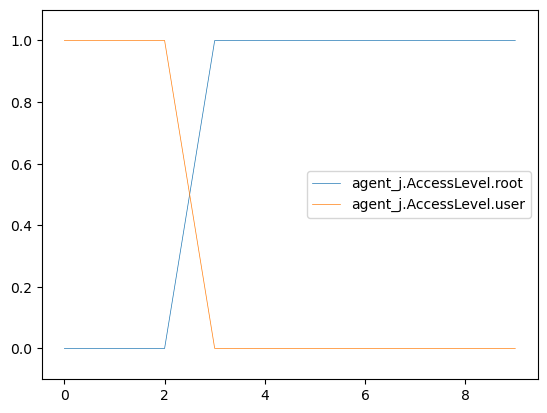

+++++++++++++++++++ End Interaction +++++++++++++++++++


In [7]:
# Get belief over opponent frames
def get_opponent_frame(dataframe):
    
    thetaj_columns = list(filter(lambda x: "thetaj" in x.split("."), dataframe))
    
    if len(thetaj_columns) > 0:
        return dataframe[thetaj_columns]
    
    else:
        return None

# Print and plot P(Theta_j)
def print_thetaj_belief(belief_thetaj_df, obs):
    df = pandas.concat([belief_thetaj_df, obs], axis=1)
    display(df)
    df.plot(linewidth=0.5)
    plotter.ylim(-0.1, 1.1)
    plotter.show()

# Summarize beliefs
def summarize_beliefs(state_vars, dataframe):
    print(f"+++++++++++++++++++ Begin Interaction +++++++++++++++++++")
    agent_i_data = filter_columns_by_agent(dataframe, "agent_i")
    agent_j_data = filter_columns_by_agent(dataframe, "agent_j")
    states = filter_columns_by_agent(dataframe, "state")
    
    actions_i = filter_columns_by_state(agent_i_data, "action")
    actions_j = filter_columns_by_state(agent_j_data, "action")
    
    obs_i = filter_columns_by_state(agent_i_data, "observation")
    obs_j = filter_columns_by_state(agent_j_data, "observation")
    
    i_belief_thetaj = get_opponent_frame(agent_i_data)
    if i_belief_thetaj is not None:
        print_thetaj_belief(i_belief_thetaj, obs_i)
    
    j_belief_thetaj = get_opponent_frame(agent_j_data)
    if j_belief_thetaj is not None:
        print_thetaj_belief(j_belief_thetaj, obs_j)
    
    for var in state_vars:
        print(f"============={var}============")
        # show state
        state_values = filter_columns_by_state(states, var)
        state_values = pandas.concat([state_values, actions_i, actions_j], axis = 1)
        display(state_values)
        state_values.plot(linewidth=0.5)
        plotter.ylim(-0.1, 1.1)
        plotter.show()
        
        # show agent i
        agent_i_beliefs = filter_columns_by_state(agent_i_data, var)
        agent_i_beliefs = pandas.concat([agent_i_beliefs, actions_i, actions_j, obs_i], axis = 1)
        display(agent_i_beliefs)
        agent_i_beliefs.plot(linewidth=0.5)
        plotter.ylim(-0.1, 1.1)
        plotter.show()
        
        # show agent j
        agent_j_beliefs = filter_columns_by_state(agent_j_data, var)
        agent_j_beliefs = pandas.concat([agent_j_beliefs, actions_j, actions_i, obs_j], axis = 1)
        display(agent_j_beliefs)
        agent_j_beliefs.plot(linewidth=0.5)
        plotter.ylim(-0.1, 1.1)
        plotter.show()
        print("==============================")
    
    print(f"+++++++++++++++++++ End Interaction +++++++++++++++++++")

# Use state data to figure out the state variables
def get_state_vars(columns):
    
    states = filter(lambda x: "state" in x.split(".") and len(x.split(".")) >= 2, columns)
    state_vars = map(lambda x: x.split(".")[1], states)
    
    return list(set(state_vars))

# Fetch dataframe with columns belonging to a particular agent
def filter_columns_by_agent(dataframe, name):
    columns = dataframe.columns
    filtered_columns = list(filter(lambda x: name in x.split("."), columns))
    
    df = dataframe[filtered_columns]
    return df

# Get columns containing the state name in the header
def filter_columns_by_state(dataframe, state):
    filtered_columns = list(filter(lambda x: state in x.split("."), dataframe.columns))
    return dataframe[filtered_columns]

# Main loop to summarize all traces
for trace in TRACE_FILES[:5]:
    data = load_json(trace)
    
    dataframe = pandas.json_normalize(data)    
    state_vars = get_state_vars(dataframe.columns)
    
    summarize_beliefs(state_vars, dataframe)

    